## Multilayer Perceptron (MLP)

- Camadas intermediárias
- Arquitetura feedforward
- aprendizagem por retropropagação (backpropagation)

<img src="images/MLP.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

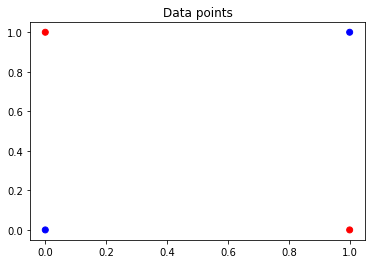

In [14]:
np.random.seed(42)

x = np.array([[1.0, 1.0], [2.1, 2.4], [1.1, 0.3], [2.3, 3.2], [0.1, 0.6],
              [0.5, 1.6], [1.7, 2.3], [0.7, 1.6], [3.2, 0.1], [2.2, 1.1],
              [0.8, 1.9], [2.4, 1.6], [1.2, 1.2], [5.2, 7.2], [6.6, 4.5],
              [4.9, 8.1], [7.6, 5.9], [8.8, 9.0], [5.6, 7.8], [8.8, 5.6],
              [7.9, 9.1], [6.8, 9.2], [8.8, 6.9], [9.3, 5.6], [5.7, 7.5]
             ])


d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],
              [0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])


x = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
d = np.array([[0],[1],[1],[0]])


shuffle = np.random.permutation(len(x))
x = x[shuffle]
d = d[shuffle]

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [10]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        """ Construtor """
        # Taxa de aprendizado 
        self.lr = lr
        
        # tolerância
        self.e = e
        
        # Quantidade de neurônios por camadas
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        '''Calcula a sigmoid de um valor'''
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        '''Calcula a derivada da função sigmoid'''
        sig = self.sigmoid(valor)
        return sig*(1 - sig)

    def activate(self, valor):
        '''Ativa as saídas do neurônio'''
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        '''Calcular a derivada da função de ativação'''
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        '''Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)

    def predict(self, input_data, weights):
        '''Calcula a soma ponderada das entradas pelo peso'''
        return np.dot(input_data, weights).reshape(1, -1)
    
    
    def train(self, x, d):
        ''' 
        Definir aleatoriamente os pesos, o bias e o peso do bias
        Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
       '''
        self.w1 = np.random.random((x.shape[1] + 1, self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        
        epoch = 0
        last_mse = np.inf
        self.bias = -1
        
        while True:
            mse = 0
            for xi, target in zip(x, d):
                input_value = np.insert(xi, 0, self.bias)
                
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                
                current_error = self.evaluate(target, y3)
                mse += current_error ** 2
                
                delta3 = current_error * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)
                
                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)
                
                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)
                
            mse = mse / len(x)
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e and mse < 0.01:
                break
                
            last_mse = mse
            epoch += 1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(int(np.rint(y3)))
            
        return results

In [15]:
rede = MLP(lr = 0.1, e = 1e-6, neurons = [4, 3, 1])

rede.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.29499633]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.29288262]] - |mse_ant - mse|: [[0.00211371]]
EPOCH: 2 - MSE: [[0.29083727]] - |mse_ant - mse|: [[0.00204535]]
EPOCH: 3 - MSE: [[0.28886146]] - |mse_ant - mse|: [[0.00197581]]
EPOCH: 4 - MSE: [[0.28695601]] - |mse_ant - mse|: [[0.00190544]]
EPOCH: 5 - MSE: [[0.28512144]] - |mse_ant - mse|: [[0.00183457]]
EPOCH: 6 - MSE: [[0.28335793]] - |mse_ant - mse|: [[0.00176352]]
EPOCH: 7 - MSE: [[0.28166534]] - |mse_ant - mse|: [[0.00169259]]
EPOCH: 8 - MSE: [[0.28004327]] - |mse_ant - mse|: [[0.00162206]]
EPOCH: 9 - MSE: [[0.27849106]] - |mse_ant - mse|: [[0.00155221]]
EPOCH: 10 - MSE: [[0.27700778]] - |mse_ant - mse|: [[0.00148328]]
EPOCH: 11 - MSE: [[0.2755923]] - |mse_ant - mse|: [[0.00141548]]
EPOCH: 12 - MSE: [[0.27424328]] - |mse_ant - mse|: [[0.00134902]]
EPOCH: 13 - MSE: [[0.27295922]] - |mse_ant - mse|: [[0.00128405]]
EPOCH: 14 - MSE: [[0.27173848]] - |mse_ant - mse|: [[0.00122075]]
EPOCH: 15 - MSE: [[0.2705792

EPOCH: 139 - MSE: [[0.25235022]] - |mse_ant - mse|: [[1.86797014e-07]]
EPOCH: 140 - MSE: [[0.25235004]] - |mse_ant - mse|: [[1.71684492e-07]]
EPOCH: 141 - MSE: [[0.25234989]] - |mse_ant - mse|: [[1.57621868e-07]]
EPOCH: 142 - MSE: [[0.25234974]] - |mse_ant - mse|: [[1.44536392e-07]]
EPOCH: 143 - MSE: [[0.25234961]] - |mse_ant - mse|: [[1.32360344e-07]]
EPOCH: 144 - MSE: [[0.25234949]] - |mse_ant - mse|: [[1.21030685e-07]]
EPOCH: 145 - MSE: [[0.25234938]] - |mse_ant - mse|: [[1.10488733e-07]]
EPOCH: 146 - MSE: [[0.25234928]] - |mse_ant - mse|: [[1.00679865e-07]]
EPOCH: 147 - MSE: [[0.25234919]] - |mse_ant - mse|: [[9.15532352e-08]]
EPOCH: 148 - MSE: [[0.2523491]] - |mse_ant - mse|: [[8.30615153e-08]]
EPOCH: 149 - MSE: [[0.25234903]] - |mse_ant - mse|: [[7.516065e-08]]
EPOCH: 150 - MSE: [[0.25234896]] - |mse_ant - mse|: [[6.78096324e-08]]
EPOCH: 151 - MSE: [[0.2523489]] - |mse_ant - mse|: [[6.0970293e-08]]
EPOCH: 152 - MSE: [[0.25234884]] - |mse_ant - mse|: [[5.46071035e-08]]
EPOCH: 153 

EPOCH: 277 - MSE: [[0.25235155]] - |mse_ant - mse|: [[3.16983561e-08]]
EPOCH: 278 - MSE: [[0.25235158]] - |mse_ant - mse|: [[3.17209616e-08]]
EPOCH: 279 - MSE: [[0.25235162]] - |mse_ant - mse|: [[3.17435604e-08]]
EPOCH: 280 - MSE: [[0.25235165]] - |mse_ant - mse|: [[3.1766154e-08]]
EPOCH: 281 - MSE: [[0.25235168]] - |mse_ant - mse|: [[3.17887438e-08]]
EPOCH: 282 - MSE: [[0.25235171]] - |mse_ant - mse|: [[3.1811331e-08]]
EPOCH: 283 - MSE: [[0.25235174]] - |mse_ant - mse|: [[3.18339171e-08]]
EPOCH: 284 - MSE: [[0.25235177]] - |mse_ant - mse|: [[3.18565025e-08]]
EPOCH: 285 - MSE: [[0.25235181]] - |mse_ant - mse|: [[3.18790887e-08]]
EPOCH: 286 - MSE: [[0.25235184]] - |mse_ant - mse|: [[3.19016759e-08]]
EPOCH: 287 - MSE: [[0.25235187]] - |mse_ant - mse|: [[3.19242652e-08]]
EPOCH: 288 - MSE: [[0.2523519]] - |mse_ant - mse|: [[3.19468566e-08]]
EPOCH: 289 - MSE: [[0.25235193]] - |mse_ant - mse|: [[3.1969451e-08]]
EPOCH: 290 - MSE: [[0.25235197]] - |mse_ant - mse|: [[3.19920486e-08]]
EPOCH: 291

EPOCH: 414 - MSE: [[0.25235611]] - |mse_ant - mse|: [[3.47697291e-08]]
EPOCH: 415 - MSE: [[0.25235614]] - |mse_ant - mse|: [[3.47915767e-08]]
EPOCH: 416 - MSE: [[0.25235618]] - |mse_ant - mse|: [[3.4813413e-08]]
EPOCH: 417 - MSE: [[0.25235621]] - |mse_ant - mse|: [[3.48352381e-08]]
EPOCH: 418 - MSE: [[0.25235625]] - |mse_ant - mse|: [[3.48570521e-08]]
EPOCH: 419 - MSE: [[0.25235628]] - |mse_ant - mse|: [[3.48788547e-08]]
EPOCH: 420 - MSE: [[0.25235632]] - |mse_ant - mse|: [[3.49006463e-08]]
EPOCH: 421 - MSE: [[0.25235635]] - |mse_ant - mse|: [[3.49224266e-08]]
EPOCH: 422 - MSE: [[0.25235639]] - |mse_ant - mse|: [[3.49441956e-08]]
EPOCH: 423 - MSE: [[0.25235642]] - |mse_ant - mse|: [[3.49659535e-08]]
EPOCH: 424 - MSE: [[0.25235646]] - |mse_ant - mse|: [[3.49877e-08]]
EPOCH: 425 - MSE: [[0.25235649]] - |mse_ant - mse|: [[3.50094354e-08]]
EPOCH: 426 - MSE: [[0.25235653]] - |mse_ant - mse|: [[3.50311595e-08]]
EPOCH: 427 - MSE: [[0.25235656]] - |mse_ant - mse|: [[3.50528724e-08]]
EPOCH: 428

EPOCH: 556 - MSE: [[0.25236126]] - |mse_ant - mse|: [[3.77605077e-08]]
EPOCH: 557 - MSE: [[0.2523613]] - |mse_ant - mse|: [[3.77807889e-08]]
EPOCH: 558 - MSE: [[0.25236134]] - |mse_ant - mse|: [[3.78010594e-08]]
EPOCH: 559 - MSE: [[0.25236138]] - |mse_ant - mse|: [[3.78213194e-08]]
EPOCH: 560 - MSE: [[0.25236141]] - |mse_ant - mse|: [[3.78415687e-08]]
EPOCH: 561 - MSE: [[0.25236145]] - |mse_ant - mse|: [[3.78618074e-08]]
EPOCH: 562 - MSE: [[0.25236149]] - |mse_ant - mse|: [[3.78820356e-08]]
EPOCH: 563 - MSE: [[0.25236153]] - |mse_ant - mse|: [[3.79022531e-08]]
EPOCH: 564 - MSE: [[0.25236156]] - |mse_ant - mse|: [[3.792246e-08]]
EPOCH: 565 - MSE: [[0.2523616]] - |mse_ant - mse|: [[3.79426565e-08]]
EPOCH: 566 - MSE: [[0.25236164]] - |mse_ant - mse|: [[3.79628422e-08]]
EPOCH: 567 - MSE: [[0.25236168]] - |mse_ant - mse|: [[3.79830175e-08]]
EPOCH: 568 - MSE: [[0.25236172]] - |mse_ant - mse|: [[3.80031822e-08]]
EPOCH: 569 - MSE: [[0.25236175]] - |mse_ant - mse|: [[3.80233363e-08]]
EPOCH: 570

EPOCH: 700 - MSE: [[0.25236691]] - |mse_ant - mse|: [[4.05747865e-08]]
EPOCH: 701 - MSE: [[0.25236695]] - |mse_ant - mse|: [[4.0593604e-08]]
EPOCH: 702 - MSE: [[0.25236699]] - |mse_ant - mse|: [[4.06124118e-08]]
EPOCH: 703 - MSE: [[0.25236703]] - |mse_ant - mse|: [[4.063121e-08]]
EPOCH: 704 - MSE: [[0.25236707]] - |mse_ant - mse|: [[4.06499983e-08]]
EPOCH: 705 - MSE: [[0.25236711]] - |mse_ant - mse|: [[4.0668777e-08]]
EPOCH: 706 - MSE: [[0.25236715]] - |mse_ant - mse|: [[4.06875459e-08]]
EPOCH: 707 - MSE: [[0.25236719]] - |mse_ant - mse|: [[4.07063052e-08]]
EPOCH: 708 - MSE: [[0.25236723]] - |mse_ant - mse|: [[4.07250549e-08]]
EPOCH: 709 - MSE: [[0.25236727]] - |mse_ant - mse|: [[4.07437948e-08]]
EPOCH: 710 - MSE: [[0.25236731]] - |mse_ant - mse|: [[4.0762525e-08]]
EPOCH: 711 - MSE: [[0.25236735]] - |mse_ant - mse|: [[4.07812457e-08]]
EPOCH: 712 - MSE: [[0.25236739]] - |mse_ant - mse|: [[4.07999565e-08]]
EPOCH: 713 - MSE: [[0.25236744]] - |mse_ant - mse|: [[4.08186579e-08]]
EPOCH: 714 

EPOCH: 928 - MSE: [[0.25237663]] - |mse_ant - mse|: [[4.46246501e-08]]
EPOCH: 929 - MSE: [[0.25237667]] - |mse_ant - mse|: [[4.46413951e-08]]
EPOCH: 930 - MSE: [[0.25237672]] - |mse_ant - mse|: [[4.46581319e-08]]
EPOCH: 931 - MSE: [[0.25237676]] - |mse_ant - mse|: [[4.46748598e-08]]
EPOCH: 932 - MSE: [[0.25237681]] - |mse_ant - mse|: [[4.46915794e-08]]
EPOCH: 933 - MSE: [[0.25237685]] - |mse_ant - mse|: [[4.47082906e-08]]
EPOCH: 934 - MSE: [[0.2523769]] - |mse_ant - mse|: [[4.47249933e-08]]
EPOCH: 935 - MSE: [[0.25237694]] - |mse_ant - mse|: [[4.47416875e-08]]
EPOCH: 936 - MSE: [[0.25237699]] - |mse_ant - mse|: [[4.47583732e-08]]
EPOCH: 937 - MSE: [[0.25237703]] - |mse_ant - mse|: [[4.47750504e-08]]
EPOCH: 938 - MSE: [[0.25237708]] - |mse_ant - mse|: [[4.47917192e-08]]
EPOCH: 939 - MSE: [[0.25237712]] - |mse_ant - mse|: [[4.48083797e-08]]
EPOCH: 940 - MSE: [[0.25237717]] - |mse_ant - mse|: [[4.48250315e-08]]
EPOCH: 941 - MSE: [[0.25237721]] - |mse_ant - mse|: [[4.4841675e-08]]
EPOCH: 9

EPOCH: 1084 - MSE: [[0.25238379]] - |mse_ant - mse|: [[4.71371365e-08]]
EPOCH: 1085 - MSE: [[0.25238384]] - |mse_ant - mse|: [[4.71526133e-08]]
EPOCH: 1086 - MSE: [[0.25238389]] - |mse_ant - mse|: [[4.71680823e-08]]
EPOCH: 1087 - MSE: [[0.25238393]] - |mse_ant - mse|: [[4.71835435e-08]]
EPOCH: 1088 - MSE: [[0.25238398]] - |mse_ant - mse|: [[4.71989969e-08]]
EPOCH: 1089 - MSE: [[0.25238403]] - |mse_ant - mse|: [[4.72144426e-08]]
EPOCH: 1090 - MSE: [[0.25238407]] - |mse_ant - mse|: [[4.72298806e-08]]
EPOCH: 1091 - MSE: [[0.25238412]] - |mse_ant - mse|: [[4.72453108e-08]]
EPOCH: 1092 - MSE: [[0.25238417]] - |mse_ant - mse|: [[4.72607331e-08]]
EPOCH: 1093 - MSE: [[0.25238422]] - |mse_ant - mse|: [[4.72761479e-08]]
EPOCH: 1094 - MSE: [[0.25238426]] - |mse_ant - mse|: [[4.72915547e-08]]
EPOCH: 1095 - MSE: [[0.25238431]] - |mse_ant - mse|: [[4.7306954e-08]]
EPOCH: 1096 - MSE: [[0.25238436]] - |mse_ant - mse|: [[4.73223455e-08]]
EPOCH: 1097 - MSE: [[0.25238441]] - |mse_ant - mse|: [[4.73377291

EPOCH: 1206 - MSE: [[0.25238966]] - |mse_ant - mse|: [[4.896914e-08]]
EPOCH: 1207 - MSE: [[0.2523897]] - |mse_ant - mse|: [[4.89836987e-08]]
EPOCH: 1208 - MSE: [[0.25238975]] - |mse_ant - mse|: [[4.89982502e-08]]
EPOCH: 1209 - MSE: [[0.2523898]] - |mse_ant - mse|: [[4.90127943e-08]]
EPOCH: 1210 - MSE: [[0.25238985]] - |mse_ant - mse|: [[4.90273313e-08]]
EPOCH: 1211 - MSE: [[0.2523899]] - |mse_ant - mse|: [[4.90418609e-08]]
EPOCH: 1212 - MSE: [[0.25238995]] - |mse_ant - mse|: [[4.90563832e-08]]
EPOCH: 1213 - MSE: [[0.25239]] - |mse_ant - mse|: [[4.90708983e-08]]
EPOCH: 1214 - MSE: [[0.25239005]] - |mse_ant - mse|: [[4.90854063e-08]]
EPOCH: 1215 - MSE: [[0.2523901]] - |mse_ant - mse|: [[4.90999069e-08]]
EPOCH: 1216 - MSE: [[0.25239015]] - |mse_ant - mse|: [[4.91144002e-08]]
EPOCH: 1217 - MSE: [[0.2523902]] - |mse_ant - mse|: [[4.91288864e-08]]
EPOCH: 1218 - MSE: [[0.25239024]] - |mse_ant - mse|: [[4.91433652e-08]]
EPOCH: 1219 - MSE: [[0.25239029]] - |mse_ant - mse|: [[4.91578369e-08]]
EP

EPOCH: 1342 - MSE: [[0.25239645]] - |mse_ant - mse|: [[5.08838867e-08]]
EPOCH: 1343 - MSE: [[0.2523965]] - |mse_ant - mse|: [[5.08974906e-08]]
EPOCH: 1344 - MSE: [[0.25239655]] - |mse_ant - mse|: [[5.09110873e-08]]
EPOCH: 1345 - MSE: [[0.2523966]] - |mse_ant - mse|: [[5.09246776e-08]]
EPOCH: 1346 - MSE: [[0.25239665]] - |mse_ant - mse|: [[5.09382611e-08]]
EPOCH: 1347 - MSE: [[0.2523967]] - |mse_ant - mse|: [[5.09518377e-08]]
EPOCH: 1348 - MSE: [[0.25239675]] - |mse_ant - mse|: [[5.09654075e-08]]
EPOCH: 1349 - MSE: [[0.2523968]] - |mse_ant - mse|: [[5.09789707e-08]]
EPOCH: 1350 - MSE: [[0.25239686]] - |mse_ant - mse|: [[5.09925271e-08]]
EPOCH: 1351 - MSE: [[0.25239691]] - |mse_ant - mse|: [[5.10060767e-08]]
EPOCH: 1352 - MSE: [[0.25239696]] - |mse_ant - mse|: [[5.10196195e-08]]
EPOCH: 1353 - MSE: [[0.25239701]] - |mse_ant - mse|: [[5.10331558e-08]]
EPOCH: 1354 - MSE: [[0.25239706]] - |mse_ant - mse|: [[5.10466852e-08]]
EPOCH: 1355 - MSE: [[0.25239711]] - |mse_ant - mse|: [[5.10602079e-0

EPOCH: 1483 - MSE: [[0.25240376]] - |mse_ant - mse|: [[5.27367265e-08]]
EPOCH: 1484 - MSE: [[0.25240381]] - |mse_ant - mse|: [[5.27494087e-08]]
EPOCH: 1485 - MSE: [[0.25240386]] - |mse_ant - mse|: [[5.27620848e-08]]
EPOCH: 1486 - MSE: [[0.25240391]] - |mse_ant - mse|: [[5.27747541e-08]]
EPOCH: 1487 - MSE: [[0.25240397]] - |mse_ant - mse|: [[5.27874175e-08]]
EPOCH: 1488 - MSE: [[0.25240402]] - |mse_ant - mse|: [[5.28000744e-08]]
EPOCH: 1489 - MSE: [[0.25240407]] - |mse_ant - mse|: [[5.28127252e-08]]
EPOCH: 1490 - MSE: [[0.25240413]] - |mse_ant - mse|: [[5.28253695e-08]]
EPOCH: 1491 - MSE: [[0.25240418]] - |mse_ant - mse|: [[5.28380077e-08]]
EPOCH: 1492 - MSE: [[0.25240423]] - |mse_ant - mse|: [[5.28506395e-08]]
EPOCH: 1493 - MSE: [[0.25240428]] - |mse_ant - mse|: [[5.2863265e-08]]
EPOCH: 1494 - MSE: [[0.25240434]] - |mse_ant - mse|: [[5.28758844e-08]]
EPOCH: 1495 - MSE: [[0.25240439]] - |mse_ant - mse|: [[5.28884974e-08]]
EPOCH: 1496 - MSE: [[0.25240444]] - |mse_ant - mse|: [[5.29011041

EPOCH: 1599 - MSE: [[0.25240996]] - |mse_ant - mse|: [[5.4166593e-08]]
EPOCH: 1600 - MSE: [[0.25241001]] - |mse_ant - mse|: [[5.41785644e-08]]
EPOCH: 1601 - MSE: [[0.25241007]] - |mse_ant - mse|: [[5.41905298e-08]]
EPOCH: 1602 - MSE: [[0.25241012]] - |mse_ant - mse|: [[5.42024892e-08]]
EPOCH: 1603 - MSE: [[0.25241017]] - |mse_ant - mse|: [[5.42144426e-08]]
EPOCH: 1604 - MSE: [[0.25241023]] - |mse_ant - mse|: [[5.42263902e-08]]
EPOCH: 1605 - MSE: [[0.25241028]] - |mse_ant - mse|: [[5.42383317e-08]]
EPOCH: 1606 - MSE: [[0.25241034]] - |mse_ant - mse|: [[5.42502673e-08]]
EPOCH: 1607 - MSE: [[0.25241039]] - |mse_ant - mse|: [[5.42621971e-08]]
EPOCH: 1608 - MSE: [[0.25241045]] - |mse_ant - mse|: [[5.42741208e-08]]
EPOCH: 1609 - MSE: [[0.2524105]] - |mse_ant - mse|: [[5.42860386e-08]]
EPOCH: 1610 - MSE: [[0.25241055]] - |mse_ant - mse|: [[5.42979505e-08]]
EPOCH: 1611 - MSE: [[0.25241061]] - |mse_ant - mse|: [[5.43098565e-08]]
EPOCH: 1612 - MSE: [[0.25241066]] - |mse_ant - mse|: [[5.43217565e

EPOCH: 1730 - MSE: [[0.25241715]] - |mse_ant - mse|: [[5.56851611e-08]]
EPOCH: 1731 - MSE: [[0.25241721]] - |mse_ant - mse|: [[5.56963761e-08]]
EPOCH: 1732 - MSE: [[0.25241727]] - |mse_ant - mse|: [[5.57075855e-08]]
EPOCH: 1733 - MSE: [[0.25241732]] - |mse_ant - mse|: [[5.57187893e-08]]
EPOCH: 1734 - MSE: [[0.25241738]] - |mse_ant - mse|: [[5.57299875e-08]]
EPOCH: 1735 - MSE: [[0.25241743]] - |mse_ant - mse|: [[5.57411802e-08]]
EPOCH: 1736 - MSE: [[0.25241749]] - |mse_ant - mse|: [[5.57523673e-08]]
EPOCH: 1737 - MSE: [[0.25241754]] - |mse_ant - mse|: [[5.57635487e-08]]
EPOCH: 1738 - MSE: [[0.2524176]] - |mse_ant - mse|: [[5.57747245e-08]]
EPOCH: 1739 - MSE: [[0.25241766]] - |mse_ant - mse|: [[5.57858949e-08]]
EPOCH: 1740 - MSE: [[0.25241771]] - |mse_ant - mse|: [[5.57970595e-08]]
EPOCH: 1741 - MSE: [[0.25241777]] - |mse_ant - mse|: [[5.58082187e-08]]
EPOCH: 1742 - MSE: [[0.25241782]] - |mse_ant - mse|: [[5.58193723e-08]]
EPOCH: 1743 - MSE: [[0.25241788]] - |mse_ant - mse|: [[5.58305204

EPOCH: 1870 - MSE: [[0.25242506]] - |mse_ant - mse|: [[5.72019544e-08]]
EPOCH: 1871 - MSE: [[0.25242512]] - |mse_ant - mse|: [[5.72124105e-08]]
EPOCH: 1872 - MSE: [[0.25242517]] - |mse_ant - mse|: [[5.72228614e-08]]
EPOCH: 1873 - MSE: [[0.25242523]] - |mse_ant - mse|: [[5.72333071e-08]]
EPOCH: 1874 - MSE: [[0.25242529]] - |mse_ant - mse|: [[5.72437475e-08]]
EPOCH: 1875 - MSE: [[0.25242535]] - |mse_ant - mse|: [[5.72541827e-08]]
EPOCH: 1876 - MSE: [[0.2524254]] - |mse_ant - mse|: [[5.72646126e-08]]
EPOCH: 1877 - MSE: [[0.25242546]] - |mse_ant - mse|: [[5.72750373e-08]]
EPOCH: 1878 - MSE: [[0.25242552]] - |mse_ant - mse|: [[5.72854567e-08]]
EPOCH: 1879 - MSE: [[0.25242557]] - |mse_ant - mse|: [[5.72958709e-08]]
EPOCH: 1880 - MSE: [[0.25242563]] - |mse_ant - mse|: [[5.73062798e-08]]
EPOCH: 1881 - MSE: [[0.25242569]] - |mse_ant - mse|: [[5.73166837e-08]]
EPOCH: 1882 - MSE: [[0.25242575]] - |mse_ant - mse|: [[5.73270822e-08]]
EPOCH: 1883 - MSE: [[0.2524258]] - |mse_ant - mse|: [[5.73374755e

EPOCH: 1991 - MSE: [[0.25243206]] - |mse_ant - mse|: [[5.84297033e-08]]
EPOCH: 1992 - MSE: [[0.25243211]] - |mse_ant - mse|: [[5.84395408e-08]]
EPOCH: 1993 - MSE: [[0.25243217]] - |mse_ant - mse|: [[5.84493735e-08]]
EPOCH: 1994 - MSE: [[0.25243223]] - |mse_ant - mse|: [[5.84592012e-08]]
EPOCH: 1995 - MSE: [[0.25243229]] - |mse_ant - mse|: [[5.84690238e-08]]
EPOCH: 1996 - MSE: [[0.25243235]] - |mse_ant - mse|: [[5.84788415e-08]]
EPOCH: 1997 - MSE: [[0.25243241]] - |mse_ant - mse|: [[5.84886543e-08]]
EPOCH: 1998 - MSE: [[0.25243247]] - |mse_ant - mse|: [[5.84984621e-08]]
EPOCH: 1999 - MSE: [[0.25243252]] - |mse_ant - mse|: [[5.85082648e-08]]
EPOCH: 2000 - MSE: [[0.25243258]] - |mse_ant - mse|: [[5.85180627e-08]]
EPOCH: 2001 - MSE: [[0.25243264]] - |mse_ant - mse|: [[5.85278554e-08]]
EPOCH: 2002 - MSE: [[0.2524327]] - |mse_ant - mse|: [[5.85376436e-08]]
EPOCH: 2003 - MSE: [[0.25243276]] - |mse_ant - mse|: [[5.85474264e-08]]
EPOCH: 2004 - MSE: [[0.25243282]] - |mse_ant - mse|: [[5.85572045

EPOCH: 2106 - MSE: [[0.25243884]] - |mse_ant - mse|: [[5.95289222e-08]]
EPOCH: 2107 - MSE: [[0.2524389]] - |mse_ant - mse|: [[5.95382012e-08]]
EPOCH: 2108 - MSE: [[0.25243896]] - |mse_ant - mse|: [[5.95474754e-08]]
EPOCH: 2109 - MSE: [[0.25243902]] - |mse_ant - mse|: [[5.95567449e-08]]
EPOCH: 2110 - MSE: [[0.25243908]] - |mse_ant - mse|: [[5.95660095e-08]]
EPOCH: 2111 - MSE: [[0.25243914]] - |mse_ant - mse|: [[5.95752696e-08]]
EPOCH: 2112 - MSE: [[0.2524392]] - |mse_ant - mse|: [[5.95845248e-08]]
EPOCH: 2113 - MSE: [[0.25243926]] - |mse_ant - mse|: [[5.95937754e-08]]
EPOCH: 2114 - MSE: [[0.25243932]] - |mse_ant - mse|: [[5.96030211e-08]]
EPOCH: 2115 - MSE: [[0.25243938]] - |mse_ant - mse|: [[5.96122623e-08]]
EPOCH: 2116 - MSE: [[0.25243944]] - |mse_ant - mse|: [[5.96214985e-08]]
EPOCH: 2117 - MSE: [[0.2524395]] - |mse_ant - mse|: [[5.96307302e-08]]
EPOCH: 2118 - MSE: [[0.25243955]] - |mse_ant - mse|: [[5.96399571e-08]]
EPOCH: 2119 - MSE: [[0.25243961]] - |mse_ant - mse|: [[5.96491793e-

EPOCH: 2227 - MSE: [[0.25244611]] - |mse_ant - mse|: [[6.06178177e-08]]
EPOCH: 2228 - MSE: [[0.25244617]] - |mse_ant - mse|: [[6.06265369e-08]]
EPOCH: 2229 - MSE: [[0.25244623]] - |mse_ant - mse|: [[6.06352518e-08]]
EPOCH: 2230 - MSE: [[0.25244629]] - |mse_ant - mse|: [[6.0643962e-08]]
EPOCH: 2231 - MSE: [[0.25244635]] - |mse_ant - mse|: [[6.0652668e-08]]
EPOCH: 2232 - MSE: [[0.25244641]] - |mse_ant - mse|: [[6.06613691e-08]]
EPOCH: 2233 - MSE: [[0.25244647]] - |mse_ant - mse|: [[6.06700659e-08]]
EPOCH: 2234 - MSE: [[0.25244653]] - |mse_ant - mse|: [[6.06787582e-08]]
EPOCH: 2235 - MSE: [[0.2524466]] - |mse_ant - mse|: [[6.0687446e-08]]
EPOCH: 2236 - MSE: [[0.25244666]] - |mse_ant - mse|: [[6.06961293e-08]]
EPOCH: 2237 - MSE: [[0.25244672]] - |mse_ant - mse|: [[6.07048081e-08]]
EPOCH: 2238 - MSE: [[0.25244678]] - |mse_ant - mse|: [[6.07134823e-08]]
EPOCH: 2239 - MSE: [[0.25244684]] - |mse_ant - mse|: [[6.07221521e-08]]
EPOCH: 2240 - MSE: [[0.2524469]] - |mse_ant - mse|: [[6.07308174e-08

EPOCH: 2361 - MSE: [[0.25245431]] - |mse_ant - mse|: [[6.1746699e-08]]
EPOCH: 2362 - MSE: [[0.25245437]] - |mse_ant - mse|: [[6.17548294e-08]]
EPOCH: 2363 - MSE: [[0.25245443]] - |mse_ant - mse|: [[6.17629556e-08]]
EPOCH: 2364 - MSE: [[0.2524545]] - |mse_ant - mse|: [[6.17710774e-08]]
EPOCH: 2365 - MSE: [[0.25245456]] - |mse_ant - mse|: [[6.17791949e-08]]
EPOCH: 2366 - MSE: [[0.25245462]] - |mse_ant - mse|: [[6.17873083e-08]]
EPOCH: 2367 - MSE: [[0.25245468]] - |mse_ant - mse|: [[6.17954173e-08]]
EPOCH: 2368 - MSE: [[0.25245474]] - |mse_ant - mse|: [[6.18035221e-08]]
EPOCH: 2369 - MSE: [[0.2524548]] - |mse_ant - mse|: [[6.18116226e-08]]
EPOCH: 2370 - MSE: [[0.25245487]] - |mse_ant - mse|: [[6.18197188e-08]]
EPOCH: 2371 - MSE: [[0.25245493]] - |mse_ant - mse|: [[6.18278107e-08]]
EPOCH: 2372 - MSE: [[0.25245499]] - |mse_ant - mse|: [[6.18358985e-08]]
EPOCH: 2373 - MSE: [[0.25245505]] - |mse_ant - mse|: [[6.18439819e-08]]
EPOCH: 2374 - MSE: [[0.25245511]] - |mse_ant - mse|: [[6.18520611e-

EPOCH: 2488 - MSE: [[0.25246222]] - |mse_ant - mse|: [[6.27455522e-08]]
EPOCH: 2489 - MSE: [[0.25246228]] - |mse_ant - mse|: [[6.27531517e-08]]
EPOCH: 2490 - MSE: [[0.25246234]] - |mse_ant - mse|: [[6.27607473e-08]]
EPOCH: 2491 - MSE: [[0.2524624]] - |mse_ant - mse|: [[6.27683387e-08]]
EPOCH: 2492 - MSE: [[0.25246247]] - |mse_ant - mse|: [[6.27759261e-08]]
EPOCH: 2493 - MSE: [[0.25246253]] - |mse_ant - mse|: [[6.27835093e-08]]
EPOCH: 2494 - MSE: [[0.25246259]] - |mse_ant - mse|: [[6.27910886e-08]]
EPOCH: 2495 - MSE: [[0.25246266]] - |mse_ant - mse|: [[6.27986637e-08]]
EPOCH: 2496 - MSE: [[0.25246272]] - |mse_ant - mse|: [[6.28062347e-08]]
EPOCH: 2497 - MSE: [[0.25246278]] - |mse_ant - mse|: [[6.28138017e-08]]
EPOCH: 2498 - MSE: [[0.25246284]] - |mse_ant - mse|: [[6.28213647e-08]]
EPOCH: 2499 - MSE: [[0.25246291]] - |mse_ant - mse|: [[6.28289236e-08]]
EPOCH: 2500 - MSE: [[0.25246297]] - |mse_ant - mse|: [[6.28364783e-08]]
EPOCH: 2501 - MSE: [[0.25246303]] - |mse_ant - mse|: [[6.2844029e

EPOCH: 2608 - MSE: [[0.2524698]] - |mse_ant - mse|: [[6.36287799e-08]]
EPOCH: 2609 - MSE: [[0.25246986]] - |mse_ant - mse|: [[6.36359003e-08]]
EPOCH: 2610 - MSE: [[0.25246993]] - |mse_ant - mse|: [[6.36430166e-08]]
EPOCH: 2611 - MSE: [[0.25246999]] - |mse_ant - mse|: [[6.36501292e-08]]
EPOCH: 2612 - MSE: [[0.25247005]] - |mse_ant - mse|: [[6.36572378e-08]]
EPOCH: 2613 - MSE: [[0.25247012]] - |mse_ant - mse|: [[6.36643424e-08]]
EPOCH: 2614 - MSE: [[0.25247018]] - |mse_ant - mse|: [[6.36714433e-08]]
EPOCH: 2615 - MSE: [[0.25247025]] - |mse_ant - mse|: [[6.36785402e-08]]
EPOCH: 2616 - MSE: [[0.25247031]] - |mse_ant - mse|: [[6.36856332e-08]]
EPOCH: 2617 - MSE: [[0.25247037]] - |mse_ant - mse|: [[6.36927224e-08]]
EPOCH: 2618 - MSE: [[0.25247044]] - |mse_ant - mse|: [[6.36998074e-08]]
EPOCH: 2619 - MSE: [[0.2524705]] - |mse_ant - mse|: [[6.37068888e-08]]
EPOCH: 2620 - MSE: [[0.25247056]] - |mse_ant - mse|: [[6.37139663e-08]]
EPOCH: 2621 - MSE: [[0.25247063]] - |mse_ant - mse|: [[6.37210397e

EPOCH: 2758 - MSE: [[0.25247942]] - |mse_ant - mse|: [[6.46538976e-08]]
EPOCH: 2759 - MSE: [[0.25247949]] - |mse_ant - mse|: [[6.46604466e-08]]
EPOCH: 2760 - MSE: [[0.25247955]] - |mse_ant - mse|: [[6.46669918e-08]]
EPOCH: 2761 - MSE: [[0.25247962]] - |mse_ant - mse|: [[6.46735334e-08]]
EPOCH: 2762 - MSE: [[0.25247968]] - |mse_ant - mse|: [[6.46800712e-08]]
EPOCH: 2763 - MSE: [[0.25247975]] - |mse_ant - mse|: [[6.46866055e-08]]
EPOCH: 2764 - MSE: [[0.25247981]] - |mse_ant - mse|: [[6.46931358e-08]]
EPOCH: 2765 - MSE: [[0.25247988]] - |mse_ant - mse|: [[6.46996626e-08]]
EPOCH: 2766 - MSE: [[0.25247994]] - |mse_ant - mse|: [[6.47061857e-08]]
EPOCH: 2767 - MSE: [[0.25248]] - |mse_ant - mse|: [[6.47127051e-08]]
EPOCH: 2768 - MSE: [[0.25248007]] - |mse_ant - mse|: [[6.47192206e-08]]
EPOCH: 2769 - MSE: [[0.25248013]] - |mse_ant - mse|: [[6.47257327e-08]]
EPOCH: 2770 - MSE: [[0.2524802]] - |mse_ant - mse|: [[6.47322409e-08]]
EPOCH: 2771 - MSE: [[0.25248026]] - |mse_ant - mse|: [[6.47387455e-0

EPOCH: 2992 - MSE: [[0.25249472]] - |mse_ant - mse|: [[6.60876923e-08]]
EPOCH: 2993 - MSE: [[0.25249479]] - |mse_ant - mse|: [[6.6093405e-08]]
EPOCH: 2994 - MSE: [[0.25249486]] - |mse_ant - mse|: [[6.60991139e-08]]
EPOCH: 2995 - MSE: [[0.25249492]] - |mse_ant - mse|: [[6.61048197e-08]]
EPOCH: 2996 - MSE: [[0.25249499]] - |mse_ant - mse|: [[6.61105217e-08]]
EPOCH: 2997 - MSE: [[0.25249505]] - |mse_ant - mse|: [[6.61162206e-08]]
EPOCH: 2998 - MSE: [[0.25249512]] - |mse_ant - mse|: [[6.61219159e-08]]
EPOCH: 2999 - MSE: [[0.25249519]] - |mse_ant - mse|: [[6.61276077e-08]]
EPOCH: 3000 - MSE: [[0.25249525]] - |mse_ant - mse|: [[6.61332962e-08]]
EPOCH: 3001 - MSE: [[0.25249532]] - |mse_ant - mse|: [[6.61389812e-08]]
EPOCH: 3002 - MSE: [[0.25249538]] - |mse_ant - mse|: [[6.61446627e-08]]
EPOCH: 3003 - MSE: [[0.25249545]] - |mse_ant - mse|: [[6.61503409e-08]]
EPOCH: 3004 - MSE: [[0.25249552]] - |mse_ant - mse|: [[6.61560156e-08]]
EPOCH: 3005 - MSE: [[0.25249558]] - |mse_ant - mse|: [[6.61616869

EPOCH: 3213 - MSE: [[0.25250946]] - |mse_ant - mse|: [[6.72682424e-08]]
EPOCH: 3214 - MSE: [[0.25250953]] - |mse_ant - mse|: [[6.72732182e-08]]
EPOCH: 3215 - MSE: [[0.2525096]] - |mse_ant - mse|: [[6.72781907e-08]]
EPOCH: 3216 - MSE: [[0.25250967]] - |mse_ant - mse|: [[6.72831601e-08]]
EPOCH: 3217 - MSE: [[0.25250973]] - |mse_ant - mse|: [[6.72881262e-08]]
EPOCH: 3218 - MSE: [[0.2525098]] - |mse_ant - mse|: [[6.72930891e-08]]
EPOCH: 3219 - MSE: [[0.25250987]] - |mse_ant - mse|: [[6.72980488e-08]]
EPOCH: 3220 - MSE: [[0.25250993]] - |mse_ant - mse|: [[6.73030053e-08]]
EPOCH: 3221 - MSE: [[0.25251]] - |mse_ant - mse|: [[6.73079584e-08]]
EPOCH: 3222 - MSE: [[0.25251007]] - |mse_ant - mse|: [[6.73129085e-08]]
EPOCH: 3223 - MSE: [[0.25251014]] - |mse_ant - mse|: [[6.73178552e-08]]
EPOCH: 3224 - MSE: [[0.2525102]] - |mse_ant - mse|: [[6.73227989e-08]]
EPOCH: 3225 - MSE: [[0.25251027]] - |mse_ant - mse|: [[6.73277392e-08]]
EPOCH: 3226 - MSE: [[0.25251034]] - |mse_ant - mse|: [[6.73326763e-08]

EPOCH: 3339 - MSE: [[0.25251798]] - |mse_ant - mse|: [[6.78700628e-08]]
EPOCH: 3340 - MSE: [[0.25251805]] - |mse_ant - mse|: [[6.78746388e-08]]
EPOCH: 3341 - MSE: [[0.25251811]] - |mse_ant - mse|: [[6.78792118e-08]]
EPOCH: 3342 - MSE: [[0.25251818]] - |mse_ant - mse|: [[6.78837815e-08]]
EPOCH: 3343 - MSE: [[0.25251825]] - |mse_ant - mse|: [[6.78883482e-08]]
EPOCH: 3344 - MSE: [[0.25251832]] - |mse_ant - mse|: [[6.78929117e-08]]
EPOCH: 3345 - MSE: [[0.25251839]] - |mse_ant - mse|: [[6.78974722e-08]]
EPOCH: 3346 - MSE: [[0.25251845]] - |mse_ant - mse|: [[6.79020294e-08]]
EPOCH: 3347 - MSE: [[0.25251852]] - |mse_ant - mse|: [[6.79065837e-08]]
EPOCH: 3348 - MSE: [[0.25251859]] - |mse_ant - mse|: [[6.79111348e-08]]
EPOCH: 3349 - MSE: [[0.25251866]] - |mse_ant - mse|: [[6.79156827e-08]]
EPOCH: 3350 - MSE: [[0.25251872]] - |mse_ant - mse|: [[6.79202276e-08]]
EPOCH: 3351 - MSE: [[0.25251879]] - |mse_ant - mse|: [[6.79247694e-08]]
EPOCH: 3352 - MSE: [[0.25251886]] - |mse_ant - mse|: [[6.7929308

EPOCH: 3462 - MSE: [[0.25252636]] - |mse_ant - mse|: [[6.84097584e-08]]
EPOCH: 3463 - MSE: [[0.25252643]] - |mse_ant - mse|: [[6.84139568e-08]]
EPOCH: 3464 - MSE: [[0.2525265]] - |mse_ant - mse|: [[6.84181523e-08]]
EPOCH: 3465 - MSE: [[0.25252656]] - |mse_ant - mse|: [[6.84223447e-08]]
EPOCH: 3466 - MSE: [[0.25252663]] - |mse_ant - mse|: [[6.84265341e-08]]
EPOCH: 3467 - MSE: [[0.2525267]] - |mse_ant - mse|: [[6.84307204e-08]]
EPOCH: 3468 - MSE: [[0.25252677]] - |mse_ant - mse|: [[6.84349038e-08]]
EPOCH: 3469 - MSE: [[0.25252684]] - |mse_ant - mse|: [[6.84390842e-08]]
EPOCH: 3470 - MSE: [[0.25252691]] - |mse_ant - mse|: [[6.84432614e-08]]
EPOCH: 3471 - MSE: [[0.25252698]] - |mse_ant - mse|: [[6.84474358e-08]]
EPOCH: 3472 - MSE: [[0.25252704]] - |mse_ant - mse|: [[6.8451607e-08]]
EPOCH: 3473 - MSE: [[0.25252711]] - |mse_ant - mse|: [[6.84557754e-08]]
EPOCH: 3474 - MSE: [[0.25252718]] - |mse_ant - mse|: [[6.84599406e-08]]
EPOCH: 3475 - MSE: [[0.25252725]] - |mse_ant - mse|: [[6.84641029e-

EPOCH: 3589 - MSE: [[0.25253508]] - |mse_ant - mse|: [[6.89190384e-08]]
EPOCH: 3590 - MSE: [[0.25253515]] - |mse_ant - mse|: [[6.8922859e-08]]
EPOCH: 3591 - MSE: [[0.25253522]] - |mse_ant - mse|: [[6.89266768e-08]]
EPOCH: 3592 - MSE: [[0.25253529]] - |mse_ant - mse|: [[6.89304917e-08]]
EPOCH: 3593 - MSE: [[0.25253536]] - |mse_ant - mse|: [[6.89343035e-08]]
EPOCH: 3594 - MSE: [[0.25253543]] - |mse_ant - mse|: [[6.89381125e-08]]
EPOCH: 3595 - MSE: [[0.25253549]] - |mse_ant - mse|: [[6.89419186e-08]]
EPOCH: 3596 - MSE: [[0.25253556]] - |mse_ant - mse|: [[6.89457216e-08]]
EPOCH: 3597 - MSE: [[0.25253563]] - |mse_ant - mse|: [[6.89495219e-08]]
EPOCH: 3598 - MSE: [[0.2525357]] - |mse_ant - mse|: [[6.89533192e-08]]
EPOCH: 3599 - MSE: [[0.25253577]] - |mse_ant - mse|: [[6.89571135e-08]]
EPOCH: 3600 - MSE: [[0.25253584]] - |mse_ant - mse|: [[6.89609049e-08]]
EPOCH: 3601 - MSE: [[0.25253591]] - |mse_ant - mse|: [[6.89646935e-08]]
EPOCH: 3602 - MSE: [[0.25253598]] - |mse_ant - mse|: [[6.8968479e-

EPOCH: 3716 - MSE: [[0.25254386]] - |mse_ant - mse|: [[6.93810604e-08]]
EPOCH: 3717 - MSE: [[0.25254393]] - |mse_ant - mse|: [[6.93845145e-08]]
EPOCH: 3718 - MSE: [[0.252544]] - |mse_ant - mse|: [[6.93879658e-08]]
EPOCH: 3719 - MSE: [[0.25254407]] - |mse_ant - mse|: [[6.93914143e-08]]
EPOCH: 3720 - MSE: [[0.25254414]] - |mse_ant - mse|: [[6.939486e-08]]
EPOCH: 3721 - MSE: [[0.25254421]] - |mse_ant - mse|: [[6.93983027e-08]]
EPOCH: 3722 - MSE: [[0.25254428]] - |mse_ant - mse|: [[6.94017426e-08]]
EPOCH: 3723 - MSE: [[0.25254435]] - |mse_ant - mse|: [[6.94051798e-08]]
EPOCH: 3724 - MSE: [[0.25254442]] - |mse_ant - mse|: [[6.94086141e-08]]
EPOCH: 3725 - MSE: [[0.25254449]] - |mse_ant - mse|: [[6.94120454e-08]]
EPOCH: 3726 - MSE: [[0.25254456]] - |mse_ant - mse|: [[6.94154741e-08]]
EPOCH: 3727 - MSE: [[0.25254463]] - |mse_ant - mse|: [[6.94188997e-08]]
EPOCH: 3728 - MSE: [[0.2525447]] - |mse_ant - mse|: [[6.94223227e-08]]
EPOCH: 3729 - MSE: [[0.25254477]] - |mse_ant - mse|: [[6.94257427e-08

EPOCH: 3846 - MSE: [[0.25255291]] - |mse_ant - mse|: [[6.98064758e-08]]
EPOCH: 3847 - MSE: [[0.25255298]] - |mse_ant - mse|: [[6.98095655e-08]]
EPOCH: 3848 - MSE: [[0.25255305]] - |mse_ant - mse|: [[6.98126523e-08]]
EPOCH: 3849 - MSE: [[0.25255312]] - |mse_ant - mse|: [[6.98157363e-08]]
EPOCH: 3850 - MSE: [[0.25255319]] - |mse_ant - mse|: [[6.98188177e-08]]
EPOCH: 3851 - MSE: [[0.25255326]] - |mse_ant - mse|: [[6.98218962e-08]]
EPOCH: 3852 - MSE: [[0.25255333]] - |mse_ant - mse|: [[6.9824972e-08]]
EPOCH: 3853 - MSE: [[0.2525534]] - |mse_ant - mse|: [[6.9828045e-08]]
EPOCH: 3854 - MSE: [[0.25255347]] - |mse_ant - mse|: [[6.98311152e-08]]
EPOCH: 3855 - MSE: [[0.25255354]] - |mse_ant - mse|: [[6.98341828e-08]]
EPOCH: 3856 - MSE: [[0.25255361]] - |mse_ant - mse|: [[6.98372476e-08]]
EPOCH: 3857 - MSE: [[0.25255368]] - |mse_ant - mse|: [[6.98403095e-08]]
EPOCH: 3858 - MSE: [[0.25255375]] - |mse_ant - mse|: [[6.98433687e-08]]
EPOCH: 3859 - MSE: [[0.25255382]] - |mse_ant - mse|: [[6.98464253e-

EPOCH: 3967 - MSE: [[0.25256138]] - |mse_ant - mse|: [[7.01604083e-08]]
EPOCH: 3968 - MSE: [[0.25256145]] - |mse_ant - mse|: [[7.01631673e-08]]
EPOCH: 3969 - MSE: [[0.25256152]] - |mse_ant - mse|: [[7.01659238e-08]]
EPOCH: 3970 - MSE: [[0.25256159]] - |mse_ant - mse|: [[7.01686776e-08]]
EPOCH: 3971 - MSE: [[0.25256166]] - |mse_ant - mse|: [[7.01714286e-08]]
EPOCH: 3972 - MSE: [[0.25256173]] - |mse_ant - mse|: [[7.0174177e-08]]
EPOCH: 3973 - MSE: [[0.2525618]] - |mse_ant - mse|: [[7.01769226e-08]]
EPOCH: 3974 - MSE: [[0.25256187]] - |mse_ant - mse|: [[7.01796656e-08]]
EPOCH: 3975 - MSE: [[0.25256194]] - |mse_ant - mse|: [[7.01824059e-08]]
EPOCH: 3976 - MSE: [[0.25256201]] - |mse_ant - mse|: [[7.01851435e-08]]
EPOCH: 3977 - MSE: [[0.25256208]] - |mse_ant - mse|: [[7.01878784e-08]]
EPOCH: 3978 - MSE: [[0.25256215]] - |mse_ant - mse|: [[7.01906105e-08]]
EPOCH: 3979 - MSE: [[0.25256222]] - |mse_ant - mse|: [[7.019334e-08]]
EPOCH: 3980 - MSE: [[0.25256229]] - |mse_ant - mse|: [[7.01960668e-0

EPOCH: 4104 - MSE: [[0.25257102]] - |mse_ant - mse|: [[7.05134978e-08]]
EPOCH: 4105 - MSE: [[0.25257109]] - |mse_ant - mse|: [[7.05158921e-08]]
EPOCH: 4106 - MSE: [[0.25257116]] - |mse_ant - mse|: [[7.05182838e-08]]
EPOCH: 4107 - MSE: [[0.25257123]] - |mse_ant - mse|: [[7.05206729e-08]]
EPOCH: 4108 - MSE: [[0.2525713]] - |mse_ant - mse|: [[7.05230595e-08]]
EPOCH: 4109 - MSE: [[0.25257137]] - |mse_ant - mse|: [[7.05254433e-08]]
EPOCH: 4110 - MSE: [[0.25257144]] - |mse_ant - mse|: [[7.05278245e-08]]
EPOCH: 4111 - MSE: [[0.25257151]] - |mse_ant - mse|: [[7.05302031e-08]]
EPOCH: 4112 - MSE: [[0.25257158]] - |mse_ant - mse|: [[7.05325791e-08]]
EPOCH: 4113 - MSE: [[0.25257165]] - |mse_ant - mse|: [[7.05349525e-08]]
EPOCH: 4114 - MSE: [[0.25257172]] - |mse_ant - mse|: [[7.05373232e-08]]
EPOCH: 4115 - MSE: [[0.25257179]] - |mse_ant - mse|: [[7.05396914e-08]]
EPOCH: 4116 - MSE: [[0.25257186]] - |mse_ant - mse|: [[7.05420568e-08]]
EPOCH: 4117 - MSE: [[0.25257193]] - |mse_ant - mse|: [[7.05444197

EPOCH: 4228 - MSE: [[0.25257978]] - |mse_ant - mse|: [[7.07905042e-08]]
EPOCH: 4229 - MSE: [[0.25257985]] - |mse_ant - mse|: [[7.07925763e-08]]
EPOCH: 4230 - MSE: [[0.25257992]] - |mse_ant - mse|: [[7.07946458e-08]]
EPOCH: 4231 - MSE: [[0.25257999]] - |mse_ant - mse|: [[7.07967128e-08]]
EPOCH: 4232 - MSE: [[0.25258006]] - |mse_ant - mse|: [[7.07987771e-08]]
EPOCH: 4233 - MSE: [[0.25258013]] - |mse_ant - mse|: [[7.08008387e-08]]
EPOCH: 4234 - MSE: [[0.2525802]] - |mse_ant - mse|: [[7.08028981e-08]]
EPOCH: 4235 - MSE: [[0.25258027]] - |mse_ant - mse|: [[7.08049547e-08]]
EPOCH: 4236 - MSE: [[0.25258034]] - |mse_ant - mse|: [[7.08070088e-08]]
EPOCH: 4237 - MSE: [[0.25258042]] - |mse_ant - mse|: [[7.08090602e-08]]
EPOCH: 4238 - MSE: [[0.25258049]] - |mse_ant - mse|: [[7.08111091e-08]]
EPOCH: 4239 - MSE: [[0.25258056]] - |mse_ant - mse|: [[7.08131557e-08]]
EPOCH: 4240 - MSE: [[0.25258063]] - |mse_ant - mse|: [[7.08151994e-08]]
EPOCH: 4241 - MSE: [[0.2525807]] - |mse_ant - mse|: [[7.08172406e

EPOCH: 4384 - MSE: [[0.25259085]] - |mse_ant - mse|: [[7.10829295e-08]]
EPOCH: 4385 - MSE: [[0.25259092]] - |mse_ant - mse|: [[7.10846056e-08]]
EPOCH: 4386 - MSE: [[0.25259099]] - |mse_ant - mse|: [[7.10862793e-08]]
EPOCH: 4387 - MSE: [[0.25259106]] - |mse_ant - mse|: [[7.10879503e-08]]
EPOCH: 4388 - MSE: [[0.25259113]] - |mse_ant - mse|: [[7.1089619e-08]]
EPOCH: 4389 - MSE: [[0.2525912]] - |mse_ant - mse|: [[7.10912851e-08]]
EPOCH: 4390 - MSE: [[0.25259127]] - |mse_ant - mse|: [[7.10929487e-08]]
EPOCH: 4391 - MSE: [[0.25259134]] - |mse_ant - mse|: [[7.10946098e-08]]
EPOCH: 4392 - MSE: [[0.25259141]] - |mse_ant - mse|: [[7.10962683e-08]]
EPOCH: 4393 - MSE: [[0.25259149]] - |mse_ant - mse|: [[7.10979245e-08]]
EPOCH: 4394 - MSE: [[0.25259156]] - |mse_ant - mse|: [[7.10995782e-08]]
EPOCH: 4395 - MSE: [[0.25259163]] - |mse_ant - mse|: [[7.1101229e-08]]
EPOCH: 4396 - MSE: [[0.2525917]] - |mse_ant - mse|: [[7.11028778e-08]]
EPOCH: 4397 - MSE: [[0.25259177]] - |mse_ant - mse|: [[7.11045238e-0

EPOCH: 4503 - MSE: [[0.25259932]] - |mse_ant - mse|: [[7.12649005e-08]]
EPOCH: 4504 - MSE: [[0.25259939]] - |mse_ant - mse|: [[7.12662811e-08]]
EPOCH: 4505 - MSE: [[0.25259946]] - |mse_ant - mse|: [[7.12676593e-08]]
EPOCH: 4506 - MSE: [[0.25259953]] - |mse_ant - mse|: [[7.12690349e-08]]
EPOCH: 4507 - MSE: [[0.2525996]] - |mse_ant - mse|: [[7.12704082e-08]]
EPOCH: 4508 - MSE: [[0.25259967]] - |mse_ant - mse|: [[7.1271779e-08]]
EPOCH: 4509 - MSE: [[0.25259974]] - |mse_ant - mse|: [[7.12731473e-08]]
EPOCH: 4510 - MSE: [[0.25259981]] - |mse_ant - mse|: [[7.12745131e-08]]
EPOCH: 4511 - MSE: [[0.25259989]] - |mse_ant - mse|: [[7.12758765e-08]]
EPOCH: 4512 - MSE: [[0.25259996]] - |mse_ant - mse|: [[7.12772374e-08]]
EPOCH: 4513 - MSE: [[0.25260003]] - |mse_ant - mse|: [[7.12785959e-08]]
EPOCH: 4514 - MSE: [[0.2526001]] - |mse_ant - mse|: [[7.12799519e-08]]
EPOCH: 4515 - MSE: [[0.25260017]] - |mse_ant - mse|: [[7.12813055e-08]]
EPOCH: 4516 - MSE: [[0.25260024]] - |mse_ant - mse|: [[7.12826565e-

EPOCH: 4706 - MSE: [[0.25261381]] - |mse_ant - mse|: [[7.14951764e-08]]
EPOCH: 4707 - MSE: [[0.25261388]] - |mse_ant - mse|: [[7.14960643e-08]]
EPOCH: 4708 - MSE: [[0.25261395]] - |mse_ant - mse|: [[7.14969499e-08]]
EPOCH: 4709 - MSE: [[0.25261402]] - |mse_ant - mse|: [[7.14978331e-08]]
EPOCH: 4710 - MSE: [[0.25261409]] - |mse_ant - mse|: [[7.14987139e-08]]
EPOCH: 4711 - MSE: [[0.25261417]] - |mse_ant - mse|: [[7.14995923e-08]]
EPOCH: 4712 - MSE: [[0.25261424]] - |mse_ant - mse|: [[7.15004683e-08]]
EPOCH: 4713 - MSE: [[0.25261431]] - |mse_ant - mse|: [[7.1501342e-08]]
EPOCH: 4714 - MSE: [[0.25261438]] - |mse_ant - mse|: [[7.15022131e-08]]
EPOCH: 4715 - MSE: [[0.25261445]] - |mse_ant - mse|: [[7.15030821e-08]]
EPOCH: 4716 - MSE: [[0.25261452]] - |mse_ant - mse|: [[7.15039484e-08]]
EPOCH: 4717 - MSE: [[0.25261459]] - |mse_ant - mse|: [[7.15048125e-08]]
EPOCH: 4718 - MSE: [[0.25261467]] - |mse_ant - mse|: [[7.15056741e-08]]
EPOCH: 4719 - MSE: [[0.25261474]] - |mse_ant - mse|: [[7.15065335

EPOCH: 4825 - MSE: [[0.25262232]] - |mse_ant - mse|: [[7.15841212e-08]]
EPOCH: 4826 - MSE: [[0.25262239]] - |mse_ant - mse|: [[7.15847265e-08]]
EPOCH: 4827 - MSE: [[0.25262246]] - |mse_ant - mse|: [[7.15853294e-08]]
EPOCH: 4828 - MSE: [[0.25262254]] - |mse_ant - mse|: [[7.15859299e-08]]
EPOCH: 4829 - MSE: [[0.25262261]] - |mse_ant - mse|: [[7.15865279e-08]]
EPOCH: 4830 - MSE: [[0.25262268]] - |mse_ant - mse|: [[7.15871238e-08]]
EPOCH: 4831 - MSE: [[0.25262275]] - |mse_ant - mse|: [[7.15877173e-08]]
EPOCH: 4832 - MSE: [[0.25262282]] - |mse_ant - mse|: [[7.15883082e-08]]
EPOCH: 4833 - MSE: [[0.25262289]] - |mse_ant - mse|: [[7.1588897e-08]]
EPOCH: 4834 - MSE: [[0.25262297]] - |mse_ant - mse|: [[7.15894833e-08]]
EPOCH: 4835 - MSE: [[0.25262304]] - |mse_ant - mse|: [[7.15900674e-08]]
EPOCH: 4836 - MSE: [[0.25262311]] - |mse_ant - mse|: [[7.15906489e-08]]
EPOCH: 4837 - MSE: [[0.25262318]] - |mse_ant - mse|: [[7.15912283e-08]]
EPOCH: 4838 - MSE: [[0.25262325]] - |mse_ant - mse|: [[7.15918052

EPOCH: 4956 - MSE: [[0.2526317]] - |mse_ant - mse|: [[7.1643418e-08]]
EPOCH: 4957 - MSE: [[0.25263177]] - |mse_ant - mse|: [[7.16437165e-08]]
EPOCH: 4958 - MSE: [[0.25263185]] - |mse_ant - mse|: [[7.16440127e-08]]
EPOCH: 4959 - MSE: [[0.25263192]] - |mse_ant - mse|: [[7.16443067e-08]]
EPOCH: 4960 - MSE: [[0.25263199]] - |mse_ant - mse|: [[7.1644598e-08]]
EPOCH: 4961 - MSE: [[0.25263206]] - |mse_ant - mse|: [[7.16448873e-08]]
EPOCH: 4962 - MSE: [[0.25263213]] - |mse_ant - mse|: [[7.16451741e-08]]
EPOCH: 4963 - MSE: [[0.2526322]] - |mse_ant - mse|: [[7.16454588e-08]]
EPOCH: 4964 - MSE: [[0.25263228]] - |mse_ant - mse|: [[7.16457409e-08]]
EPOCH: 4965 - MSE: [[0.25263235]] - |mse_ant - mse|: [[7.16460208e-08]]
EPOCH: 4966 - MSE: [[0.25263242]] - |mse_ant - mse|: [[7.16462984e-08]]
EPOCH: 4967 - MSE: [[0.25263249]] - |mse_ant - mse|: [[7.16465737e-08]]
EPOCH: 4968 - MSE: [[0.25263256]] - |mse_ant - mse|: [[7.16468467e-08]]
EPOCH: 4969 - MSE: [[0.25263263]] - |mse_ant - mse|: [[7.16471172e-0

EPOCH: 5100 - MSE: [[0.25264202]] - |mse_ant - mse|: [[7.16625914e-08]]
EPOCH: 5101 - MSE: [[0.25264209]] - |mse_ant - mse|: [[7.16625576e-08]]
EPOCH: 5102 - MSE: [[0.25264216]] - |mse_ant - mse|: [[7.16625218e-08]]
EPOCH: 5103 - MSE: [[0.25264224]] - |mse_ant - mse|: [[7.16624834e-08]]
EPOCH: 5104 - MSE: [[0.25264231]] - |mse_ant - mse|: [[7.16624429e-08]]
EPOCH: 5105 - MSE: [[0.25264238]] - |mse_ant - mse|: [[7.16624e-08]]
EPOCH: 5106 - MSE: [[0.25264245]] - |mse_ant - mse|: [[7.16623549e-08]]
EPOCH: 5107 - MSE: [[0.25264252]] - |mse_ant - mse|: [[7.16623075e-08]]
EPOCH: 5108 - MSE: [[0.25264259]] - |mse_ant - mse|: [[7.16622577e-08]]
EPOCH: 5109 - MSE: [[0.25264267]] - |mse_ant - mse|: [[7.16622057e-08]]
EPOCH: 5110 - MSE: [[0.25264274]] - |mse_ant - mse|: [[7.16621515e-08]]
EPOCH: 5111 - MSE: [[0.25264281]] - |mse_ant - mse|: [[7.16620949e-08]]
EPOCH: 5112 - MSE: [[0.25264288]] - |mse_ant - mse|: [[7.1662036e-08]]
EPOCH: 5113 - MSE: [[0.25264295]] - |mse_ant - mse|: [[7.16619749e-0

EPOCH: 5237 - MSE: [[0.25265184]] - |mse_ant - mse|: [[7.1636733e-08]]
EPOCH: 5238 - MSE: [[0.25265191]] - |mse_ant - mse|: [[7.16363876e-08]]
EPOCH: 5239 - MSE: [[0.25265198]] - |mse_ant - mse|: [[7.16360399e-08]]
EPOCH: 5240 - MSE: [[0.25265205]] - |mse_ant - mse|: [[7.163569e-08]]
EPOCH: 5241 - MSE: [[0.25265212]] - |mse_ant - mse|: [[7.16353378e-08]]
EPOCH: 5242 - MSE: [[0.2526522]] - |mse_ant - mse|: [[7.16349833e-08]]
EPOCH: 5243 - MSE: [[0.25265227]] - |mse_ant - mse|: [[7.16346266e-08]]
EPOCH: 5244 - MSE: [[0.25265234]] - |mse_ant - mse|: [[7.16342676e-08]]
EPOCH: 5245 - MSE: [[0.25265241]] - |mse_ant - mse|: [[7.16339063e-08]]
EPOCH: 5246 - MSE: [[0.25265248]] - |mse_ant - mse|: [[7.16335429e-08]]
EPOCH: 5247 - MSE: [[0.25265255]] - |mse_ant - mse|: [[7.16331771e-08]]
EPOCH: 5248 - MSE: [[0.25265263]] - |mse_ant - mse|: [[7.16328091e-08]]
EPOCH: 5249 - MSE: [[0.2526527]] - |mse_ant - mse|: [[7.16324388e-08]]
EPOCH: 5250 - MSE: [[0.25265277]] - |mse_ant - mse|: [[7.16320663e-08

EPOCH: 5359 - MSE: [[0.25266057]] - |mse_ant - mse|: [[7.15779591e-08]]
EPOCH: 5360 - MSE: [[0.25266065]] - |mse_ant - mse|: [[7.15773394e-08]]
EPOCH: 5361 - MSE: [[0.25266072]] - |mse_ant - mse|: [[7.15767173e-08]]
EPOCH: 5362 - MSE: [[0.25266079]] - |mse_ant - mse|: [[7.15760929e-08]]
EPOCH: 5363 - MSE: [[0.25266086]] - |mse_ant - mse|: [[7.15754663e-08]]
EPOCH: 5364 - MSE: [[0.25266093]] - |mse_ant - mse|: [[7.15748376e-08]]
EPOCH: 5365 - MSE: [[0.252661]] - |mse_ant - mse|: [[7.15742065e-08]]
EPOCH: 5366 - MSE: [[0.25266108]] - |mse_ant - mse|: [[7.15735732e-08]]
EPOCH: 5367 - MSE: [[0.25266115]] - |mse_ant - mse|: [[7.15729376e-08]]
EPOCH: 5368 - MSE: [[0.25266122]] - |mse_ant - mse|: [[7.15723e-08]]
EPOCH: 5369 - MSE: [[0.25266129]] - |mse_ant - mse|: [[7.15716598e-08]]
EPOCH: 5370 - MSE: [[0.25266136]] - |mse_ant - mse|: [[7.15710177e-08]]
EPOCH: 5371 - MSE: [[0.25266143]] - |mse_ant - mse|: [[7.15703732e-08]]
EPOCH: 5372 - MSE: [[0.25266151]] - |mse_ant - mse|: [[7.15697265e-08

EPOCH: 5495 - MSE: [[0.2526703]] - |mse_ant - mse|: [[7.14731825e-08]]
EPOCH: 5496 - MSE: [[0.25267037]] - |mse_ant - mse|: [[7.14722599e-08]]
EPOCH: 5497 - MSE: [[0.25267045]] - |mse_ant - mse|: [[7.14713349e-08]]
EPOCH: 5498 - MSE: [[0.25267052]] - |mse_ant - mse|: [[7.14704078e-08]]
EPOCH: 5499 - MSE: [[0.25267059]] - |mse_ant - mse|: [[7.14694786e-08]]
EPOCH: 5500 - MSE: [[0.25267066]] - |mse_ant - mse|: [[7.14685469e-08]]
EPOCH: 5501 - MSE: [[0.25267073]] - |mse_ant - mse|: [[7.14676133e-08]]
EPOCH: 5502 - MSE: [[0.2526708]] - |mse_ant - mse|: [[7.14666771e-08]]
EPOCH: 5503 - MSE: [[0.25267087]] - |mse_ant - mse|: [[7.14657392e-08]]
EPOCH: 5504 - MSE: [[0.25267095]] - |mse_ant - mse|: [[7.14647986e-08]]
EPOCH: 5505 - MSE: [[0.25267102]] - |mse_ant - mse|: [[7.14638559e-08]]
EPOCH: 5506 - MSE: [[0.25267109]] - |mse_ant - mse|: [[7.14629113e-08]]
EPOCH: 5507 - MSE: [[0.25267116]] - |mse_ant - mse|: [[7.14619642e-08]]
EPOCH: 5508 - MSE: [[0.25267123]] - |mse_ant - mse|: [[7.14610149e

EPOCH: 5641 - MSE: [[0.25268073]] - |mse_ant - mse|: [[7.13151014e-08]]
EPOCH: 5642 - MSE: [[0.2526808]] - |mse_ant - mse|: [[7.13138569e-08]]
EPOCH: 5643 - MSE: [[0.25268087]] - |mse_ant - mse|: [[7.13126103e-08]]
EPOCH: 5644 - MSE: [[0.25268094]] - |mse_ant - mse|: [[7.13113613e-08]]
EPOCH: 5645 - MSE: [[0.25268101]] - |mse_ant - mse|: [[7.13101103e-08]]
EPOCH: 5646 - MSE: [[0.25268108]] - |mse_ant - mse|: [[7.1308857e-08]]
EPOCH: 5647 - MSE: [[0.25268115]] - |mse_ant - mse|: [[7.13076015e-08]]
EPOCH: 5648 - MSE: [[0.25268123]] - |mse_ant - mse|: [[7.13063439e-08]]
EPOCH: 5649 - MSE: [[0.2526813]] - |mse_ant - mse|: [[7.13050841e-08]]
EPOCH: 5650 - MSE: [[0.25268137]] - |mse_ant - mse|: [[7.1303822e-08]]
EPOCH: 5651 - MSE: [[0.25268144]] - |mse_ant - mse|: [[7.13025577e-08]]
EPOCH: 5652 - MSE: [[0.25268151]] - |mse_ant - mse|: [[7.13012914e-08]]
EPOCH: 5653 - MSE: [[0.25268158]] - |mse_ant - mse|: [[7.13000227e-08]]
EPOCH: 5654 - MSE: [[0.25268165]] - |mse_ant - mse|: [[7.1298752e-08

EPOCH: 5903 - MSE: [[0.25269936]] - |mse_ant - mse|: [[7.09144328e-08]]
EPOCH: 5904 - MSE: [[0.25269943]] - |mse_ant - mse|: [[7.09126179e-08]]
EPOCH: 5905 - MSE: [[0.2526995]] - |mse_ant - mse|: [[7.0910801e-08]]
EPOCH: 5906 - MSE: [[0.25269957]] - |mse_ant - mse|: [[7.09089819e-08]]
EPOCH: 5907 - MSE: [[0.25269965]] - |mse_ant - mse|: [[7.09071606e-08]]
EPOCH: 5908 - MSE: [[0.25269972]] - |mse_ant - mse|: [[7.09053372e-08]]
EPOCH: 5909 - MSE: [[0.25269979]] - |mse_ant - mse|: [[7.09035115e-08]]
EPOCH: 5910 - MSE: [[0.25269986]] - |mse_ant - mse|: [[7.09016837e-08]]
EPOCH: 5911 - MSE: [[0.25269993]] - |mse_ant - mse|: [[7.08998538e-08]]
EPOCH: 5912 - MSE: [[0.2527]] - |mse_ant - mse|: [[7.08980217e-08]]
EPOCH: 5913 - MSE: [[0.25270007]] - |mse_ant - mse|: [[7.08961875e-08]]
EPOCH: 5914 - MSE: [[0.25270014]] - |mse_ant - mse|: [[7.08943511e-08]]
EPOCH: 5915 - MSE: [[0.25270021]] - |mse_ant - mse|: [[7.08925124e-08]]
EPOCH: 5916 - MSE: [[0.25270028]] - |mse_ant - mse|: [[7.08906717e-08]

EPOCH: 6019 - MSE: [[0.25270757]] - |mse_ant - mse|: [[7.06895268e-08]]
EPOCH: 6020 - MSE: [[0.25270765]] - |mse_ant - mse|: [[7.0687462e-08]]
EPOCH: 6021 - MSE: [[0.25270772]] - |mse_ant - mse|: [[7.06853951e-08]]
EPOCH: 6022 - MSE: [[0.25270779]] - |mse_ant - mse|: [[7.06833259e-08]]
EPOCH: 6023 - MSE: [[0.25270786]] - |mse_ant - mse|: [[7.06812546e-08]]
EPOCH: 6024 - MSE: [[0.25270793]] - |mse_ant - mse|: [[7.06791813e-08]]
EPOCH: 6025 - MSE: [[0.252708]] - |mse_ant - mse|: [[7.06771057e-08]]
EPOCH: 6026 - MSE: [[0.25270807]] - |mse_ant - mse|: [[7.06750281e-08]]
EPOCH: 6027 - MSE: [[0.25270814]] - |mse_ant - mse|: [[7.06729482e-08]]
EPOCH: 6028 - MSE: [[0.25270821]] - |mse_ant - mse|: [[7.06708663e-08]]
EPOCH: 6029 - MSE: [[0.25270828]] - |mse_ant - mse|: [[7.0668782e-08]]
EPOCH: 6030 - MSE: [[0.25270835]] - |mse_ant - mse|: [[7.06666957e-08]]
EPOCH: 6031 - MSE: [[0.25270842]] - |mse_ant - mse|: [[7.06646074e-08]]
EPOCH: 6032 - MSE: [[0.25270849]] - |mse_ant - mse|: [[7.06625167e-0

EPOCH: 6154 - MSE: [[0.2527171]] - |mse_ant - mse|: [[7.03913772e-08]]
EPOCH: 6155 - MSE: [[0.25271717]] - |mse_ant - mse|: [[7.03890231e-08]]
EPOCH: 6156 - MSE: [[0.25271724]] - |mse_ant - mse|: [[7.03866669e-08]]
EPOCH: 6157 - MSE: [[0.25271731]] - |mse_ant - mse|: [[7.03843084e-08]]
EPOCH: 6158 - MSE: [[0.25271738]] - |mse_ant - mse|: [[7.0381948e-08]]
EPOCH: 6159 - MSE: [[0.25271745]] - |mse_ant - mse|: [[7.03795853e-08]]
EPOCH: 6160 - MSE: [[0.25271752]] - |mse_ant - mse|: [[7.03772206e-08]]
EPOCH: 6161 - MSE: [[0.25271759]] - |mse_ant - mse|: [[7.03748537e-08]]
EPOCH: 6162 - MSE: [[0.25271766]] - |mse_ant - mse|: [[7.03724846e-08]]
EPOCH: 6163 - MSE: [[0.25271773]] - |mse_ant - mse|: [[7.03701135e-08]]
EPOCH: 6164 - MSE: [[0.2527178]] - |mse_ant - mse|: [[7.03677402e-08]]
EPOCH: 6165 - MSE: [[0.25271787]] - |mse_ant - mse|: [[7.03653646e-08]]
EPOCH: 6166 - MSE: [[0.25271794]] - |mse_ant - mse|: [[7.03629871e-08]]
EPOCH: 6167 - MSE: [[0.25271801]] - |mse_ant - mse|: [[7.03606073e-

EPOCH: 6275 - MSE: [[0.2527256]] - |mse_ant - mse|: [[7.00910436e-08]]
EPOCH: 6276 - MSE: [[0.25272567]] - |mse_ant - mse|: [[7.00884316e-08]]
EPOCH: 6277 - MSE: [[0.25272574]] - |mse_ant - mse|: [[7.00858175e-08]]
EPOCH: 6278 - MSE: [[0.25272581]] - |mse_ant - mse|: [[7.00832011e-08]]
EPOCH: 6279 - MSE: [[0.25272588]] - |mse_ant - mse|: [[7.00805827e-08]]
EPOCH: 6280 - MSE: [[0.25272595]] - |mse_ant - mse|: [[7.00779622e-08]]
EPOCH: 6281 - MSE: [[0.25272602]] - |mse_ant - mse|: [[7.00753395e-08]]
EPOCH: 6282 - MSE: [[0.25272609]] - |mse_ant - mse|: [[7.00727147e-08]]
EPOCH: 6283 - MSE: [[0.25272616]] - |mse_ant - mse|: [[7.00700878e-08]]
EPOCH: 6284 - MSE: [[0.25272623]] - |mse_ant - mse|: [[7.00674588e-08]]
EPOCH: 6285 - MSE: [[0.2527263]] - |mse_ant - mse|: [[7.00648276e-08]]
EPOCH: 6286 - MSE: [[0.25272637]] - |mse_ant - mse|: [[7.00621943e-08]]
EPOCH: 6287 - MSE: [[0.25272644]] - |mse_ant - mse|: [[7.00595588e-08]]
EPOCH: 6288 - MSE: [[0.25272651]] - |mse_ant - mse|: [[7.00569213e

EPOCH: 6391 - MSE: [[0.25273371]] - |mse_ant - mse|: [[6.9773881e-08]]
EPOCH: 6392 - MSE: [[0.25273378]] - |mse_ant - mse|: [[6.97710227e-08]]
EPOCH: 6393 - MSE: [[0.25273385]] - |mse_ant - mse|: [[6.97681623e-08]]
EPOCH: 6394 - MSE: [[0.25273392]] - |mse_ant - mse|: [[6.97652999e-08]]
EPOCH: 6395 - MSE: [[0.25273399]] - |mse_ant - mse|: [[6.97624352e-08]]
EPOCH: 6396 - MSE: [[0.25273406]] - |mse_ant - mse|: [[6.97595685e-08]]
EPOCH: 6397 - MSE: [[0.25273413]] - |mse_ant - mse|: [[6.97566997e-08]]
EPOCH: 6398 - MSE: [[0.2527342]] - |mse_ant - mse|: [[6.97538287e-08]]
EPOCH: 6399 - MSE: [[0.25273427]] - |mse_ant - mse|: [[6.97509557e-08]]
EPOCH: 6400 - MSE: [[0.25273434]] - |mse_ant - mse|: [[6.97480804e-08]]
EPOCH: 6401 - MSE: [[0.25273441]] - |mse_ant - mse|: [[6.97452032e-08]]
EPOCH: 6402 - MSE: [[0.25273448]] - |mse_ant - mse|: [[6.97423237e-08]]
EPOCH: 6403 - MSE: [[0.25273455]] - |mse_ant - mse|: [[6.97394422e-08]]
EPOCH: 6404 - MSE: [[0.25273462]] - |mse_ant - mse|: [[6.97365585e

EPOCH: 6534 - MSE: [[0.25274366]] - |mse_ant - mse|: [[6.93436764e-08]]
EPOCH: 6535 - MSE: [[0.25274373]] - |mse_ant - mse|: [[6.93405159e-08]]
EPOCH: 6536 - MSE: [[0.2527438]] - |mse_ant - mse|: [[6.93373532e-08]]
EPOCH: 6537 - MSE: [[0.25274386]] - |mse_ant - mse|: [[6.93341887e-08]]
EPOCH: 6538 - MSE: [[0.25274393]] - |mse_ant - mse|: [[6.93310218e-08]]
EPOCH: 6539 - MSE: [[0.252744]] - |mse_ant - mse|: [[6.93278529e-08]]
EPOCH: 6540 - MSE: [[0.25274407]] - |mse_ant - mse|: [[6.93246818e-08]]
EPOCH: 6541 - MSE: [[0.25274414]] - |mse_ant - mse|: [[6.93215086e-08]]
EPOCH: 6542 - MSE: [[0.25274421]] - |mse_ant - mse|: [[6.93183335e-08]]
EPOCH: 6543 - MSE: [[0.25274428]] - |mse_ant - mse|: [[6.93151561e-08]]
EPOCH: 6544 - MSE: [[0.25274435]] - |mse_ant - mse|: [[6.93119767e-08]]
EPOCH: 6545 - MSE: [[0.25274442]] - |mse_ant - mse|: [[6.9308795e-08]]
EPOCH: 6546 - MSE: [[0.25274449]] - |mse_ant - mse|: [[6.93056113e-08]]
EPOCH: 6547 - MSE: [[0.25274456]] - |mse_ant - mse|: [[6.93024255e-0

EPOCH: 6683 - MSE: [[0.25275395]] - |mse_ant - mse|: [[6.88495423e-08]]
EPOCH: 6684 - MSE: [[0.25275402]] - |mse_ant - mse|: [[6.88460682e-08]]
EPOCH: 6685 - MSE: [[0.25275409]] - |mse_ant - mse|: [[6.8842592e-08]]
EPOCH: 6686 - MSE: [[0.25275416]] - |mse_ant - mse|: [[6.88391138e-08]]
EPOCH: 6687 - MSE: [[0.25275423]] - |mse_ant - mse|: [[6.88356334e-08]]
EPOCH: 6688 - MSE: [[0.2527543]] - |mse_ant - mse|: [[6.88321509e-08]]
EPOCH: 6689 - MSE: [[0.25275437]] - |mse_ant - mse|: [[6.88286663e-08]]
EPOCH: 6690 - MSE: [[0.25275443]] - |mse_ant - mse|: [[6.88251797e-08]]
EPOCH: 6691 - MSE: [[0.2527545]] - |mse_ant - mse|: [[6.88216909e-08]]
EPOCH: 6692 - MSE: [[0.25275457]] - |mse_ant - mse|: [[6.88182e-08]]
EPOCH: 6693 - MSE: [[0.25275464]] - |mse_ant - mse|: [[6.88147071e-08]]
EPOCH: 6694 - MSE: [[0.25275471]] - |mse_ant - mse|: [[6.8811212e-08]]
EPOCH: 6695 - MSE: [[0.25275478]] - |mse_ant - mse|: [[6.88077148e-08]]
EPOCH: 6696 - MSE: [[0.25275485]] - |mse_ant - mse|: [[6.88042155e-08]]

EPOCH: 6868 - MSE: [[0.25276663]] - |mse_ant - mse|: [[6.81711457e-08]]
EPOCH: 6869 - MSE: [[0.2527667]] - |mse_ant - mse|: [[6.8167284e-08]]
EPOCH: 6870 - MSE: [[0.25276676]] - |mse_ant - mse|: [[6.81634201e-08]]
EPOCH: 6871 - MSE: [[0.25276683]] - |mse_ant - mse|: [[6.81595542e-08]]
EPOCH: 6872 - MSE: [[0.2527669]] - |mse_ant - mse|: [[6.81556862e-08]]
EPOCH: 6873 - MSE: [[0.25276697]] - |mse_ant - mse|: [[6.8151816e-08]]
EPOCH: 6874 - MSE: [[0.25276704]] - |mse_ant - mse|: [[6.81479438e-08]]
EPOCH: 6875 - MSE: [[0.2527671]] - |mse_ant - mse|: [[6.81440696e-08]]
EPOCH: 6876 - MSE: [[0.25276717]] - |mse_ant - mse|: [[6.81401932e-08]]
EPOCH: 6877 - MSE: [[0.25276724]] - |mse_ant - mse|: [[6.81363147e-08]]
EPOCH: 6878 - MSE: [[0.25276731]] - |mse_ant - mse|: [[6.8132434e-08]]
EPOCH: 6879 - MSE: [[0.25276738]] - |mse_ant - mse|: [[6.81285515e-08]]
EPOCH: 6880 - MSE: [[0.25276745]] - |mse_ant - mse|: [[6.81246667e-08]]
EPOCH: 6881 - MSE: [[0.25276751]] - |mse_ant - mse|: [[6.81207799e-08]

EPOCH: 7000 - MSE: [[0.25277559]] - |mse_ant - mse|: [[6.76433342e-08]]
EPOCH: 7001 - MSE: [[0.25277566]] - |mse_ant - mse|: [[6.76391969e-08]]
EPOCH: 7002 - MSE: [[0.25277573]] - |mse_ant - mse|: [[6.76350574e-08]]
EPOCH: 7003 - MSE: [[0.25277579]] - |mse_ant - mse|: [[6.76309159e-08]]
EPOCH: 7004 - MSE: [[0.25277586]] - |mse_ant - mse|: [[6.76267723e-08]]
EPOCH: 7005 - MSE: [[0.25277593]] - |mse_ant - mse|: [[6.76226266e-08]]
EPOCH: 7006 - MSE: [[0.252776]] - |mse_ant - mse|: [[6.76184789e-08]]
EPOCH: 7007 - MSE: [[0.25277607]] - |mse_ant - mse|: [[6.7614329e-08]]
EPOCH: 7008 - MSE: [[0.25277613]] - |mse_ant - mse|: [[6.7610177e-08]]
EPOCH: 7009 - MSE: [[0.2527762]] - |mse_ant - mse|: [[6.7606023e-08]]
EPOCH: 7010 - MSE: [[0.25277627]] - |mse_ant - mse|: [[6.7601867e-08]]
EPOCH: 7011 - MSE: [[0.25277634]] - |mse_ant - mse|: [[6.75977087e-08]]
EPOCH: 7012 - MSE: [[0.2527764]] - |mse_ant - mse|: [[6.75935484e-08]]
EPOCH: 7013 - MSE: [[0.25277647]] - |mse_ant - mse|: [[6.75893861e-08]]


EPOCH: 7131 - MSE: [[0.25278442]] - |mse_ant - mse|: [[6.70836042e-08]]
EPOCH: 7132 - MSE: [[0.25278448]] - |mse_ant - mse|: [[6.70791941e-08]]
EPOCH: 7133 - MSE: [[0.25278455]] - |mse_ant - mse|: [[6.7074782e-08]]
EPOCH: 7134 - MSE: [[0.25278462]] - |mse_ant - mse|: [[6.70703676e-08]]
EPOCH: 7135 - MSE: [[0.25278468]] - |mse_ant - mse|: [[6.70659513e-08]]
EPOCH: 7136 - MSE: [[0.25278475]] - |mse_ant - mse|: [[6.70615328e-08]]
EPOCH: 7137 - MSE: [[0.25278482]] - |mse_ant - mse|: [[6.70571123e-08]]
EPOCH: 7138 - MSE: [[0.25278489]] - |mse_ant - mse|: [[6.70526898e-08]]
EPOCH: 7139 - MSE: [[0.25278495]] - |mse_ant - mse|: [[6.70482652e-08]]
EPOCH: 7140 - MSE: [[0.25278502]] - |mse_ant - mse|: [[6.70438383e-08]]
EPOCH: 7141 - MSE: [[0.25278509]] - |mse_ant - mse|: [[6.70394096e-08]]
EPOCH: 7142 - MSE: [[0.25278515]] - |mse_ant - mse|: [[6.70349787e-08]]
EPOCH: 7143 - MSE: [[0.25278522]] - |mse_ant - mse|: [[6.70305456e-08]]
EPOCH: 7144 - MSE: [[0.25278529]] - |mse_ant - mse|: [[6.70261107

EPOCH: 7269 - MSE: [[0.25279363]] - |mse_ant - mse|: [[6.64553702e-08]]
EPOCH: 7270 - MSE: [[0.2527937]] - |mse_ant - mse|: [[6.64506735e-08]]
EPOCH: 7271 - MSE: [[0.25279376]] - |mse_ant - mse|: [[6.64459747e-08]]
EPOCH: 7272 - MSE: [[0.25279383]] - |mse_ant - mse|: [[6.64412739e-08]]
EPOCH: 7273 - MSE: [[0.2527939]] - |mse_ant - mse|: [[6.64365709e-08]]
EPOCH: 7274 - MSE: [[0.25279396]] - |mse_ant - mse|: [[6.6431866e-08]]
EPOCH: 7275 - MSE: [[0.25279403]] - |mse_ant - mse|: [[6.64271589e-08]]
EPOCH: 7276 - MSE: [[0.2527941]] - |mse_ant - mse|: [[6.64224498e-08]]
EPOCH: 7277 - MSE: [[0.25279416]] - |mse_ant - mse|: [[6.64177386e-08]]
EPOCH: 7278 - MSE: [[0.25279423]] - |mse_ant - mse|: [[6.64130254e-08]]
EPOCH: 7279 - MSE: [[0.2527943]] - |mse_ant - mse|: [[6.64083099e-08]]
EPOCH: 7280 - MSE: [[0.25279436]] - |mse_ant - mse|: [[6.64035925e-08]]
EPOCH: 7281 - MSE: [[0.25279443]] - |mse_ant - mse|: [[6.63988731e-08]]
EPOCH: 7282 - MSE: [[0.25279449]] - |mse_ant - mse|: [[6.63941515e-08

EPOCH: 7436 - MSE: [[0.25280466]] - |mse_ant - mse|: [[6.56423054e-08]]
EPOCH: 7437 - MSE: [[0.25280473]] - |mse_ant - mse|: [[6.56372628e-08]]
EPOCH: 7438 - MSE: [[0.25280479]] - |mse_ant - mse|: [[6.56322183e-08]]
EPOCH: 7439 - MSE: [[0.25280486]] - |mse_ant - mse|: [[6.56271716e-08]]
EPOCH: 7440 - MSE: [[0.25280492]] - |mse_ant - mse|: [[6.56221229e-08]]
EPOCH: 7441 - MSE: [[0.25280499]] - |mse_ant - mse|: [[6.56170721e-08]]
EPOCH: 7442 - MSE: [[0.25280506]] - |mse_ant - mse|: [[6.56120193e-08]]
EPOCH: 7443 - MSE: [[0.25280512]] - |mse_ant - mse|: [[6.56069643e-08]]
EPOCH: 7444 - MSE: [[0.25280519]] - |mse_ant - mse|: [[6.56019074e-08]]
EPOCH: 7445 - MSE: [[0.25280525]] - |mse_ant - mse|: [[6.55968483e-08]]
EPOCH: 7446 - MSE: [[0.25280532]] - |mse_ant - mse|: [[6.55917872e-08]]
EPOCH: 7447 - MSE: [[0.25280538]] - |mse_ant - mse|: [[6.55867239e-08]]
EPOCH: 7448 - MSE: [[0.25280545]] - |mse_ant - mse|: [[6.55816587e-08]]
EPOCH: 7449 - MSE: [[0.25280551]] - |mse_ant - mse|: [[6.5576591

EPOCH: 7567 - MSE: [[0.25281322]] - |mse_ant - mse|: [[6.49641414e-08]]
EPOCH: 7568 - MSE: [[0.25281328]] - |mse_ant - mse|: [[6.49588283e-08]]
EPOCH: 7569 - MSE: [[0.25281335]] - |mse_ant - mse|: [[6.49535131e-08]]
EPOCH: 7570 - MSE: [[0.25281341]] - |mse_ant - mse|: [[6.49481959e-08]]
EPOCH: 7571 - MSE: [[0.25281348]] - |mse_ant - mse|: [[6.49428765e-08]]
EPOCH: 7572 - MSE: [[0.25281354]] - |mse_ant - mse|: [[6.49375552e-08]]
EPOCH: 7573 - MSE: [[0.25281361]] - |mse_ant - mse|: [[6.49322318e-08]]
EPOCH: 7574 - MSE: [[0.25281367]] - |mse_ant - mse|: [[6.49269063e-08]]
EPOCH: 7575 - MSE: [[0.25281374]] - |mse_ant - mse|: [[6.49215789e-08]]
EPOCH: 7576 - MSE: [[0.2528138]] - |mse_ant - mse|: [[6.49162491e-08]]
EPOCH: 7577 - MSE: [[0.25281387]] - |mse_ant - mse|: [[6.49109176e-08]]
EPOCH: 7578 - MSE: [[0.25281393]] - |mse_ant - mse|: [[6.49055839e-08]]
EPOCH: 7579 - MSE: [[0.252814]] - |mse_ant - mse|: [[6.4900248e-08]]
EPOCH: 7580 - MSE: [[0.25281406]] - |mse_ant - mse|: [[6.48949102e-0

EPOCH: 7721 - MSE: [[0.25282316]] - |mse_ant - mse|: [[6.41216376e-08]]
EPOCH: 7722 - MSE: [[0.25282322]] - |mse_ant - mse|: [[6.41160072e-08]]
EPOCH: 7723 - MSE: [[0.25282328]] - |mse_ant - mse|: [[6.41103747e-08]]
EPOCH: 7724 - MSE: [[0.25282335]] - |mse_ant - mse|: [[6.41047401e-08]]
EPOCH: 7725 - MSE: [[0.25282341]] - |mse_ant - mse|: [[6.40991035e-08]]
EPOCH: 7726 - MSE: [[0.25282348]] - |mse_ant - mse|: [[6.40934648e-08]]
EPOCH: 7727 - MSE: [[0.25282354]] - |mse_ant - mse|: [[6.40878242e-08]]
EPOCH: 7728 - MSE: [[0.2528236]] - |mse_ant - mse|: [[6.40821813e-08]]
EPOCH: 7729 - MSE: [[0.25282367]] - |mse_ant - mse|: [[6.40765365e-08]]
EPOCH: 7730 - MSE: [[0.25282373]] - |mse_ant - mse|: [[6.40708895e-08]]
EPOCH: 7731 - MSE: [[0.2528238]] - |mse_ant - mse|: [[6.40652407e-08]]
EPOCH: 7732 - MSE: [[0.25282386]] - |mse_ant - mse|: [[6.40595896e-08]]
EPOCH: 7733 - MSE: [[0.25282392]] - |mse_ant - mse|: [[6.40539365e-08]]
EPOCH: 7734 - MSE: [[0.25282399]] - |mse_ant - mse|: [[6.40482814e

EPOCH: 7884 - MSE: [[0.25283353]] - |mse_ant - mse|: [[6.31767257e-08]]
EPOCH: 7885 - MSE: [[0.25283359]] - |mse_ant - mse|: [[6.31707602e-08]]
EPOCH: 7886 - MSE: [[0.25283366]] - |mse_ant - mse|: [[6.31647927e-08]]
EPOCH: 7887 - MSE: [[0.25283372]] - |mse_ant - mse|: [[6.3158823e-08]]
EPOCH: 7888 - MSE: [[0.25283378]] - |mse_ant - mse|: [[6.31528514e-08]]
EPOCH: 7889 - MSE: [[0.25283385]] - |mse_ant - mse|: [[6.31468778e-08]]
EPOCH: 7890 - MSE: [[0.25283391]] - |mse_ant - mse|: [[6.31409018e-08]]
EPOCH: 7891 - MSE: [[0.25283397]] - |mse_ant - mse|: [[6.31349242e-08]]
EPOCH: 7892 - MSE: [[0.25283404]] - |mse_ant - mse|: [[6.31289443e-08]]
EPOCH: 7893 - MSE: [[0.2528341]] - |mse_ant - mse|: [[6.31229624e-08]]
EPOCH: 7894 - MSE: [[0.25283416]] - |mse_ant - mse|: [[6.31169784e-08]]
EPOCH: 7895 - MSE: [[0.25283423]] - |mse_ant - mse|: [[6.31109924e-08]]
EPOCH: 7896 - MSE: [[0.25283429]] - |mse_ant - mse|: [[6.31050043e-08]]
EPOCH: 7897 - MSE: [[0.25283435]] - |mse_ant - mse|: [[6.30990142e

EPOCH: 8016 - MSE: [[0.25284182]] - |mse_ant - mse|: [[6.23715422e-08]]
EPOCH: 8017 - MSE: [[0.25284188]] - |mse_ant - mse|: [[6.2365306e-08]]
EPOCH: 8018 - MSE: [[0.25284194]] - |mse_ant - mse|: [[6.23590677e-08]]
EPOCH: 8019 - MSE: [[0.252842]] - |mse_ant - mse|: [[6.23528274e-08]]
EPOCH: 8020 - MSE: [[0.25284207]] - |mse_ant - mse|: [[6.2346585e-08]]
EPOCH: 8021 - MSE: [[0.25284213]] - |mse_ant - mse|: [[6.23403407e-08]]
EPOCH: 8022 - MSE: [[0.25284219]] - |mse_ant - mse|: [[6.2334094e-08]]
EPOCH: 8023 - MSE: [[0.25284225]] - |mse_ant - mse|: [[6.23278456e-08]]
EPOCH: 8024 - MSE: [[0.25284232]] - |mse_ant - mse|: [[6.23215951e-08]]
EPOCH: 8025 - MSE: [[0.25284238]] - |mse_ant - mse|: [[6.23153424e-08]]
EPOCH: 8026 - MSE: [[0.25284244]] - |mse_ant - mse|: [[6.23090877e-08]]
EPOCH: 8027 - MSE: [[0.2528425]] - |mse_ant - mse|: [[6.23028311e-08]]
EPOCH: 8028 - MSE: [[0.25284257]] - |mse_ant - mse|: [[6.22965722e-08]]
EPOCH: 8029 - MSE: [[0.25284263]] - |mse_ant - mse|: [[6.22903114e-08]

EPOCH: 8153 - MSE: [[0.2528503]] - |mse_ant - mse|: [[6.14981014e-08]]
EPOCH: 8154 - MSE: [[0.25285036]] - |mse_ant - mse|: [[6.14915848e-08]]
EPOCH: 8155 - MSE: [[0.25285043]] - |mse_ant - mse|: [[6.1485066e-08]]
EPOCH: 8156 - MSE: [[0.25285049]] - |mse_ant - mse|: [[6.14785453e-08]]
EPOCH: 8157 - MSE: [[0.25285055]] - |mse_ant - mse|: [[6.14720224e-08]]
EPOCH: 8158 - MSE: [[0.25285061]] - |mse_ant - mse|: [[6.14654975e-08]]
EPOCH: 8159 - MSE: [[0.25285067]] - |mse_ant - mse|: [[6.14589706e-08]]
EPOCH: 8160 - MSE: [[0.25285073]] - |mse_ant - mse|: [[6.14524416e-08]]
EPOCH: 8161 - MSE: [[0.25285079]] - |mse_ant - mse|: [[6.14459106e-08]]
EPOCH: 8162 - MSE: [[0.25285086]] - |mse_ant - mse|: [[6.14393776e-08]]
EPOCH: 8163 - MSE: [[0.25285092]] - |mse_ant - mse|: [[6.14328425e-08]]
EPOCH: 8164 - MSE: [[0.25285098]] - |mse_ant - mse|: [[6.14263053e-08]]
EPOCH: 8165 - MSE: [[0.25285104]] - |mse_ant - mse|: [[6.14197661e-08]]
EPOCH: 8166 - MSE: [[0.2528511]] - |mse_ant - mse|: [[6.14132248e-

EPOCH: 8282 - MSE: [[0.25285818]] - |mse_ant - mse|: [[6.06405697e-08]]
EPOCH: 8283 - MSE: [[0.25285824]] - |mse_ant - mse|: [[6.06337893e-08]]
EPOCH: 8284 - MSE: [[0.2528583]] - |mse_ant - mse|: [[6.06270069e-08]]
EPOCH: 8285 - MSE: [[0.25285836]] - |mse_ant - mse|: [[6.06202225e-08]]
EPOCH: 8286 - MSE: [[0.25285842]] - |mse_ant - mse|: [[6.0613436e-08]]
EPOCH: 8287 - MSE: [[0.25285848]] - |mse_ant - mse|: [[6.06066474e-08]]
EPOCH: 8288 - MSE: [[0.25285854]] - |mse_ant - mse|: [[6.0599857e-08]]
EPOCH: 8289 - MSE: [[0.2528586]] - |mse_ant - mse|: [[6.05930643e-08]]
EPOCH: 8290 - MSE: [[0.25285866]] - |mse_ant - mse|: [[6.05862697e-08]]
EPOCH: 8291 - MSE: [[0.25285873]] - |mse_ant - mse|: [[6.0579473e-08]]
EPOCH: 8292 - MSE: [[0.25285879]] - |mse_ant - mse|: [[6.05726743e-08]]
EPOCH: 8293 - MSE: [[0.25285885]] - |mse_ant - mse|: [[6.05658735e-08]]
EPOCH: 8294 - MSE: [[0.25285891]] - |mse_ant - mse|: [[6.05590706e-08]]
EPOCH: 8295 - MSE: [[0.25285897]] - |mse_ant - mse|: [[6.05522659e-08

EPOCH: 8427 - MSE: [[0.2528669]] - |mse_ant - mse|: [[5.96361086e-08]]
EPOCH: 8428 - MSE: [[0.25286696]] - |mse_ant - mse|: [[5.96290323e-08]]
EPOCH: 8429 - MSE: [[0.25286702]] - |mse_ant - mse|: [[5.96219539e-08]]
EPOCH: 8430 - MSE: [[0.25286708]] - |mse_ant - mse|: [[5.96148736e-08]]
EPOCH: 8431 - MSE: [[0.25286714]] - |mse_ant - mse|: [[5.96077913e-08]]
EPOCH: 8432 - MSE: [[0.2528672]] - |mse_ant - mse|: [[5.96007068e-08]]
EPOCH: 8433 - MSE: [[0.25286726]] - |mse_ant - mse|: [[5.95936204e-08]]
EPOCH: 8434 - MSE: [[0.25286732]] - |mse_ant - mse|: [[5.95865319e-08]]
EPOCH: 8435 - MSE: [[0.25286738]] - |mse_ant - mse|: [[5.95794413e-08]]
EPOCH: 8436 - MSE: [[0.25286744]] - |mse_ant - mse|: [[5.95723488e-08]]
EPOCH: 8437 - MSE: [[0.2528675]] - |mse_ant - mse|: [[5.95652542e-08]]
EPOCH: 8438 - MSE: [[0.25286756]] - |mse_ant - mse|: [[5.95581575e-08]]
EPOCH: 8439 - MSE: [[0.25286762]] - |mse_ant - mse|: [[5.95510588e-08]]
EPOCH: 8440 - MSE: [[0.25286767]] - |mse_ant - mse|: [[5.95439582e-

EPOCH: 8577 - MSE: [[0.25287576]] - |mse_ant - mse|: [[5.85518887e-08]]
EPOCH: 8578 - MSE: [[0.25287582]] - |mse_ant - mse|: [[5.85445067e-08]]
EPOCH: 8579 - MSE: [[0.25287588]] - |mse_ant - mse|: [[5.85371226e-08]]
EPOCH: 8580 - MSE: [[0.25287594]] - |mse_ant - mse|: [[5.85297367e-08]]
EPOCH: 8581 - MSE: [[0.252876]] - |mse_ant - mse|: [[5.85223485e-08]]
EPOCH: 8582 - MSE: [[0.25287606]] - |mse_ant - mse|: [[5.85149584e-08]]
EPOCH: 8583 - MSE: [[0.25287612]] - |mse_ant - mse|: [[5.85075661e-08]]
EPOCH: 8584 - MSE: [[0.25287617]] - |mse_ant - mse|: [[5.8500172e-08]]
EPOCH: 8585 - MSE: [[0.25287623]] - |mse_ant - mse|: [[5.84927757e-08]]
EPOCH: 8586 - MSE: [[0.25287629]] - |mse_ant - mse|: [[5.84853774e-08]]
EPOCH: 8587 - MSE: [[0.25287635]] - |mse_ant - mse|: [[5.84779771e-08]]
EPOCH: 8588 - MSE: [[0.25287641]] - |mse_ant - mse|: [[5.84705748e-08]]
EPOCH: 8589 - MSE: [[0.25287647]] - |mse_ant - mse|: [[5.84631704e-08]]
EPOCH: 8590 - MSE: [[0.25287652]] - |mse_ant - mse|: [[5.84557639e-

EPOCH: 8722 - MSE: [[0.25288418]] - |mse_ant - mse|: [[5.74602363e-08]]
EPOCH: 8723 - MSE: [[0.25288423]] - |mse_ant - mse|: [[5.7452559e-08]]
EPOCH: 8724 - MSE: [[0.25288429]] - |mse_ant - mse|: [[5.74448797e-08]]
EPOCH: 8725 - MSE: [[0.25288435]] - |mse_ant - mse|: [[5.74371984e-08]]
EPOCH: 8726 - MSE: [[0.2528844]] - |mse_ant - mse|: [[5.74295149e-08]]
EPOCH: 8727 - MSE: [[0.25288446]] - |mse_ant - mse|: [[5.74218295e-08]]
EPOCH: 8728 - MSE: [[0.25288452]] - |mse_ant - mse|: [[5.7414142e-08]]
EPOCH: 8729 - MSE: [[0.25288458]] - |mse_ant - mse|: [[5.74064525e-08]]
EPOCH: 8730 - MSE: [[0.25288463]] - |mse_ant - mse|: [[5.7398761e-08]]
EPOCH: 8731 - MSE: [[0.25288469]] - |mse_ant - mse|: [[5.73910675e-08]]
EPOCH: 8732 - MSE: [[0.25288475]] - |mse_ant - mse|: [[5.73833717e-08]]
EPOCH: 8733 - MSE: [[0.25288481]] - |mse_ant - mse|: [[5.73756741e-08]]
EPOCH: 8734 - MSE: [[0.25288486]] - |mse_ant - mse|: [[5.73679744e-08]]
EPOCH: 8735 - MSE: [[0.25288492]] - |mse_ant - mse|: [[5.73602727e-0

EPOCH: 8863 - MSE: [[0.2528922]] - |mse_ant - mse|: [[5.63576405e-08]]
EPOCH: 8864 - MSE: [[0.25289226]] - |mse_ant - mse|: [[5.63496761e-08]]
EPOCH: 8865 - MSE: [[0.25289231]] - |mse_ant - mse|: [[5.63417097e-08]]
EPOCH: 8866 - MSE: [[0.25289237]] - |mse_ant - mse|: [[5.63337412e-08]]
EPOCH: 8867 - MSE: [[0.25289242]] - |mse_ant - mse|: [[5.63257707e-08]]
EPOCH: 8868 - MSE: [[0.25289248]] - |mse_ant - mse|: [[5.63177982e-08]]
EPOCH: 8869 - MSE: [[0.25289254]] - |mse_ant - mse|: [[5.63098235e-08]]
EPOCH: 8870 - MSE: [[0.25289259]] - |mse_ant - mse|: [[5.6301847e-08]]
EPOCH: 8871 - MSE: [[0.25289265]] - |mse_ant - mse|: [[5.62938683e-08]]
EPOCH: 8872 - MSE: [[0.25289271]] - |mse_ant - mse|: [[5.62858876e-08]]
EPOCH: 8873 - MSE: [[0.25289276]] - |mse_ant - mse|: [[5.62779049e-08]]
EPOCH: 8874 - MSE: [[0.25289282]] - |mse_ant - mse|: [[5.62699199e-08]]
EPOCH: 8875 - MSE: [[0.25289287]] - |mse_ant - mse|: [[5.62619333e-08]]
EPOCH: 8876 - MSE: [[0.25289293]] - |mse_ant - mse|: [[5.62539444e

EPOCH: 9066 - MSE: [[0.25290347]] - |mse_ant - mse|: [[5.46990957e-08]]
EPOCH: 9067 - MSE: [[0.25290353]] - |mse_ant - mse|: [[5.46907177e-08]]
EPOCH: 9068 - MSE: [[0.25290358]] - |mse_ant - mse|: [[5.46823374e-08]]
EPOCH: 9069 - MSE: [[0.25290364]] - |mse_ant - mse|: [[5.46739554e-08]]
EPOCH: 9070 - MSE: [[0.25290369]] - |mse_ant - mse|: [[5.46655712e-08]]
EPOCH: 9071 - MSE: [[0.25290375]] - |mse_ant - mse|: [[5.46571849e-08]]
EPOCH: 9072 - MSE: [[0.2529038]] - |mse_ant - mse|: [[5.46487966e-08]]
EPOCH: 9073 - MSE: [[0.25290385]] - |mse_ant - mse|: [[5.46404063e-08]]
EPOCH: 9074 - MSE: [[0.25290391]] - |mse_ant - mse|: [[5.46320139e-08]]
EPOCH: 9075 - MSE: [[0.25290396]] - |mse_ant - mse|: [[5.46236196e-08]]
EPOCH: 9076 - MSE: [[0.25290402]] - |mse_ant - mse|: [[5.46152231e-08]]
EPOCH: 9077 - MSE: [[0.25290407]] - |mse_ant - mse|: [[5.46068245e-08]]
EPOCH: 9078 - MSE: [[0.25290413]] - |mse_ant - mse|: [[5.45984241e-08]]
EPOCH: 9079 - MSE: [[0.25290418]] - |mse_ant - mse|: [[5.45900214

EPOCH: 9201 - MSE: [[0.25291078]] - |mse_ant - mse|: [[5.35495911e-08]]
EPOCH: 9202 - MSE: [[0.25291083]] - |mse_ant - mse|: [[5.35409372e-08]]
EPOCH: 9203 - MSE: [[0.25291089]] - |mse_ant - mse|: [[5.35322815e-08]]
EPOCH: 9204 - MSE: [[0.25291094]] - |mse_ant - mse|: [[5.35236236e-08]]
EPOCH: 9205 - MSE: [[0.25291099]] - |mse_ant - mse|: [[5.35149637e-08]]
EPOCH: 9206 - MSE: [[0.25291105]] - |mse_ant - mse|: [[5.35063018e-08]]
EPOCH: 9207 - MSE: [[0.2529111]] - |mse_ant - mse|: [[5.34976378e-08]]
EPOCH: 9208 - MSE: [[0.25291115]] - |mse_ant - mse|: [[5.34889718e-08]]
EPOCH: 9209 - MSE: [[0.25291121]] - |mse_ant - mse|: [[5.34803037e-08]]
EPOCH: 9210 - MSE: [[0.25291126]] - |mse_ant - mse|: [[5.34716337e-08]]
EPOCH: 9211 - MSE: [[0.25291131]] - |mse_ant - mse|: [[5.34629614e-08]]
EPOCH: 9212 - MSE: [[0.25291137]] - |mse_ant - mse|: [[5.34542873e-08]]
EPOCH: 9213 - MSE: [[0.25291142]] - |mse_ant - mse|: [[5.3445611e-08]]
EPOCH: 9214 - MSE: [[0.25291147]] - |mse_ant - mse|: [[5.34369327e

EPOCH: 9330 - MSE: [[0.25291761]] - |mse_ant - mse|: [[5.24163612e-08]]
EPOCH: 9331 - MSE: [[0.25291767]] - |mse_ant - mse|: [[5.24074434e-08]]
EPOCH: 9332 - MSE: [[0.25291772]] - |mse_ant - mse|: [[5.23985233e-08]]
EPOCH: 9333 - MSE: [[0.25291777]] - |mse_ant - mse|: [[5.23896014e-08]]
EPOCH: 9334 - MSE: [[0.25291782]] - |mse_ant - mse|: [[5.23806773e-08]]
EPOCH: 9335 - MSE: [[0.25291788]] - |mse_ant - mse|: [[5.23717513e-08]]
EPOCH: 9336 - MSE: [[0.25291793]] - |mse_ant - mse|: [[5.2362823e-08]]
EPOCH: 9337 - MSE: [[0.25291798]] - |mse_ant - mse|: [[5.23538929e-08]]
EPOCH: 9338 - MSE: [[0.25291803]] - |mse_ant - mse|: [[5.23449608e-08]]
EPOCH: 9339 - MSE: [[0.25291808]] - |mse_ant - mse|: [[5.23360263e-08]]
EPOCH: 9340 - MSE: [[0.25291814]] - |mse_ant - mse|: [[5.232709e-08]]
EPOCH: 9341 - MSE: [[0.25291819]] - |mse_ant - mse|: [[5.23181517e-08]]
EPOCH: 9342 - MSE: [[0.25291824]] - |mse_ant - mse|: [[5.23092111e-08]]
EPOCH: 9343 - MSE: [[0.25291829]] - |mse_ant - mse|: [[5.23002687e-

EPOCH: 9512 - MSE: [[0.252927]] - |mse_ant - mse|: [[5.0759457e-08]]
EPOCH: 9513 - MSE: [[0.25292705]] - |mse_ant - mse|: [[5.07501647e-08]]
EPOCH: 9514 - MSE: [[0.2529271]] - |mse_ant - mse|: [[5.07408702e-08]]
EPOCH: 9515 - MSE: [[0.25292715]] - |mse_ant - mse|: [[5.07315737e-08]]
EPOCH: 9516 - MSE: [[0.25292721]] - |mse_ant - mse|: [[5.07222754e-08]]
EPOCH: 9517 - MSE: [[0.25292726]] - |mse_ant - mse|: [[5.07129747e-08]]
EPOCH: 9518 - MSE: [[0.25292731]] - |mse_ant - mse|: [[5.07036721e-08]]
EPOCH: 9519 - MSE: [[0.25292736]] - |mse_ant - mse|: [[5.06943673e-08]]
EPOCH: 9520 - MSE: [[0.25292741]] - |mse_ant - mse|: [[5.06850606e-08]]
EPOCH: 9521 - MSE: [[0.25292746]] - |mse_ant - mse|: [[5.06757517e-08]]
EPOCH: 9522 - MSE: [[0.25292751]] - |mse_ant - mse|: [[5.06664408e-08]]
EPOCH: 9523 - MSE: [[0.25292756]] - |mse_ant - mse|: [[5.06571279e-08]]
EPOCH: 9524 - MSE: [[0.25292761]] - |mse_ant - mse|: [[5.06478128e-08]]
EPOCH: 9525 - MSE: [[0.25292766]] - |mse_ant - mse|: [[5.06384957e-0

EPOCH: 9770 - MSE: [[0.25293978]] - |mse_ant - mse|: [[4.82933021e-08]]
EPOCH: 9771 - MSE: [[0.25293983]] - |mse_ant - mse|: [[4.82834736e-08]]
EPOCH: 9772 - MSE: [[0.25293988]] - |mse_ant - mse|: [[4.8273643e-08]]
EPOCH: 9773 - MSE: [[0.25293993]] - |mse_ant - mse|: [[4.82638103e-08]]
EPOCH: 9774 - MSE: [[0.25293998]] - |mse_ant - mse|: [[4.82539754e-08]]
EPOCH: 9775 - MSE: [[0.25294002]] - |mse_ant - mse|: [[4.82441386e-08]]
EPOCH: 9776 - MSE: [[0.25294007]] - |mse_ant - mse|: [[4.82342996e-08]]
EPOCH: 9777 - MSE: [[0.25294012]] - |mse_ant - mse|: [[4.82244585e-08]]
EPOCH: 9778 - MSE: [[0.25294017]] - |mse_ant - mse|: [[4.82146152e-08]]
EPOCH: 9779 - MSE: [[0.25294022]] - |mse_ant - mse|: [[4.82047701e-08]]
EPOCH: 9780 - MSE: [[0.25294026]] - |mse_ant - mse|: [[4.81949225e-08]]
EPOCH: 9781 - MSE: [[0.25294031]] - |mse_ant - mse|: [[4.81850733e-08]]
EPOCH: 9782 - MSE: [[0.25294036]] - |mse_ant - mse|: [[4.81752216e-08]]
EPOCH: 9783 - MSE: [[0.25294041]] - |mse_ant - mse|: [[4.8165368e

EPOCH: 9955 - MSE: [[0.25294855]] - |mse_ant - mse|: [[4.64392189e-08]]
EPOCH: 9956 - MSE: [[0.25294859]] - |mse_ant - mse|: [[4.6429e-08]]
EPOCH: 9957 - MSE: [[0.25294864]] - |mse_ant - mse|: [[4.64187794e-08]]
EPOCH: 9958 - MSE: [[0.25294868]] - |mse_ant - mse|: [[4.64085563e-08]]
EPOCH: 9959 - MSE: [[0.25294873]] - |mse_ant - mse|: [[4.63983313e-08]]
EPOCH: 9960 - MSE: [[0.25294878]] - |mse_ant - mse|: [[4.6388104e-08]]
EPOCH: 9961 - MSE: [[0.25294882]] - |mse_ant - mse|: [[4.63778749e-08]]
EPOCH: 9962 - MSE: [[0.25294887]] - |mse_ant - mse|: [[4.63676433e-08]]
EPOCH: 9963 - MSE: [[0.25294892]] - |mse_ant - mse|: [[4.63574098e-08]]
EPOCH: 9964 - MSE: [[0.25294896]] - |mse_ant - mse|: [[4.63471741e-08]]
EPOCH: 9965 - MSE: [[0.25294901]] - |mse_ant - mse|: [[4.63369363e-08]]
EPOCH: 9966 - MSE: [[0.25294906]] - |mse_ant - mse|: [[4.63266963e-08]]
EPOCH: 9967 - MSE: [[0.2529491]] - |mse_ant - mse|: [[4.63164543e-08]]
EPOCH: 9968 - MSE: [[0.25294915]] - |mse_ant - mse|: [[4.63062101e-08]

EPOCH: 10141 - MSE: [[0.252957]] - |mse_ant - mse|: [[4.45017637e-08]]
EPOCH: 10142 - MSE: [[0.25295705]] - |mse_ant - mse|: [[4.44911462e-08]]
EPOCH: 10143 - MSE: [[0.25295709]] - |mse_ant - mse|: [[4.44805264e-08]]
EPOCH: 10144 - MSE: [[0.25295714]] - |mse_ant - mse|: [[4.44699046e-08]]
EPOCH: 10145 - MSE: [[0.25295718]] - |mse_ant - mse|: [[4.44592804e-08]]
EPOCH: 10146 - MSE: [[0.25295723]] - |mse_ant - mse|: [[4.44486543e-08]]
EPOCH: 10147 - MSE: [[0.25295727]] - |mse_ant - mse|: [[4.44380258e-08]]
EPOCH: 10148 - MSE: [[0.25295731]] - |mse_ant - mse|: [[4.44273953e-08]]
EPOCH: 10149 - MSE: [[0.25295736]] - |mse_ant - mse|: [[4.44167625e-08]]
EPOCH: 10150 - MSE: [[0.2529574]] - |mse_ant - mse|: [[4.44061276e-08]]
EPOCH: 10151 - MSE: [[0.25295745]] - |mse_ant - mse|: [[4.43954906e-08]]
EPOCH: 10152 - MSE: [[0.25295749]] - |mse_ant - mse|: [[4.43848513e-08]]
EPOCH: 10153 - MSE: [[0.25295754]] - |mse_ant - mse|: [[4.43742099e-08]]
EPOCH: 10154 - MSE: [[0.25295758]] - |mse_ant - mse|: 

EPOCH: 10372 - MSE: [[0.25296699]] - |mse_ant - mse|: [[4.19910317e-08]]
EPOCH: 10373 - MSE: [[0.25296704]] - |mse_ant - mse|: [[4.19799067e-08]]
EPOCH: 10374 - MSE: [[0.25296708]] - |mse_ant - mse|: [[4.19687793e-08]]
EPOCH: 10375 - MSE: [[0.25296712]] - |mse_ant - mse|: [[4.19576497e-08]]
EPOCH: 10376 - MSE: [[0.25296716]] - |mse_ant - mse|: [[4.1946518e-08]]
EPOCH: 10377 - MSE: [[0.2529672]] - |mse_ant - mse|: [[4.19353839e-08]]
EPOCH: 10378 - MSE: [[0.25296725]] - |mse_ant - mse|: [[4.19242476e-08]]
EPOCH: 10379 - MSE: [[0.25296729]] - |mse_ant - mse|: [[4.19131091e-08]]
EPOCH: 10380 - MSE: [[0.25296733]] - |mse_ant - mse|: [[4.19019684e-08]]
EPOCH: 10381 - MSE: [[0.25296737]] - |mse_ant - mse|: [[4.18908254e-08]]
EPOCH: 10382 - MSE: [[0.25296741]] - |mse_ant - mse|: [[4.18796802e-08]]
EPOCH: 10383 - MSE: [[0.25296745]] - |mse_ant - mse|: [[4.18685327e-08]]
EPOCH: 10384 - MSE: [[0.2529675]] - |mse_ant - mse|: [[4.18573831e-08]]
EPOCH: 10385 - MSE: [[0.25296754]] - |mse_ant - mse|: 

EPOCH: 10499 - MSE: [[0.25297224]] - |mse_ant - mse|: [[4.05601703e-08]]
EPOCH: 10500 - MSE: [[0.25297228]] - |mse_ant - mse|: [[4.0548759e-08]]
EPOCH: 10501 - MSE: [[0.25297232]] - |mse_ant - mse|: [[4.05373454e-08]]
EPOCH: 10502 - MSE: [[0.25297236]] - |mse_ant - mse|: [[4.05259295e-08]]
EPOCH: 10503 - MSE: [[0.2529724]] - |mse_ant - mse|: [[4.05145113e-08]]
EPOCH: 10504 - MSE: [[0.25297244]] - |mse_ant - mse|: [[4.05030909e-08]]
EPOCH: 10505 - MSE: [[0.25297248]] - |mse_ant - mse|: [[4.04916681e-08]]
EPOCH: 10506 - MSE: [[0.25297252]] - |mse_ant - mse|: [[4.04802431e-08]]
EPOCH: 10507 - MSE: [[0.25297256]] - |mse_ant - mse|: [[4.04688158e-08]]
EPOCH: 10508 - MSE: [[0.2529726]] - |mse_ant - mse|: [[4.04573863e-08]]
EPOCH: 10509 - MSE: [[0.25297264]] - |mse_ant - mse|: [[4.04459544e-08]]
EPOCH: 10510 - MSE: [[0.25297268]] - |mse_ant - mse|: [[4.04345203e-08]]
EPOCH: 10511 - MSE: [[0.25297272]] - |mse_ant - mse|: [[4.04230839e-08]]
EPOCH: 10512 - MSE: [[0.25297276]] - |mse_ant - mse|: 

EPOCH: 10671 - MSE: [[0.25297904]] - |mse_ant - mse|: [[3.85636018e-08]]
EPOCH: 10672 - MSE: [[0.25297908]] - |mse_ant - mse|: [[3.85517929e-08]]
EPOCH: 10673 - MSE: [[0.25297912]] - |mse_ant - mse|: [[3.85399815e-08]]
EPOCH: 10674 - MSE: [[0.25297916]] - |mse_ant - mse|: [[3.85281679e-08]]
EPOCH: 10675 - MSE: [[0.25297919]] - |mse_ant - mse|: [[3.85163519e-08]]
EPOCH: 10676 - MSE: [[0.25297923]] - |mse_ant - mse|: [[3.85045336e-08]]
EPOCH: 10677 - MSE: [[0.25297927]] - |mse_ant - mse|: [[3.84927129e-08]]
EPOCH: 10678 - MSE: [[0.25297931]] - |mse_ant - mse|: [[3.84808899e-08]]
EPOCH: 10679 - MSE: [[0.25297935]] - |mse_ant - mse|: [[3.84690645e-08]]
EPOCH: 10680 - MSE: [[0.25297939]] - |mse_ant - mse|: [[3.84572366e-08]]
EPOCH: 10681 - MSE: [[0.25297942]] - |mse_ant - mse|: [[3.84454066e-08]]
EPOCH: 10682 - MSE: [[0.25297946]] - |mse_ant - mse|: [[3.8433574e-08]]
EPOCH: 10683 - MSE: [[0.2529795]] - |mse_ant - mse|: [[3.84217394e-08]]
EPOCH: 10684 - MSE: [[0.25297954]] - |mse_ant - mse|:

EPOCH: 10869 - MSE: [[0.25298644]] - |mse_ant - mse|: [[3.61790057e-08]]
EPOCH: 10870 - MSE: [[0.25298648]] - |mse_ant - mse|: [[3.61667223e-08]]
EPOCH: 10871 - MSE: [[0.25298651]] - |mse_ant - mse|: [[3.61544362e-08]]
EPOCH: 10872 - MSE: [[0.25298655]] - |mse_ant - mse|: [[3.61421477e-08]]
EPOCH: 10873 - MSE: [[0.25298658]] - |mse_ant - mse|: [[3.61298567e-08]]
EPOCH: 10874 - MSE: [[0.25298662]] - |mse_ant - mse|: [[3.61175634e-08]]
EPOCH: 10875 - MSE: [[0.25298666]] - |mse_ant - mse|: [[3.61052674e-08]]
EPOCH: 10876 - MSE: [[0.25298669]] - |mse_ant - mse|: [[3.60929693e-08]]
EPOCH: 10877 - MSE: [[0.25298673]] - |mse_ant - mse|: [[3.60806685e-08]]
EPOCH: 10878 - MSE: [[0.25298676]] - |mse_ant - mse|: [[3.60683653e-08]]
EPOCH: 10879 - MSE: [[0.2529868]] - |mse_ant - mse|: [[3.60560596e-08]]
EPOCH: 10880 - MSE: [[0.25298684]] - |mse_ant - mse|: [[3.60437515e-08]]
EPOCH: 10881 - MSE: [[0.25298687]] - |mse_ant - mse|: [[3.60314409e-08]]
EPOCH: 10882 - MSE: [[0.25298691]] - |mse_ant - mse|

EPOCH: 11076 - MSE: [[0.25299366]] - |mse_ant - mse|: [[3.35832238e-08]]
EPOCH: 11077 - MSE: [[0.25299369]] - |mse_ant - mse|: [[3.35704203e-08]]
EPOCH: 11078 - MSE: [[0.25299373]] - |mse_ant - mse|: [[3.35576144e-08]]
EPOCH: 11079 - MSE: [[0.25299376]] - |mse_ant - mse|: [[3.3544806e-08]]
EPOCH: 11080 - MSE: [[0.25299379]] - |mse_ant - mse|: [[3.35319949e-08]]
EPOCH: 11081 - MSE: [[0.25299383]] - |mse_ant - mse|: [[3.35191813e-08]]
EPOCH: 11082 - MSE: [[0.25299386]] - |mse_ant - mse|: [[3.3506365e-08]]
EPOCH: 11083 - MSE: [[0.2529939]] - |mse_ant - mse|: [[3.34935462e-08]]
EPOCH: 11084 - MSE: [[0.25299393]] - |mse_ant - mse|: [[3.34807247e-08]]
EPOCH: 11085 - MSE: [[0.25299396]] - |mse_ant - mse|: [[3.34679008e-08]]
EPOCH: 11086 - MSE: [[0.252994]] - |mse_ant - mse|: [[3.34550743e-08]]
EPOCH: 11087 - MSE: [[0.25299403]] - |mse_ant - mse|: [[3.34422451e-08]]
EPOCH: 11088 - MSE: [[0.25299406]] - |mse_ant - mse|: [[3.34294133e-08]]
EPOCH: 11089 - MSE: [[0.2529941]] - |mse_ant - mse|: [[3

EPOCH: 11203 - MSE: [[0.25299782]] - |mse_ant - mse|: [[3.19363466e-08]]
EPOCH: 11204 - MSE: [[0.25299785]] - |mse_ant - mse|: [[3.19232102e-08]]
EPOCH: 11205 - MSE: [[0.25299788]] - |mse_ant - mse|: [[3.19100712e-08]]
EPOCH: 11206 - MSE: [[0.25299792]] - |mse_ant - mse|: [[3.18969297e-08]]
EPOCH: 11207 - MSE: [[0.25299795]] - |mse_ant - mse|: [[3.18837854e-08]]
EPOCH: 11208 - MSE: [[0.25299798]] - |mse_ant - mse|: [[3.18706384e-08]]
EPOCH: 11209 - MSE: [[0.25299801]] - |mse_ant - mse|: [[3.18574888e-08]]
EPOCH: 11210 - MSE: [[0.25299804]] - |mse_ant - mse|: [[3.18443364e-08]]
EPOCH: 11211 - MSE: [[0.25299808]] - |mse_ant - mse|: [[3.18311815e-08]]
EPOCH: 11212 - MSE: [[0.25299811]] - |mse_ant - mse|: [[3.18180238e-08]]
EPOCH: 11213 - MSE: [[0.25299814]] - |mse_ant - mse|: [[3.18048635e-08]]
EPOCH: 11214 - MSE: [[0.25299817]] - |mse_ant - mse|: [[3.17917006e-08]]
EPOCH: 11215 - MSE: [[0.2529982]] - |mse_ant - mse|: [[3.17785348e-08]]
EPOCH: 11216 - MSE: [[0.25299823]] - |mse_ant - mse|

EPOCH: 11345 - MSE: [[0.25300222]] - |mse_ant - mse|: [[3.00439144e-08]]
EPOCH: 11346 - MSE: [[0.25300225]] - |mse_ant - mse|: [[3.00303913e-08]]
EPOCH: 11347 - MSE: [[0.25300228]] - |mse_ant - mse|: [[3.00168653e-08]]
EPOCH: 11348 - MSE: [[0.25300231]] - |mse_ant - mse|: [[3.00033366e-08]]
EPOCH: 11349 - MSE: [[0.25300234]] - |mse_ant - mse|: [[2.99898053e-08]]
EPOCH: 11350 - MSE: [[0.25300237]] - |mse_ant - mse|: [[2.99762709e-08]]
EPOCH: 11351 - MSE: [[0.2530024]] - |mse_ant - mse|: [[2.99627338e-08]]
EPOCH: 11352 - MSE: [[0.25300243]] - |mse_ant - mse|: [[2.9949194e-08]]
EPOCH: 11353 - MSE: [[0.25300246]] - |mse_ant - mse|: [[2.99356514e-08]]
EPOCH: 11354 - MSE: [[0.25300249]] - |mse_ant - mse|: [[2.99221059e-08]]
EPOCH: 11355 - MSE: [[0.25300252]] - |mse_ant - mse|: [[2.99085578e-08]]
EPOCH: 11356 - MSE: [[0.25300255]] - |mse_ant - mse|: [[2.98950067e-08]]
EPOCH: 11357 - MSE: [[0.25300258]] - |mse_ant - mse|: [[2.9881453e-08]]
EPOCH: 11358 - MSE: [[0.25300261]] - |mse_ant - mse|: 

EPOCH: 11464 - MSE: [[0.2530057]] - |mse_ant - mse|: [[2.84148798e-08]]
EPOCH: 11465 - MSE: [[0.25300573]] - |mse_ant - mse|: [[2.84010193e-08]]
EPOCH: 11466 - MSE: [[0.25300576]] - |mse_ant - mse|: [[2.83871557e-08]]
EPOCH: 11467 - MSE: [[0.25300578]] - |mse_ant - mse|: [[2.83732894e-08]]
EPOCH: 11468 - MSE: [[0.25300581]] - |mse_ant - mse|: [[2.83594202e-08]]
EPOCH: 11469 - MSE: [[0.25300584]] - |mse_ant - mse|: [[2.83455481e-08]]
EPOCH: 11470 - MSE: [[0.25300587]] - |mse_ant - mse|: [[2.8331673e-08]]
EPOCH: 11471 - MSE: [[0.2530059]] - |mse_ant - mse|: [[2.83177951e-08]]
EPOCH: 11472 - MSE: [[0.25300593]] - |mse_ant - mse|: [[2.83039143e-08]]
EPOCH: 11473 - MSE: [[0.25300595]] - |mse_ant - mse|: [[2.82900305e-08]]
EPOCH: 11474 - MSE: [[0.25300598]] - |mse_ant - mse|: [[2.82761439e-08]]
EPOCH: 11475 - MSE: [[0.25300601]] - |mse_ant - mse|: [[2.82622544e-08]]
EPOCH: 11476 - MSE: [[0.25300604]] - |mse_ant - mse|: [[2.8248362e-08]]
EPOCH: 11477 - MSE: [[0.25300607]] - |mse_ant - mse|: [

EPOCH: 11599 - MSE: [[0.25300941]] - |mse_ant - mse|: [[2.65171669e-08]]
EPOCH: 11600 - MSE: [[0.25300943]] - |mse_ant - mse|: [[2.65029073e-08]]
EPOCH: 11601 - MSE: [[0.25300946]] - |mse_ant - mse|: [[2.64886446e-08]]
EPOCH: 11602 - MSE: [[0.25300949]] - |mse_ant - mse|: [[2.64743789e-08]]
EPOCH: 11603 - MSE: [[0.25300951]] - |mse_ant - mse|: [[2.64601101e-08]]
EPOCH: 11604 - MSE: [[0.25300954]] - |mse_ant - mse|: [[2.64458382e-08]]
EPOCH: 11605 - MSE: [[0.25300957]] - |mse_ant - mse|: [[2.64315634e-08]]
EPOCH: 11606 - MSE: [[0.25300959]] - |mse_ant - mse|: [[2.64172855e-08]]
EPOCH: 11607 - MSE: [[0.25300962]] - |mse_ant - mse|: [[2.64030047e-08]]
EPOCH: 11608 - MSE: [[0.25300964]] - |mse_ant - mse|: [[2.63887208e-08]]
EPOCH: 11609 - MSE: [[0.25300967]] - |mse_ant - mse|: [[2.63744337e-08]]
EPOCH: 11610 - MSE: [[0.2530097]] - |mse_ant - mse|: [[2.63601438e-08]]
EPOCH: 11611 - MSE: [[0.25300972]] - |mse_ant - mse|: [[2.63458507e-08]]
EPOCH: 11612 - MSE: [[0.25300975]] - |mse_ant - mse|

EPOCH: 11728 - MSE: [[0.25301271]] - |mse_ant - mse|: [[2.46523076e-08]]
EPOCH: 11729 - MSE: [[0.25301273]] - |mse_ant - mse|: [[2.46376486e-08]]
EPOCH: 11730 - MSE: [[0.25301276]] - |mse_ant - mse|: [[2.46229864e-08]]
EPOCH: 11731 - MSE: [[0.25301278]] - |mse_ant - mse|: [[2.4608321e-08]]
EPOCH: 11732 - MSE: [[0.25301281]] - |mse_ant - mse|: [[2.45936526e-08]]
EPOCH: 11733 - MSE: [[0.25301283]] - |mse_ant - mse|: [[2.45789807e-08]]
EPOCH: 11734 - MSE: [[0.25301285]] - |mse_ant - mse|: [[2.4564306e-08]]
EPOCH: 11735 - MSE: [[0.25301288]] - |mse_ant - mse|: [[2.45496278e-08]]
EPOCH: 11736 - MSE: [[0.2530129]] - |mse_ant - mse|: [[2.45349466e-08]]
EPOCH: 11737 - MSE: [[0.25301293]] - |mse_ant - mse|: [[2.45202622e-08]]
EPOCH: 11738 - MSE: [[0.25301295]] - |mse_ant - mse|: [[2.45055746e-08]]
EPOCH: 11739 - MSE: [[0.25301298]] - |mse_ant - mse|: [[2.44908839e-08]]
EPOCH: 11740 - MSE: [[0.253013]] - |mse_ant - mse|: [[2.44761899e-08]]
EPOCH: 11741 - MSE: [[0.25301303]] - |mse_ant - mse|: [[

EPOCH: 11947 - MSE: [[0.25301775]] - |mse_ant - mse|: [[2.13642291e-08]]
EPOCH: 11948 - MSE: [[0.25301777]] - |mse_ant - mse|: [[2.13488464e-08]]
EPOCH: 11949 - MSE: [[0.25301779]] - |mse_ant - mse|: [[2.13334605e-08]]
EPOCH: 11950 - MSE: [[0.25301781]] - |mse_ant - mse|: [[2.13180711e-08]]
EPOCH: 11951 - MSE: [[0.25301783]] - |mse_ant - mse|: [[2.13026781e-08]]
EPOCH: 11952 - MSE: [[0.25301785]] - |mse_ant - mse|: [[2.12872819e-08]]
EPOCH: 11953 - MSE: [[0.25301787]] - |mse_ant - mse|: [[2.1271882e-08]]
EPOCH: 11954 - MSE: [[0.2530179]] - |mse_ant - mse|: [[2.12564789e-08]]
EPOCH: 11955 - MSE: [[0.25301792]] - |mse_ant - mse|: [[2.12410721e-08]]
EPOCH: 11956 - MSE: [[0.25301794]] - |mse_ant - mse|: [[2.1225662e-08]]
EPOCH: 11957 - MSE: [[0.25301796]] - |mse_ant - mse|: [[2.12102484e-08]]
EPOCH: 11958 - MSE: [[0.25301798]] - |mse_ant - mse|: [[2.11948313e-08]]
EPOCH: 11959 - MSE: [[0.253018]] - |mse_ant - mse|: [[2.11794108e-08]]
EPOCH: 11960 - MSE: [[0.25301802]] - |mse_ant - mse|: [[

EPOCH: 12096 - MSE: [[0.25302076]] - |mse_ant - mse|: [[1.90334603e-08]]
EPOCH: 12097 - MSE: [[0.25302078]] - |mse_ant - mse|: [[1.90175483e-08]]
EPOCH: 12098 - MSE: [[0.25302079]] - |mse_ant - mse|: [[1.90016328e-08]]
EPOCH: 12099 - MSE: [[0.25302081]] - |mse_ant - mse|: [[1.89857135e-08]]
EPOCH: 12100 - MSE: [[0.25302083]] - |mse_ant - mse|: [[1.89697907e-08]]
EPOCH: 12101 - MSE: [[0.25302085]] - |mse_ant - mse|: [[1.89538641e-08]]
EPOCH: 12102 - MSE: [[0.25302087]] - |mse_ant - mse|: [[1.89379339e-08]]
EPOCH: 12103 - MSE: [[0.25302089]] - |mse_ant - mse|: [[1.8922e-08]]
EPOCH: 12104 - MSE: [[0.25302091]] - |mse_ant - mse|: [[1.89060624e-08]]
EPOCH: 12105 - MSE: [[0.25302093]] - |mse_ant - mse|: [[1.88901212e-08]]
EPOCH: 12106 - MSE: [[0.25302095]] - |mse_ant - mse|: [[1.88741763e-08]]
EPOCH: 12107 - MSE: [[0.25302096]] - |mse_ant - mse|: [[1.88582277e-08]]
EPOCH: 12108 - MSE: [[0.25302098]] - |mse_ant - mse|: [[1.88422754e-08]]
EPOCH: 12109 - MSE: [[0.253021]] - |mse_ant - mse|: [[1

EPOCH: 12235 - MSE: [[0.25302325]] - |mse_ant - mse|: [[1.6785881e-08]]
EPOCH: 12236 - MSE: [[0.25302326]] - |mse_ant - mse|: [[1.67694446e-08]]
EPOCH: 12237 - MSE: [[0.25302328]] - |mse_ant - mse|: [[1.67530044e-08]]
EPOCH: 12238 - MSE: [[0.2530233]] - |mse_ant - mse|: [[1.67365602e-08]]
EPOCH: 12239 - MSE: [[0.25302331]] - |mse_ant - mse|: [[1.67201122e-08]]
EPOCH: 12240 - MSE: [[0.25302333]] - |mse_ant - mse|: [[1.67036603e-08]]
EPOCH: 12241 - MSE: [[0.25302335]] - |mse_ant - mse|: [[1.66872045e-08]]
EPOCH: 12242 - MSE: [[0.25302336]] - |mse_ant - mse|: [[1.66707448e-08]]
EPOCH: 12243 - MSE: [[0.25302338]] - |mse_ant - mse|: [[1.66542813e-08]]
EPOCH: 12244 - MSE: [[0.2530234]] - |mse_ant - mse|: [[1.66378137e-08]]
EPOCH: 12245 - MSE: [[0.25302341]] - |mse_ant - mse|: [[1.66213424e-08]]
EPOCH: 12246 - MSE: [[0.25302343]] - |mse_ant - mse|: [[1.66048671e-08]]
EPOCH: 12247 - MSE: [[0.25302345]] - |mse_ant - mse|: [[1.65883878e-08]]
EPOCH: 12248 - MSE: [[0.25302346]] - |mse_ant - mse|: 

EPOCH: 12355 - MSE: [[0.25302514]] - |mse_ant - mse|: [[1.47852758e-08]]
EPOCH: 12356 - MSE: [[0.25302515]] - |mse_ant - mse|: [[1.47683605e-08]]
EPOCH: 12357 - MSE: [[0.25302517]] - |mse_ant - mse|: [[1.4751441e-08]]
EPOCH: 12358 - MSE: [[0.25302518]] - |mse_ant - mse|: [[1.47345176e-08]]
EPOCH: 12359 - MSE: [[0.2530252]] - |mse_ant - mse|: [[1.471759e-08]]
EPOCH: 12360 - MSE: [[0.25302521]] - |mse_ant - mse|: [[1.47006583e-08]]
EPOCH: 12361 - MSE: [[0.25302523]] - |mse_ant - mse|: [[1.46837223e-08]]
EPOCH: 12362 - MSE: [[0.25302524]] - |mse_ant - mse|: [[1.46667826e-08]]
EPOCH: 12363 - MSE: [[0.25302526]] - |mse_ant - mse|: [[1.46498385e-08]]
EPOCH: 12364 - MSE: [[0.25302527]] - |mse_ant - mse|: [[1.46328903e-08]]
EPOCH: 12365 - MSE: [[0.25302529]] - |mse_ant - mse|: [[1.4615938e-08]]
EPOCH: 12366 - MSE: [[0.2530253]] - |mse_ant - mse|: [[1.45989816e-08]]
EPOCH: 12367 - MSE: [[0.25302532]] - |mse_ant - mse|: [[1.45820212e-08]]
EPOCH: 12368 - MSE: [[0.25302533]] - |mse_ant - mse|: [[1

EPOCH: 12485 - MSE: [[0.25302692]] - |mse_ant - mse|: [[1.25512383e-08]]
EPOCH: 12486 - MSE: [[0.25302693]] - |mse_ant - mse|: [[1.25337743e-08]]
EPOCH: 12487 - MSE: [[0.25302694]] - |mse_ant - mse|: [[1.25163057e-08]]
EPOCH: 12488 - MSE: [[0.25302695]] - |mse_ant - mse|: [[1.24988329e-08]]
EPOCH: 12489 - MSE: [[0.25302697]] - |mse_ant - mse|: [[1.24813557e-08]]
EPOCH: 12490 - MSE: [[0.25302698]] - |mse_ant - mse|: [[1.24638742e-08]]
EPOCH: 12491 - MSE: [[0.25302699]] - |mse_ant - mse|: [[1.24463883e-08]]
EPOCH: 12492 - MSE: [[0.253027]] - |mse_ant - mse|: [[1.24288979e-08]]
EPOCH: 12493 - MSE: [[0.25302702]] - |mse_ant - mse|: [[1.24114033e-08]]
EPOCH: 12494 - MSE: [[0.25302703]] - |mse_ant - mse|: [[1.23939043e-08]]
EPOCH: 12495 - MSE: [[0.25302704]] - |mse_ant - mse|: [[1.23764009e-08]]
EPOCH: 12496 - MSE: [[0.25302705]] - |mse_ant - mse|: [[1.23588932e-08]]
EPOCH: 12497 - MSE: [[0.25302706]] - |mse_ant - mse|: [[1.23413811e-08]]
EPOCH: 12498 - MSE: [[0.25302708]] - |mse_ant - mse|:

EPOCH: 12630 - MSE: [[0.25302855]] - |mse_ant - mse|: [[9.97249899e-09]]
EPOCH: 12631 - MSE: [[0.25302856]] - |mse_ant - mse|: [[9.95438243e-09]]
EPOCH: 12632 - MSE: [[0.25302857]] - |mse_ant - mse|: [[9.93626115e-09]]
EPOCH: 12633 - MSE: [[0.25302858]] - |mse_ant - mse|: [[9.91813537e-09]]
EPOCH: 12634 - MSE: [[0.25302859]] - |mse_ant - mse|: [[9.9000047e-09]]
EPOCH: 12635 - MSE: [[0.2530286]] - |mse_ant - mse|: [[9.8818696e-09]]
EPOCH: 12636 - MSE: [[0.25302861]] - |mse_ant - mse|: [[9.86372961e-09]]
EPOCH: 12637 - MSE: [[0.25302862]] - |mse_ant - mse|: [[9.84558512e-09]]
EPOCH: 12638 - MSE: [[0.25302863]] - |mse_ant - mse|: [[9.82743587e-09]]
EPOCH: 12639 - MSE: [[0.25302864]] - |mse_ant - mse|: [[9.809282e-09]]
EPOCH: 12640 - MSE: [[0.25302865]] - |mse_ant - mse|: [[9.79112347e-09]]
EPOCH: 12641 - MSE: [[0.25302866]] - |mse_ant - mse|: [[9.77296016e-09]]
EPOCH: 12642 - MSE: [[0.25302867]] - |mse_ant - mse|: [[9.75479231e-09]]
EPOCH: 12643 - MSE: [[0.25302868]] - |mse_ant - mse|: [[

EPOCH: 12773 - MSE: [[0.25302979]] - |mse_ant - mse|: [[7.3334675e-09]]
EPOCH: 12774 - MSE: [[0.25302979]] - |mse_ant - mse|: [[7.31466188e-09]]
EPOCH: 12775 - MSE: [[0.2530298]] - |mse_ant - mse|: [[7.29585109e-09]]
EPOCH: 12776 - MSE: [[0.25302981]] - |mse_ant - mse|: [[7.27703553e-09]]
EPOCH: 12777 - MSE: [[0.25302981]] - |mse_ant - mse|: [[7.25821464e-09]]
EPOCH: 12778 - MSE: [[0.25302982]] - |mse_ant - mse|: [[7.23938909e-09]]
EPOCH: 12779 - MSE: [[0.25302983]] - |mse_ant - mse|: [[7.22055843e-09]]
EPOCH: 12780 - MSE: [[0.25302984]] - |mse_ant - mse|: [[7.20172261e-09]]
EPOCH: 12781 - MSE: [[0.25302984]] - |mse_ant - mse|: [[7.18288207e-09]]
EPOCH: 12782 - MSE: [[0.25302985]] - |mse_ant - mse|: [[7.16403636e-09]]
EPOCH: 12783 - MSE: [[0.25302986]] - |mse_ant - mse|: [[7.14518567e-09]]
EPOCH: 12784 - MSE: [[0.25302987]] - |mse_ant - mse|: [[7.12632986e-09]]
EPOCH: 12785 - MSE: [[0.25302987]] - |mse_ant - mse|: [[7.10746922e-09]]
EPOCH: 12786 - MSE: [[0.25302988]] - |mse_ant - mse|:

EPOCH: 12910 - MSE: [[0.25303061]] - |mse_ant - mse|: [[4.70955636e-09]]
EPOCH: 12911 - MSE: [[0.25303062]] - |mse_ant - mse|: [[4.69004358e-09]]
EPOCH: 12912 - MSE: [[0.25303062]] - |mse_ant - mse|: [[4.67052558e-09]]
EPOCH: 12913 - MSE: [[0.25303062]] - |mse_ant - mse|: [[4.65100208e-09]]
EPOCH: 12914 - MSE: [[0.25303063]] - |mse_ant - mse|: [[4.63147354e-09]]
EPOCH: 12915 - MSE: [[0.25303063]] - |mse_ant - mse|: [[4.61193927e-09]]
EPOCH: 12916 - MSE: [[0.25303064]] - |mse_ant - mse|: [[4.5923999e-09]]
EPOCH: 12917 - MSE: [[0.25303064]] - |mse_ant - mse|: [[4.57285498e-09]]
EPOCH: 12918 - MSE: [[0.25303065]] - |mse_ant - mse|: [[4.5533049e-09]]
EPOCH: 12919 - MSE: [[0.25303065]] - |mse_ant - mse|: [[4.53374949e-09]]
EPOCH: 12920 - MSE: [[0.25303066]] - |mse_ant - mse|: [[4.51418847e-09]]
EPOCH: 12921 - MSE: [[0.25303066]] - |mse_ant - mse|: [[4.49462229e-09]]
EPOCH: 12922 - MSE: [[0.25303067]] - |mse_ant - mse|: [[4.47505072e-09]]
EPOCH: 12923 - MSE: [[0.25303067]] - |mse_ant - mse|:

EPOCH: 13039 - MSE: [[0.25303105]] - |mse_ant - mse|: [[2.14737539e-09]]
EPOCH: 13040 - MSE: [[0.25303105]] - |mse_ant - mse|: [[2.12715112e-09]]
EPOCH: 13041 - MSE: [[0.25303106]] - |mse_ant - mse|: [[2.10692119e-09]]
EPOCH: 13042 - MSE: [[0.25303106]] - |mse_ant - mse|: [[2.08668549e-09]]
EPOCH: 13043 - MSE: [[0.25303106]] - |mse_ant - mse|: [[2.06644413e-09]]
EPOCH: 13044 - MSE: [[0.25303106]] - |mse_ant - mse|: [[2.04619705e-09]]
EPOCH: 13045 - MSE: [[0.25303106]] - |mse_ant - mse|: [[2.02594419e-09]]
EPOCH: 13046 - MSE: [[0.25303107]] - |mse_ant - mse|: [[2.00568573e-09]]
EPOCH: 13047 - MSE: [[0.25303107]] - |mse_ant - mse|: [[1.98542144e-09]]
EPOCH: 13048 - MSE: [[0.25303107]] - |mse_ant - mse|: [[1.9651516e-09]]
EPOCH: 13049 - MSE: [[0.25303107]] - |mse_ant - mse|: [[1.94487587e-09]]
EPOCH: 13050 - MSE: [[0.25303107]] - |mse_ant - mse|: [[1.92459443e-09]]
EPOCH: 13051 - MSE: [[0.25303108]] - |mse_ant - mse|: [[1.90430732e-09]]
EPOCH: 13052 - MSE: [[0.25303108]] - |mse_ant - mse|

EPOCH: 13192 - MSE: [[0.25303114]] - |mse_ant - mse|: [[1.01496489e-09]]
EPOCH: 13193 - MSE: [[0.25303114]] - |mse_ant - mse|: [[1.03609632e-09]]
EPOCH: 13194 - MSE: [[0.25303114]] - |mse_ant - mse|: [[1.05723386e-09]]
EPOCH: 13195 - MSE: [[0.25303114]] - |mse_ant - mse|: [[1.07837744e-09]]
EPOCH: 13196 - MSE: [[0.25303114]] - |mse_ant - mse|: [[1.09952752e-09]]
EPOCH: 13197 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.12068355e-09]]
EPOCH: 13198 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.14184578e-09]]
EPOCH: 13199 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.1630143e-09]]
EPOCH: 13200 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.18418886e-09]]
EPOCH: 13201 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.20536969e-09]]
EPOCH: 13202 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.22655675e-09]]
EPOCH: 13203 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.24775001e-09]]
EPOCH: 13204 - MSE: [[0.25303113]] - |mse_ant - mse|: [[1.26894933e-09]]
EPOCH: 13205 - MSE: [[0.25303112]] - |mse_ant - mse|

EPOCH: 13337 - MSE: [[0.25303077]] - |mse_ant - mse|: [[4.14505913e-09]]
EPOCH: 13338 - MSE: [[0.25303076]] - |mse_ant - mse|: [[4.16711965e-09]]
EPOCH: 13339 - MSE: [[0.25303076]] - |mse_ant - mse|: [[4.18918678e-09]]
EPOCH: 13340 - MSE: [[0.25303075]] - |mse_ant - mse|: [[4.21126078e-09]]
EPOCH: 13341 - MSE: [[0.25303075]] - |mse_ant - mse|: [[4.23334129e-09]]
EPOCH: 13342 - MSE: [[0.25303074]] - |mse_ant - mse|: [[4.25542857e-09]]
EPOCH: 13343 - MSE: [[0.25303074]] - |mse_ant - mse|: [[4.27752239e-09]]
EPOCH: 13344 - MSE: [[0.25303074]] - |mse_ant - mse|: [[4.29962299e-09]]
EPOCH: 13345 - MSE: [[0.25303073]] - |mse_ant - mse|: [[4.32173031e-09]]
EPOCH: 13346 - MSE: [[0.25303073]] - |mse_ant - mse|: [[4.34384412e-09]]
EPOCH: 13347 - MSE: [[0.25303072]] - |mse_ant - mse|: [[4.36596487e-09]]
EPOCH: 13348 - MSE: [[0.25303072]] - |mse_ant - mse|: [[4.38809206e-09]]
EPOCH: 13349 - MSE: [[0.25303071]] - |mse_ant - mse|: [[4.41022613e-09]]
EPOCH: 13350 - MSE: [[0.25303071]] - |mse_ant - mse

EPOCH: 13453 - MSE: [[0.25303013]] - |mse_ant - mse|: [[6.74941358e-09]]
EPOCH: 13454 - MSE: [[0.25303013]] - |mse_ant - mse|: [[6.77227074e-09]]
EPOCH: 13455 - MSE: [[0.25303012]] - |mse_ant - mse|: [[6.79513518e-09]]
EPOCH: 13456 - MSE: [[0.25303011]] - |mse_ant - mse|: [[6.81800649e-09]]
EPOCH: 13457 - MSE: [[0.25303011]] - |mse_ant - mse|: [[6.84088503e-09]]
EPOCH: 13458 - MSE: [[0.2530301]] - |mse_ant - mse|: [[6.8637705e-09]]
EPOCH: 13459 - MSE: [[0.25303009]] - |mse_ant - mse|: [[6.88666324e-09]]
EPOCH: 13460 - MSE: [[0.25303009]] - |mse_ant - mse|: [[6.90956309e-09]]
EPOCH: 13461 - MSE: [[0.25303008]] - |mse_ant - mse|: [[6.93246988e-09]]
EPOCH: 13462 - MSE: [[0.25303007]] - |mse_ant - mse|: [[6.95538394e-09]]
EPOCH: 13463 - MSE: [[0.25303006]] - |mse_ant - mse|: [[6.97830504e-09]]
EPOCH: 13464 - MSE: [[0.25303006]] - |mse_ant - mse|: [[7.00123337e-09]]
EPOCH: 13465 - MSE: [[0.25303005]] - |mse_ant - mse|: [[7.02416858e-09]]
EPOCH: 13466 - MSE: [[0.25303004]] - |mse_ant - mse|:

EPOCH: 13583 - MSE: [[0.25302906]] - |mse_ant - mse|: [[9.78166287e-09]]
EPOCH: 13584 - MSE: [[0.25302905]] - |mse_ant - mse|: [[9.80547421e-09]]
EPOCH: 13585 - MSE: [[0.25302904]] - |mse_ant - mse|: [[9.82929316e-09]]
EPOCH: 13586 - MSE: [[0.25302903]] - |mse_ant - mse|: [[9.85311976e-09]]
EPOCH: 13587 - MSE: [[0.25302902]] - |mse_ant - mse|: [[9.87695387e-09]]
EPOCH: 13588 - MSE: [[0.25302901]] - |mse_ant - mse|: [[9.90079568e-09]]
EPOCH: 13589 - MSE: [[0.253029]] - |mse_ant - mse|: [[9.92464516e-09]]
EPOCH: 13590 - MSE: [[0.25302899]] - |mse_ant - mse|: [[9.94850208e-09]]
EPOCH: 13591 - MSE: [[0.25302898]] - |mse_ant - mse|: [[9.97236688e-09]]
EPOCH: 13592 - MSE: [[0.25302897]] - |mse_ant - mse|: [[9.99623917e-09]]
EPOCH: 13593 - MSE: [[0.25302896]] - |mse_ant - mse|: [[1.00201191e-08]]
EPOCH: 13594 - MSE: [[0.25302895]] - |mse_ant - mse|: [[1.00440067e-08]]
EPOCH: 13595 - MSE: [[0.25302894]] - |mse_ant - mse|: [[1.00679018e-08]]
EPOCH: 13596 - MSE: [[0.25302893]] - |mse_ant - mse|:

EPOCH: 13713 - MSE: [[0.25302758]] - |mse_ant - mse|: [[1.29424267e-08]]
EPOCH: 13714 - MSE: [[0.25302757]] - |mse_ant - mse|: [[1.29672625e-08]]
EPOCH: 13715 - MSE: [[0.25302756]] - |mse_ant - mse|: [[1.29921067e-08]]
EPOCH: 13716 - MSE: [[0.25302754]] - |mse_ant - mse|: [[1.3016959e-08]]
EPOCH: 13717 - MSE: [[0.25302753]] - |mse_ant - mse|: [[1.30418193e-08]]
EPOCH: 13718 - MSE: [[0.25302752]] - |mse_ant - mse|: [[1.30666881e-08]]
EPOCH: 13719 - MSE: [[0.2530275]] - |mse_ant - mse|: [[1.30915648e-08]]
EPOCH: 13720 - MSE: [[0.25302749]] - |mse_ant - mse|: [[1.31164499e-08]]
EPOCH: 13721 - MSE: [[0.25302748]] - |mse_ant - mse|: [[1.3141343e-08]]
EPOCH: 13722 - MSE: [[0.25302746]] - |mse_ant - mse|: [[1.31662444e-08]]
EPOCH: 13723 - MSE: [[0.25302745]] - |mse_ant - mse|: [[1.31911541e-08]]
EPOCH: 13724 - MSE: [[0.25302744]] - |mse_ant - mse|: [[1.32160717e-08]]
EPOCH: 13725 - MSE: [[0.25302742]] - |mse_ant - mse|: [[1.32409979e-08]]
EPOCH: 13726 - MSE: [[0.25302741]] - |mse_ant - mse|: 

EPOCH: 13859 - MSE: [[0.25302542]] - |mse_ant - mse|: [[1.66573162e-08]]
EPOCH: 13860 - MSE: [[0.2530254]] - |mse_ant - mse|: [[1.66833947e-08]]
EPOCH: 13861 - MSE: [[0.25302539]] - |mse_ant - mse|: [[1.67094819e-08]]
EPOCH: 13862 - MSE: [[0.25302537]] - |mse_ant - mse|: [[1.67355782e-08]]
EPOCH: 13863 - MSE: [[0.25302535]] - |mse_ant - mse|: [[1.6761683e-08]]
EPOCH: 13864 - MSE: [[0.25302534]] - |mse_ant - mse|: [[1.67877972e-08]]
EPOCH: 13865 - MSE: [[0.25302532]] - |mse_ant - mse|: [[1.68139199e-08]]
EPOCH: 13866 - MSE: [[0.2530253]] - |mse_ant - mse|: [[1.68400517e-08]]
EPOCH: 13867 - MSE: [[0.25302529]] - |mse_ant - mse|: [[1.68661922e-08]]
EPOCH: 13868 - MSE: [[0.25302527]] - |mse_ant - mse|: [[1.68923417e-08]]
EPOCH: 13869 - MSE: [[0.25302525]] - |mse_ant - mse|: [[1.69185001e-08]]
EPOCH: 13870 - MSE: [[0.25302524]] - |mse_ant - mse|: [[1.69446675e-08]]
EPOCH: 13871 - MSE: [[0.25302522]] - |mse_ant - mse|: [[1.69708437e-08]]
EPOCH: 13872 - MSE: [[0.2530252]] - |mse_ant - mse|: [

EPOCH: 13978 - MSE: [[0.25302325]] - |mse_ant - mse|: [[1.98242999e-08]]
EPOCH: 13979 - MSE: [[0.25302323]] - |mse_ant - mse|: [[1.98514696e-08]]
EPOCH: 13980 - MSE: [[0.25302321]] - |mse_ant - mse|: [[1.98786487e-08]]
EPOCH: 13981 - MSE: [[0.25302319]] - |mse_ant - mse|: [[1.99058374e-08]]
EPOCH: 13982 - MSE: [[0.25302317]] - |mse_ant - mse|: [[1.99330356e-08]]
EPOCH: 13983 - MSE: [[0.25302315]] - |mse_ant - mse|: [[1.9960243e-08]]
EPOCH: 13984 - MSE: [[0.25302313]] - |mse_ant - mse|: [[1.99874603e-08]]
EPOCH: 13985 - MSE: [[0.25302311]] - |mse_ant - mse|: [[2.00146869e-08]]
EPOCH: 13986 - MSE: [[0.25302309]] - |mse_ant - mse|: [[2.00419231e-08]]
EPOCH: 13987 - MSE: [[0.25302307]] - |mse_ant - mse|: [[2.00691688e-08]]
EPOCH: 13988 - MSE: [[0.25302305]] - |mse_ant - mse|: [[2.0096424e-08]]
EPOCH: 13989 - MSE: [[0.25302303]] - |mse_ant - mse|: [[2.01236888e-08]]
EPOCH: 13990 - MSE: [[0.25302301]] - |mse_ant - mse|: [[2.01509631e-08]]
EPOCH: 13991 - MSE: [[0.25302299]] - |mse_ant - mse|:

EPOCH: 14239 - MSE: [[0.25301712]] - |mse_ant - mse|: [[2.72540778e-08]]
EPOCH: 14240 - MSE: [[0.25301709]] - |mse_ant - mse|: [[2.72839189e-08]]
EPOCH: 14241 - MSE: [[0.25301706]] - |mse_ant - mse|: [[2.73137709e-08]]
EPOCH: 14242 - MSE: [[0.25301704]] - |mse_ant - mse|: [[2.73436341e-08]]
EPOCH: 14243 - MSE: [[0.25301701]] - |mse_ant - mse|: [[2.73735083e-08]]
EPOCH: 14244 - MSE: [[0.25301698]] - |mse_ant - mse|: [[2.74033934e-08]]
EPOCH: 14245 - MSE: [[0.25301695]] - |mse_ant - mse|: [[2.74332899e-08]]
EPOCH: 14246 - MSE: [[0.25301693]] - |mse_ant - mse|: [[2.74631972e-08]]
EPOCH: 14247 - MSE: [[0.2530169]] - |mse_ant - mse|: [[2.74931157e-08]]
EPOCH: 14248 - MSE: [[0.25301687]] - |mse_ant - mse|: [[2.75230453e-08]]
EPOCH: 14249 - MSE: [[0.25301684]] - |mse_ant - mse|: [[2.75529858e-08]]
EPOCH: 14250 - MSE: [[0.25301682]] - |mse_ant - mse|: [[2.75829376e-08]]
EPOCH: 14251 - MSE: [[0.25301679]] - |mse_ant - mse|: [[2.76129004e-08]]
EPOCH: 14252 - MSE: [[0.25301676]] - |mse_ant - mse|

EPOCH: 14385 - MSE: [[0.25301281]] - |mse_ant - mse|: [[3.17310653e-08]]
EPOCH: 14386 - MSE: [[0.25301278]] - |mse_ant - mse|: [[3.17625886e-08]]
EPOCH: 14387 - MSE: [[0.25301275]] - |mse_ant - mse|: [[3.17941239e-08]]
EPOCH: 14388 - MSE: [[0.25301272]] - |mse_ant - mse|: [[3.18256713e-08]]
EPOCH: 14389 - MSE: [[0.25301269]] - |mse_ant - mse|: [[3.18572306e-08]]
EPOCH: 14390 - MSE: [[0.25301265]] - |mse_ant - mse|: [[3.18888022e-08]]
EPOCH: 14391 - MSE: [[0.25301262]] - |mse_ant - mse|: [[3.19203856e-08]]
EPOCH: 14392 - MSE: [[0.25301259]] - |mse_ant - mse|: [[3.19519812e-08]]
EPOCH: 14393 - MSE: [[0.25301256]] - |mse_ant - mse|: [[3.19835889e-08]]
EPOCH: 14394 - MSE: [[0.25301253]] - |mse_ant - mse|: [[3.20152085e-08]]
EPOCH: 14395 - MSE: [[0.25301249]] - |mse_ant - mse|: [[3.20468404e-08]]
EPOCH: 14396 - MSE: [[0.25301246]] - |mse_ant - mse|: [[3.20784843e-08]]
EPOCH: 14397 - MSE: [[0.25301243]] - |mse_ant - mse|: [[3.21101403e-08]]
EPOCH: 14398 - MSE: [[0.2530124]] - |mse_ant - mse|

EPOCH: 14525 - MSE: [[0.25300805]] - |mse_ant - mse|: [[3.62646838e-08]]
EPOCH: 14526 - MSE: [[0.25300802]] - |mse_ant - mse|: [[3.62979635e-08]]
EPOCH: 14527 - MSE: [[0.25300798]] - |mse_ant - mse|: [[3.63312566e-08]]
EPOCH: 14528 - MSE: [[0.25300794]] - |mse_ant - mse|: [[3.63645625e-08]]
EPOCH: 14529 - MSE: [[0.25300791]] - |mse_ant - mse|: [[3.63978817e-08]]
EPOCH: 14530 - MSE: [[0.25300787]] - |mse_ant - mse|: [[3.64312139e-08]]
EPOCH: 14531 - MSE: [[0.25300783]] - |mse_ant - mse|: [[3.64645594e-08]]
EPOCH: 14532 - MSE: [[0.2530078]] - |mse_ant - mse|: [[3.64979179e-08]]
EPOCH: 14533 - MSE: [[0.25300776]] - |mse_ant - mse|: [[3.65312894e-08]]
EPOCH: 14534 - MSE: [[0.25300773]] - |mse_ant - mse|: [[3.65646743e-08]]
EPOCH: 14535 - MSE: [[0.25300769]] - |mse_ant - mse|: [[3.65980724e-08]]
EPOCH: 14536 - MSE: [[0.25300765]] - |mse_ant - mse|: [[3.66314833e-08]]
EPOCH: 14537 - MSE: [[0.25300762]] - |mse_ant - mse|: [[3.66649076e-08]]
EPOCH: 14538 - MSE: [[0.25300758]] - |mse_ant - mse|

EPOCH: 14670 - MSE: [[0.25300244]] - |mse_ant - mse|: [[4.12309411e-08]]
EPOCH: 14671 - MSE: [[0.25300239]] - |mse_ant - mse|: [[4.12662042e-08]]
EPOCH: 14672 - MSE: [[0.25300235]] - |mse_ant - mse|: [[4.13014817e-08]]
EPOCH: 14673 - MSE: [[0.25300231]] - |mse_ant - mse|: [[4.13367733e-08]]
EPOCH: 14674 - MSE: [[0.25300227]] - |mse_ant - mse|: [[4.13720794e-08]]
EPOCH: 14675 - MSE: [[0.25300223]] - |mse_ant - mse|: [[4.14073998e-08]]
EPOCH: 14676 - MSE: [[0.25300219]] - |mse_ant - mse|: [[4.14427345e-08]]
EPOCH: 14677 - MSE: [[0.25300215]] - |mse_ant - mse|: [[4.14780836e-08]]
EPOCH: 14678 - MSE: [[0.2530021]] - |mse_ant - mse|: [[4.1513447e-08]]
EPOCH: 14679 - MSE: [[0.25300206]] - |mse_ant - mse|: [[4.15488247e-08]]
EPOCH: 14680 - MSE: [[0.25300202]] - |mse_ant - mse|: [[4.15842169e-08]]
EPOCH: 14681 - MSE: [[0.25300198]] - |mse_ant - mse|: [[4.16196233e-08]]
EPOCH: 14682 - MSE: [[0.25300194]] - |mse_ant - mse|: [[4.16550443e-08]]
EPOCH: 14683 - MSE: [[0.2530019]] - |mse_ant - mse|: 

EPOCH: 14893 - MSE: [[0.25299233]] - |mse_ant - mse|: [[4.94652093e-08]]
EPOCH: 14894 - MSE: [[0.25299228]] - |mse_ant - mse|: [[4.95038905e-08]]
EPOCH: 14895 - MSE: [[0.25299223]] - |mse_ant - mse|: [[4.95425881e-08]]
EPOCH: 14896 - MSE: [[0.25299218]] - |mse_ant - mse|: [[4.95813021e-08]]
EPOCH: 14897 - MSE: [[0.25299213]] - |mse_ant - mse|: [[4.96200325e-08]]
EPOCH: 14898 - MSE: [[0.25299209]] - |mse_ant - mse|: [[4.96587794e-08]]
EPOCH: 14899 - MSE: [[0.25299204]] - |mse_ant - mse|: [[4.96975427e-08]]
EPOCH: 14900 - MSE: [[0.25299199]] - |mse_ant - mse|: [[4.97363226e-08]]
EPOCH: 14901 - MSE: [[0.25299194]] - |mse_ant - mse|: [[4.9775119e-08]]
EPOCH: 14902 - MSE: [[0.25299189]] - |mse_ant - mse|: [[4.98139317e-08]]
EPOCH: 14903 - MSE: [[0.25299184]] - |mse_ant - mse|: [[4.98527611e-08]]
EPOCH: 14904 - MSE: [[0.25299179]] - |mse_ant - mse|: [[4.98916068e-08]]
EPOCH: 14905 - MSE: [[0.25299174]] - |mse_ant - mse|: [[4.99304693e-08]]
EPOCH: 14906 - MSE: [[0.25299169]] - |mse_ant - mse|

EPOCH: 15029 - MSE: [[0.25298524]] - |mse_ant - mse|: [[5.48809729e-08]]
EPOCH: 15030 - MSE: [[0.25298518]] - |mse_ant - mse|: [[5.49219862e-08]]
EPOCH: 15031 - MSE: [[0.25298513]] - |mse_ant - mse|: [[5.49630172e-08]]
EPOCH: 15032 - MSE: [[0.25298507]] - |mse_ant - mse|: [[5.50040661e-08]]
EPOCH: 15033 - MSE: [[0.25298502]] - |mse_ant - mse|: [[5.50451331e-08]]
EPOCH: 15034 - MSE: [[0.25298496]] - |mse_ant - mse|: [[5.50862178e-08]]
EPOCH: 15035 - MSE: [[0.25298491]] - |mse_ant - mse|: [[5.51273207e-08]]
EPOCH: 15036 - MSE: [[0.25298485]] - |mse_ant - mse|: [[5.51684414e-08]]
EPOCH: 15037 - MSE: [[0.2529848]] - |mse_ant - mse|: [[5.520958e-08]]
EPOCH: 15038 - MSE: [[0.25298474]] - |mse_ant - mse|: [[5.52507368e-08]]
EPOCH: 15039 - MSE: [[0.25298469]] - |mse_ant - mse|: [[5.52919114e-08]]
EPOCH: 15040 - MSE: [[0.25298463]] - |mse_ant - mse|: [[5.53331042e-08]]
EPOCH: 15041 - MSE: [[0.25298458]] - |mse_ant - mse|: [[5.53743148e-08]]
EPOCH: 15042 - MSE: [[0.25298452]] - |mse_ant - mse|: 

EPOCH: 15155 - MSE: [[0.25297799]] - |mse_ant - mse|: [[6.01934487e-08]]
EPOCH: 15156 - MSE: [[0.25297793]] - |mse_ant - mse|: [[6.02368109e-08]]
EPOCH: 15157 - MSE: [[0.25297787]] - |mse_ant - mse|: [[6.02801927e-08]]
EPOCH: 15158 - MSE: [[0.25297781]] - |mse_ant - mse|: [[6.03235938e-08]]
EPOCH: 15159 - MSE: [[0.25297775]] - |mse_ant - mse|: [[6.03670144e-08]]
EPOCH: 15160 - MSE: [[0.25297769]] - |mse_ant - mse|: [[6.04104545e-08]]
EPOCH: 15161 - MSE: [[0.25297763]] - |mse_ant - mse|: [[6.04539139e-08]]
EPOCH: 15162 - MSE: [[0.25297757]] - |mse_ant - mse|: [[6.0497393e-08]]
EPOCH: 15163 - MSE: [[0.25297751]] - |mse_ant - mse|: [[6.05408915e-08]]
EPOCH: 15164 - MSE: [[0.25297745]] - |mse_ant - mse|: [[6.05844095e-08]]
EPOCH: 15165 - MSE: [[0.25297738]] - |mse_ant - mse|: [[6.06279469e-08]]
EPOCH: 15166 - MSE: [[0.25297732]] - |mse_ant - mse|: [[6.06715041e-08]]
EPOCH: 15167 - MSE: [[0.25297726]] - |mse_ant - mse|: [[6.07150806e-08]]
EPOCH: 15168 - MSE: [[0.2529772]] - |mse_ant - mse|:

EPOCH: 15278 - MSE: [[0.25297025]] - |mse_ant - mse|: [[6.56766176e-08]]
EPOCH: 15279 - MSE: [[0.25297018]] - |mse_ant - mse|: [[6.5722466e-08]]
EPOCH: 15280 - MSE: [[0.25297012]] - |mse_ant - mse|: [[6.57683356e-08]]
EPOCH: 15281 - MSE: [[0.25297005]] - |mse_ant - mse|: [[6.58142261e-08]]
EPOCH: 15282 - MSE: [[0.25296999]] - |mse_ant - mse|: [[6.58601377e-08]]
EPOCH: 15283 - MSE: [[0.25296992]] - |mse_ant - mse|: [[6.59060705e-08]]
EPOCH: 15284 - MSE: [[0.25296985]] - |mse_ant - mse|: [[6.59520242e-08]]
EPOCH: 15285 - MSE: [[0.25296979]] - |mse_ant - mse|: [[6.59979992e-08]]
EPOCH: 15286 - MSE: [[0.25296972]] - |mse_ant - mse|: [[6.60439952e-08]]
EPOCH: 15287 - MSE: [[0.25296966]] - |mse_ant - mse|: [[6.60900124e-08]]
EPOCH: 15288 - MSE: [[0.25296959]] - |mse_ant - mse|: [[6.61360508e-08]]
EPOCH: 15289 - MSE: [[0.25296952]] - |mse_ant - mse|: [[6.61821102e-08]]
EPOCH: 15290 - MSE: [[0.25296946]] - |mse_ant - mse|: [[6.6228191e-08]]
EPOCH: 15291 - MSE: [[0.25296939]] - |mse_ant - mse|:

EPOCH: 15457 - MSE: [[0.25295773]] - |mse_ant - mse|: [[7.4232248e-08]]
EPOCH: 15458 - MSE: [[0.25295766]] - |mse_ant - mse|: [[7.42820948e-08]]
EPOCH: 15459 - MSE: [[0.25295758]] - |mse_ant - mse|: [[7.43319654e-08]]
EPOCH: 15460 - MSE: [[0.25295751]] - |mse_ant - mse|: [[7.43818598e-08]]
EPOCH: 15461 - MSE: [[0.25295744]] - |mse_ant - mse|: [[7.4431778e-08]]
EPOCH: 15462 - MSE: [[0.25295736]] - |mse_ant - mse|: [[7.44817197e-08]]
EPOCH: 15463 - MSE: [[0.25295729]] - |mse_ant - mse|: [[7.45316853e-08]]
EPOCH: 15464 - MSE: [[0.25295721]] - |mse_ant - mse|: [[7.45816748e-08]]
EPOCH: 15465 - MSE: [[0.25295714]] - |mse_ant - mse|: [[7.4631688e-08]]
EPOCH: 15466 - MSE: [[0.25295706]] - |mse_ant - mse|: [[7.46817249e-08]]
EPOCH: 15467 - MSE: [[0.25295699]] - |mse_ant - mse|: [[7.47317859e-08]]
EPOCH: 15468 - MSE: [[0.25295691]] - |mse_ant - mse|: [[7.47818706e-08]]
EPOCH: 15469 - MSE: [[0.25295684]] - |mse_ant - mse|: [[7.48319791e-08]]
EPOCH: 15470 - MSE: [[0.25295676]] - |mse_ant - mse|: 

EPOCH: 15620 - MSE: [[0.25294495]] - |mse_ant - mse|: [[8.2681998e-08]]
EPOCH: 15621 - MSE: [[0.25294487]] - |mse_ant - mse|: [[8.27359295e-08]]
EPOCH: 15622 - MSE: [[0.25294478]] - |mse_ant - mse|: [[8.27898876e-08]]
EPOCH: 15623 - MSE: [[0.2529447]] - |mse_ant - mse|: [[8.28438719e-08]]
EPOCH: 15624 - MSE: [[0.25294462]] - |mse_ant - mse|: [[8.2897883e-08]]
EPOCH: 15625 - MSE: [[0.25294454]] - |mse_ant - mse|: [[8.29519206e-08]]
EPOCH: 15626 - MSE: [[0.25294445]] - |mse_ant - mse|: [[8.30059848e-08]]
EPOCH: 15627 - MSE: [[0.25294437]] - |mse_ant - mse|: [[8.30600754e-08]]
EPOCH: 15628 - MSE: [[0.25294429]] - |mse_ant - mse|: [[8.31141926e-08]]
EPOCH: 15629 - MSE: [[0.2529442]] - |mse_ant - mse|: [[8.31683366e-08]]
EPOCH: 15630 - MSE: [[0.25294412]] - |mse_ant - mse|: [[8.32225072e-08]]
EPOCH: 15631 - MSE: [[0.25294404]] - |mse_ant - mse|: [[8.32767043e-08]]
EPOCH: 15632 - MSE: [[0.25294395]] - |mse_ant - mse|: [[8.33309282e-08]]
EPOCH: 15633 - MSE: [[0.25294387]] - |mse_ant - mse|: [

EPOCH: 15749 - MSE: [[0.25293382]] - |mse_ant - mse|: [[8.98643723e-08]]
EPOCH: 15750 - MSE: [[0.25293373]] - |mse_ant - mse|: [[8.99218763e-08]]
EPOCH: 15751 - MSE: [[0.25293364]] - |mse_ant - mse|: [[8.99794093e-08]]
EPOCH: 15752 - MSE: [[0.25293355]] - |mse_ant - mse|: [[9.00369713e-08]]
EPOCH: 15753 - MSE: [[0.25293346]] - |mse_ant - mse|: [[9.00945623e-08]]
EPOCH: 15754 - MSE: [[0.25293337]] - |mse_ant - mse|: [[9.01521823e-08]]
EPOCH: 15755 - MSE: [[0.25293328]] - |mse_ant - mse|: [[9.02098314e-08]]
EPOCH: 15756 - MSE: [[0.25293319]] - |mse_ant - mse|: [[9.02675095e-08]]
EPOCH: 15757 - MSE: [[0.2529331]] - |mse_ant - mse|: [[9.03252168e-08]]
EPOCH: 15758 - MSE: [[0.25293301]] - |mse_ant - mse|: [[9.0382953e-08]]
EPOCH: 15759 - MSE: [[0.25293292]] - |mse_ant - mse|: [[9.04407185e-08]]
EPOCH: 15760 - MSE: [[0.25293283]] - |mse_ant - mse|: [[9.04985131e-08]]
EPOCH: 15761 - MSE: [[0.25293274]] - |mse_ant - mse|: [[9.05563369e-08]]
EPOCH: 15762 - MSE: [[0.25293265]] - |mse_ant - mse|:

EPOCH: 15861 - MSE: [[0.25292339]] - |mse_ant - mse|: [[9.64895879e-08]]
EPOCH: 15862 - MSE: [[0.25292329]] - |mse_ant - mse|: [[9.65504656e-08]]
EPOCH: 15863 - MSE: [[0.25292319]] - |mse_ant - mse|: [[9.66113748e-08]]
EPOCH: 15864 - MSE: [[0.2529231]] - |mse_ant - mse|: [[9.66723153e-08]]
EPOCH: 15865 - MSE: [[0.252923]] - |mse_ant - mse|: [[9.67332873e-08]]
EPOCH: 15866 - MSE: [[0.2529229]] - |mse_ant - mse|: [[9.67942906e-08]]
EPOCH: 15867 - MSE: [[0.25292281]] - |mse_ant - mse|: [[9.68553254e-08]]
EPOCH: 15868 - MSE: [[0.25292271]] - |mse_ant - mse|: [[9.69163915e-08]]
EPOCH: 15869 - MSE: [[0.25292261]] - |mse_ant - mse|: [[9.69774892e-08]]
EPOCH: 15870 - MSE: [[0.25292251]] - |mse_ant - mse|: [[9.70386184e-08]]
EPOCH: 15871 - MSE: [[0.25292242]] - |mse_ant - mse|: [[9.70997791e-08]]
EPOCH: 15872 - MSE: [[0.25292232]] - |mse_ant - mse|: [[9.71609713e-08]]
EPOCH: 15873 - MSE: [[0.25292222]] - |mse_ant - mse|: [[9.72221952e-08]]
EPOCH: 15874 - MSE: [[0.25292213]] - |mse_ant - mse|: [

EPOCH: 16098 - MSE: [[0.25289873]] - |mse_ant - mse|: [[1.11845349e-07]]
EPOCH: 16099 - MSE: [[0.25289862]] - |mse_ant - mse|: [[1.1191432e-07]]
EPOCH: 16100 - MSE: [[0.2528985]] - |mse_ant - mse|: [[1.11983329e-07]]
EPOCH: 16101 - MSE: [[0.25289839]] - |mse_ant - mse|: [[1.12052374e-07]]
EPOCH: 16102 - MSE: [[0.25289828]] - |mse_ant - mse|: [[1.12121457e-07]]
EPOCH: 16103 - MSE: [[0.25289817]] - |mse_ant - mse|: [[1.12190577e-07]]
EPOCH: 16104 - MSE: [[0.25289806]] - |mse_ant - mse|: [[1.12259734e-07]]
EPOCH: 16105 - MSE: [[0.25289794]] - |mse_ant - mse|: [[1.12328929e-07]]
EPOCH: 16106 - MSE: [[0.25289783]] - |mse_ant - mse|: [[1.12398161e-07]]
EPOCH: 16107 - MSE: [[0.25289772]] - |mse_ant - mse|: [[1.12467431e-07]]
EPOCH: 16108 - MSE: [[0.25289761]] - |mse_ant - mse|: [[1.12536737e-07]]
EPOCH: 16109 - MSE: [[0.25289749]] - |mse_ant - mse|: [[1.12606082e-07]]
EPOCH: 16110 - MSE: [[0.25289738]] - |mse_ant - mse|: [[1.12675463e-07]]
EPOCH: 16111 - MSE: [[0.25289727]] - |mse_ant - mse|:

EPOCH: 16251 - MSE: [[0.25288078]] - |mse_ant - mse|: [[1.22846785e-07]]
EPOCH: 16252 - MSE: [[0.25288066]] - |mse_ant - mse|: [[1.22921777e-07]]
EPOCH: 16253 - MSE: [[0.25288053]] - |mse_ant - mse|: [[1.2299681e-07]]
EPOCH: 16254 - MSE: [[0.25288041]] - |mse_ant - mse|: [[1.23071884e-07]]
EPOCH: 16255 - MSE: [[0.25288029]] - |mse_ant - mse|: [[1.23147001e-07]]
EPOCH: 16256 - MSE: [[0.25288017]] - |mse_ant - mse|: [[1.23222159e-07]]
EPOCH: 16257 - MSE: [[0.25288004]] - |mse_ant - mse|: [[1.23297359e-07]]
EPOCH: 16258 - MSE: [[0.25287992]] - |mse_ant - mse|: [[1.23372601e-07]]
EPOCH: 16259 - MSE: [[0.2528798]] - |mse_ant - mse|: [[1.23447885e-07]]
EPOCH: 16260 - MSE: [[0.25287967]] - |mse_ant - mse|: [[1.2352321e-07]]
EPOCH: 16261 - MSE: [[0.25287955]] - |mse_ant - mse|: [[1.23598578e-07]]
EPOCH: 16262 - MSE: [[0.25287942]] - |mse_ant - mse|: [[1.23673987e-07]]
EPOCH: 16263 - MSE: [[0.2528793]] - |mse_ant - mse|: [[1.23749438e-07]]
EPOCH: 16264 - MSE: [[0.25287918]] - |mse_ant - mse|: [

EPOCH: 16393 - MSE: [[0.25286255]] - |mse_ant - mse|: [[1.33927543e-07]]
EPOCH: 16394 - MSE: [[0.25286242]] - |mse_ant - mse|: [[1.34008774e-07]]
EPOCH: 16395 - MSE: [[0.25286229]] - |mse_ant - mse|: [[1.34090052e-07]]
EPOCH: 16396 - MSE: [[0.25286215]] - |mse_ant - mse|: [[1.34171376e-07]]
EPOCH: 16397 - MSE: [[0.25286202]] - |mse_ant - mse|: [[1.34252746e-07]]
EPOCH: 16398 - MSE: [[0.25286188]] - |mse_ant - mse|: [[1.34334163e-07]]
EPOCH: 16399 - MSE: [[0.25286175]] - |mse_ant - mse|: [[1.34415627e-07]]
EPOCH: 16400 - MSE: [[0.25286161]] - |mse_ant - mse|: [[1.34497137e-07]]
EPOCH: 16401 - MSE: [[0.25286148]] - |mse_ant - mse|: [[1.34578693e-07]]
EPOCH: 16402 - MSE: [[0.25286135]] - |mse_ant - mse|: [[1.34660297e-07]]
EPOCH: 16403 - MSE: [[0.25286121]] - |mse_ant - mse|: [[1.34741947e-07]]
EPOCH: 16404 - MSE: [[0.25286108]] - |mse_ant - mse|: [[1.34823643e-07]]
EPOCH: 16405 - MSE: [[0.25286094]] - |mse_ant - mse|: [[1.34905386e-07]]
EPOCH: 16406 - MSE: [[0.25286081]] - |mse_ant - mse

EPOCH: 16533 - MSE: [[0.25284298]] - |mse_ant - mse|: [[1.4576753e-07]]
EPOCH: 16534 - MSE: [[0.25284284]] - |mse_ant - mse|: [[1.45855614e-07]]
EPOCH: 16535 - MSE: [[0.25284269]] - |mse_ant - mse|: [[1.4594375e-07]]
EPOCH: 16536 - MSE: [[0.25284254]] - |mse_ant - mse|: [[1.46031937e-07]]
EPOCH: 16537 - MSE: [[0.2528424]] - |mse_ant - mse|: [[1.46120176e-07]]
EPOCH: 16538 - MSE: [[0.25284225]] - |mse_ant - mse|: [[1.46208467e-07]]
EPOCH: 16539 - MSE: [[0.2528421]] - |mse_ant - mse|: [[1.4629681e-07]]
EPOCH: 16540 - MSE: [[0.25284196]] - |mse_ant - mse|: [[1.46385205e-07]]
EPOCH: 16541 - MSE: [[0.25284181]] - |mse_ant - mse|: [[1.46473651e-07]]
EPOCH: 16542 - MSE: [[0.25284167]] - |mse_ant - mse|: [[1.4656215e-07]]
EPOCH: 16543 - MSE: [[0.25284152]] - |mse_ant - mse|: [[1.466507e-07]]
EPOCH: 16544 - MSE: [[0.25284137]] - |mse_ant - mse|: [[1.46739303e-07]]
EPOCH: 16545 - MSE: [[0.25284123]] - |mse_ant - mse|: [[1.46827958e-07]]
EPOCH: 16546 - MSE: [[0.25284108]] - |mse_ant - mse|: [[1.4

EPOCH: 16681 - MSE: [[0.25282041]] - |mse_ant - mse|: [[1.59388233e-07]]
EPOCH: 16682 - MSE: [[0.25282025]] - |mse_ant - mse|: [[1.59484426e-07]]
EPOCH: 16683 - MSE: [[0.25282009]] - |mse_ant - mse|: [[1.59580676e-07]]
EPOCH: 16684 - MSE: [[0.25281993]] - |mse_ant - mse|: [[1.59676985e-07]]
EPOCH: 16685 - MSE: [[0.25281977]] - |mse_ant - mse|: [[1.59773352e-07]]
EPOCH: 16686 - MSE: [[0.25281961]] - |mse_ant - mse|: [[1.59869777e-07]]
EPOCH: 16687 - MSE: [[0.25281945]] - |mse_ant - mse|: [[1.5996626e-07]]
EPOCH: 16688 - MSE: [[0.25281929]] - |mse_ant - mse|: [[1.60062802e-07]]
EPOCH: 16689 - MSE: [[0.25281913]] - |mse_ant - mse|: [[1.60159402e-07]]
EPOCH: 16690 - MSE: [[0.25281897]] - |mse_ant - mse|: [[1.6025606e-07]]
EPOCH: 16691 - MSE: [[0.25281881]] - |mse_ant - mse|: [[1.60352778e-07]]
EPOCH: 16692 - MSE: [[0.25281865]] - |mse_ant - mse|: [[1.60449553e-07]]
EPOCH: 16693 - MSE: [[0.25281849]] - |mse_ant - mse|: [[1.60546387e-07]]
EPOCH: 16694 - MSE: [[0.25281833]] - |mse_ant - mse|:

EPOCH: 16799 - MSE: [[0.25280091]] - |mse_ant - mse|: [[1.71152701e-07]]
EPOCH: 16800 - MSE: [[0.25280074]] - |mse_ant - mse|: [[1.71256081e-07]]
EPOCH: 16801 - MSE: [[0.25280057]] - |mse_ant - mse|: [[1.71359526e-07]]
EPOCH: 16802 - MSE: [[0.25280039]] - |mse_ant - mse|: [[1.71463034e-07]]
EPOCH: 16803 - MSE: [[0.25280022]] - |mse_ant - mse|: [[1.71566606e-07]]
EPOCH: 16804 - MSE: [[0.25280005]] - |mse_ant - mse|: [[1.71670242e-07]]
EPOCH: 16805 - MSE: [[0.25279988]] - |mse_ant - mse|: [[1.71773943e-07]]
EPOCH: 16806 - MSE: [[0.25279971]] - |mse_ant - mse|: [[1.71877707e-07]]
EPOCH: 16807 - MSE: [[0.25279954]] - |mse_ant - mse|: [[1.71981536e-07]]
EPOCH: 16808 - MSE: [[0.25279936]] - |mse_ant - mse|: [[1.72085429e-07]]
EPOCH: 16809 - MSE: [[0.25279919]] - |mse_ant - mse|: [[1.72189386e-07]]
EPOCH: 16810 - MSE: [[0.25279902]] - |mse_ant - mse|: [[1.72293408e-07]]
EPOCH: 16811 - MSE: [[0.25279885]] - |mse_ant - mse|: [[1.72397494e-07]]
EPOCH: 16812 - MSE: [[0.25279867]] - |mse_ant - mse

EPOCH: 16925 - MSE: [[0.25277849]] - |mse_ant - mse|: [[1.84699299e-07]]
EPOCH: 16926 - MSE: [[0.25277831]] - |mse_ant - mse|: [[1.84811158e-07]]
EPOCH: 16927 - MSE: [[0.25277812]] - |mse_ant - mse|: [[1.84923088e-07]]
EPOCH: 16928 - MSE: [[0.25277794]] - |mse_ant - mse|: [[1.85035089e-07]]
EPOCH: 16929 - MSE: [[0.25277775]] - |mse_ant - mse|: [[1.8514716e-07]]
EPOCH: 16930 - MSE: [[0.25277757]] - |mse_ant - mse|: [[1.85259303e-07]]
EPOCH: 16931 - MSE: [[0.25277738]] - |mse_ant - mse|: [[1.85371517e-07]]
EPOCH: 16932 - MSE: [[0.2527772]] - |mse_ant - mse|: [[1.85483802e-07]]
EPOCH: 16933 - MSE: [[0.25277701]] - |mse_ant - mse|: [[1.85596158e-07]]
EPOCH: 16934 - MSE: [[0.25277683]] - |mse_ant - mse|: [[1.85708586e-07]]
EPOCH: 16935 - MSE: [[0.25277664]] - |mse_ant - mse|: [[1.85821085e-07]]
EPOCH: 16936 - MSE: [[0.25277645]] - |mse_ant - mse|: [[1.85933655e-07]]
EPOCH: 16937 - MSE: [[0.25277627]] - |mse_ant - mse|: [[1.86046297e-07]]
EPOCH: 16938 - MSE: [[0.25277608]] - |mse_ant - mse|:

EPOCH: 17142 - MSE: [[0.25273564]] - |mse_ant - mse|: [[2.10738539e-07]]
EPOCH: 17143 - MSE: [[0.25273543]] - |mse_ant - mse|: [[2.10867267e-07]]
EPOCH: 17144 - MSE: [[0.25273522]] - |mse_ant - mse|: [[2.10996081e-07]]
EPOCH: 17145 - MSE: [[0.25273501]] - |mse_ant - mse|: [[2.1112498e-07]]
EPOCH: 17146 - MSE: [[0.2527348]] - |mse_ant - mse|: [[2.11253964e-07]]
EPOCH: 17147 - MSE: [[0.25273459]] - |mse_ant - mse|: [[2.11383034e-07]]
EPOCH: 17148 - MSE: [[0.25273438]] - |mse_ant - mse|: [[2.11512189e-07]]
EPOCH: 17149 - MSE: [[0.25273416]] - |mse_ant - mse|: [[2.11641429e-07]]
EPOCH: 17150 - MSE: [[0.25273395]] - |mse_ant - mse|: [[2.11770756e-07]]
EPOCH: 17151 - MSE: [[0.25273374]] - |mse_ant - mse|: [[2.11900168e-07]]
EPOCH: 17152 - MSE: [[0.25273353]] - |mse_ant - mse|: [[2.12029666e-07]]
EPOCH: 17153 - MSE: [[0.25273332]] - |mse_ant - mse|: [[2.12159249e-07]]
EPOCH: 17154 - MSE: [[0.2527331]] - |mse_ant - mse|: [[2.12288919e-07]]
EPOCH: 17155 - MSE: [[0.25273289]] - |mse_ant - mse|: 

EPOCH: 17274 - MSE: [[0.25270666]] - |mse_ant - mse|: [[2.28495721e-07]]
EPOCH: 17275 - MSE: [[0.25270643]] - |mse_ant - mse|: [[2.2863636e-07]]
EPOCH: 17276 - MSE: [[0.2527062]] - |mse_ant - mse|: [[2.28777094e-07]]
EPOCH: 17277 - MSE: [[0.25270597]] - |mse_ant - mse|: [[2.28917924e-07]]
EPOCH: 17278 - MSE: [[0.25270575]] - |mse_ant - mse|: [[2.29058849e-07]]
EPOCH: 17279 - MSE: [[0.25270552]] - |mse_ant - mse|: [[2.29199871e-07]]
EPOCH: 17280 - MSE: [[0.25270529]] - |mse_ant - mse|: [[2.29340988e-07]]
EPOCH: 17281 - MSE: [[0.25270506]] - |mse_ant - mse|: [[2.29482201e-07]]
EPOCH: 17282 - MSE: [[0.25270483]] - |mse_ant - mse|: [[2.29623511e-07]]
EPOCH: 17283 - MSE: [[0.2527046]] - |mse_ant - mse|: [[2.29764916e-07]]
EPOCH: 17284 - MSE: [[0.25270437]] - |mse_ant - mse|: [[2.29906418e-07]]
EPOCH: 17285 - MSE: [[0.25270414]] - |mse_ant - mse|: [[2.30048017e-07]]
EPOCH: 17286 - MSE: [[0.25270391]] - |mse_ant - mse|: [[2.30189711e-07]]
EPOCH: 17287 - MSE: [[0.25270368]] - |mse_ant - mse|: 

EPOCH: 17419 - MSE: [[0.25267199]] - |mse_ant - mse|: [[2.49929888e-07]]
EPOCH: 17420 - MSE: [[0.25267174]] - |mse_ant - mse|: [[2.50085314e-07]]
EPOCH: 17421 - MSE: [[0.25267149]] - |mse_ant - mse|: [[2.50240849e-07]]
EPOCH: 17422 - MSE: [[0.25267124]] - |mse_ant - mse|: [[2.50396493e-07]]
EPOCH: 17423 - MSE: [[0.25267099]] - |mse_ant - mse|: [[2.50552247e-07]]
EPOCH: 17424 - MSE: [[0.25267074]] - |mse_ant - mse|: [[2.50708109e-07]]
EPOCH: 17425 - MSE: [[0.25267049]] - |mse_ant - mse|: [[2.50864081e-07]]
EPOCH: 17426 - MSE: [[0.25267024]] - |mse_ant - mse|: [[2.51020161e-07]]
EPOCH: 17427 - MSE: [[0.25266999]] - |mse_ant - mse|: [[2.51176352e-07]]
EPOCH: 17428 - MSE: [[0.25266973]] - |mse_ant - mse|: [[2.51332651e-07]]
EPOCH: 17429 - MSE: [[0.25266948]] - |mse_ant - mse|: [[2.51489061e-07]]
EPOCH: 17430 - MSE: [[0.25266923]] - |mse_ant - mse|: [[2.5164558e-07]]
EPOCH: 17431 - MSE: [[0.25266898]] - |mse_ant - mse|: [[2.51802209e-07]]
EPOCH: 17432 - MSE: [[0.25266873]] - |mse_ant - mse|

EPOCH: 17563 - MSE: [[0.25263432]] - |mse_ant - mse|: [[2.73481641e-07]]
EPOCH: 17564 - MSE: [[0.25263405]] - |mse_ant - mse|: [[2.73653807e-07]]
EPOCH: 17565 - MSE: [[0.25263377]] - |mse_ant - mse|: [[2.73826097e-07]]
EPOCH: 17566 - MSE: [[0.2526335]] - |mse_ant - mse|: [[2.73998512e-07]]
EPOCH: 17567 - MSE: [[0.25263323]] - |mse_ant - mse|: [[2.7417105e-07]]
EPOCH: 17568 - MSE: [[0.25263295]] - |mse_ant - mse|: [[2.74343714e-07]]
EPOCH: 17569 - MSE: [[0.25263268]] - |mse_ant - mse|: [[2.74516502e-07]]
EPOCH: 17570 - MSE: [[0.2526324]] - |mse_ant - mse|: [[2.74689415e-07]]
EPOCH: 17571 - MSE: [[0.25263213]] - |mse_ant - mse|: [[2.74862452e-07]]
EPOCH: 17572 - MSE: [[0.25263185]] - |mse_ant - mse|: [[2.75035615e-07]]
EPOCH: 17573 - MSE: [[0.25263158]] - |mse_ant - mse|: [[2.75208903e-07]]
EPOCH: 17574 - MSE: [[0.2526313]] - |mse_ant - mse|: [[2.75382316e-07]]
EPOCH: 17575 - MSE: [[0.25263103]] - |mse_ant - mse|: [[2.75555854e-07]]
EPOCH: 17576 - MSE: [[0.25263075]] - |mse_ant - mse|: [

EPOCH: 17710 - MSE: [[0.25259218]] - |mse_ant - mse|: [[3.00185091e-07]]
EPOCH: 17711 - MSE: [[0.25259188]] - |mse_ant - mse|: [[3.00376822e-07]]
EPOCH: 17712 - MSE: [[0.25259158]] - |mse_ant - mse|: [[3.00568696e-07]]
EPOCH: 17713 - MSE: [[0.25259128]] - |mse_ant - mse|: [[3.00760712e-07]]
EPOCH: 17714 - MSE: [[0.25259098]] - |mse_ant - mse|: [[3.00952871e-07]]
EPOCH: 17715 - MSE: [[0.25259068]] - |mse_ant - mse|: [[3.01145174e-07]]
EPOCH: 17716 - MSE: [[0.25259037]] - |mse_ant - mse|: [[3.01337619e-07]]
EPOCH: 17717 - MSE: [[0.25259007]] - |mse_ant - mse|: [[3.01530208e-07]]
EPOCH: 17718 - MSE: [[0.25258977]] - |mse_ant - mse|: [[3.01722941e-07]]
EPOCH: 17719 - MSE: [[0.25258947]] - |mse_ant - mse|: [[3.01915816e-07]]
EPOCH: 17720 - MSE: [[0.25258917]] - |mse_ant - mse|: [[3.02108836e-07]]
EPOCH: 17721 - MSE: [[0.25258886]] - |mse_ant - mse|: [[3.02302e-07]]
EPOCH: 17722 - MSE: [[0.25258856]] - |mse_ant - mse|: [[3.02495307e-07]]
EPOCH: 17723 - MSE: [[0.25258826]] - |mse_ant - mse|: 

EPOCH: 17830 - MSE: [[0.25255472]] - |mse_ant - mse|: [[3.24250873e-07]]
EPOCH: 17831 - MSE: [[0.2525544]] - |mse_ant - mse|: [[3.2446074e-07]]
EPOCH: 17832 - MSE: [[0.25255407]] - |mse_ant - mse|: [[3.24670767e-07]]
EPOCH: 17833 - MSE: [[0.25255375]] - |mse_ant - mse|: [[3.24880954e-07]]
EPOCH: 17834 - MSE: [[0.25255342]] - |mse_ant - mse|: [[3.25091302e-07]]
EPOCH: 17835 - MSE: [[0.2525531]] - |mse_ant - mse|: [[3.25301811e-07]]
EPOCH: 17836 - MSE: [[0.25255277]] - |mse_ant - mse|: [[3.2551248e-07]]
EPOCH: 17837 - MSE: [[0.25255245]] - |mse_ant - mse|: [[3.25723311e-07]]
EPOCH: 17838 - MSE: [[0.25255212]] - |mse_ant - mse|: [[3.25934302e-07]]
EPOCH: 17839 - MSE: [[0.2525518]] - |mse_ant - mse|: [[3.26145455e-07]]
EPOCH: 17840 - MSE: [[0.25255147]] - |mse_ant - mse|: [[3.26356769e-07]]
EPOCH: 17841 - MSE: [[0.25255114]] - |mse_ant - mse|: [[3.26568245e-07]]
EPOCH: 17842 - MSE: [[0.25255082]] - |mse_ant - mse|: [[3.26779882e-07]]
EPOCH: 17843 - MSE: [[0.25255049]] - |mse_ant - mse|: [[

EPOCH: 17954 - MSE: [[0.25251284]] - |mse_ant - mse|: [[3.51546264e-07]]
EPOCH: 17955 - MSE: [[0.25251248]] - |mse_ant - mse|: [[3.51777247e-07]]
EPOCH: 17956 - MSE: [[0.25251213]] - |mse_ant - mse|: [[3.52008412e-07]]
EPOCH: 17957 - MSE: [[0.25251178]] - |mse_ant - mse|: [[3.52239757e-07]]
EPOCH: 17958 - MSE: [[0.25251143]] - |mse_ant - mse|: [[3.52471284e-07]]
EPOCH: 17959 - MSE: [[0.25251108]] - |mse_ant - mse|: [[3.52702993e-07]]
EPOCH: 17960 - MSE: [[0.25251072]] - |mse_ant - mse|: [[3.52934884e-07]]
EPOCH: 17961 - MSE: [[0.25251037]] - |mse_ant - mse|: [[3.53166956e-07]]
EPOCH: 17962 - MSE: [[0.25251002]] - |mse_ant - mse|: [[3.53399211e-07]]
EPOCH: 17963 - MSE: [[0.25250966]] - |mse_ant - mse|: [[3.53631648e-07]]
EPOCH: 17964 - MSE: [[0.25250931]] - |mse_ant - mse|: [[3.53864267e-07]]
EPOCH: 17965 - MSE: [[0.25250895]] - |mse_ant - mse|: [[3.5409707e-07]]
EPOCH: 17966 - MSE: [[0.2525086]] - |mse_ant - mse|: [[3.54330055e-07]]
EPOCH: 17967 - MSE: [[0.25250825]] - |mse_ant - mse|:

EPOCH: 18098 - MSE: [[0.25245971]] - |mse_ant - mse|: [[3.86764661e-07]]
EPOCH: 18099 - MSE: [[0.25245932]] - |mse_ant - mse|: [[3.87023701e-07]]
EPOCH: 18100 - MSE: [[0.25245893]] - |mse_ant - mse|: [[3.87282951e-07]]
EPOCH: 18101 - MSE: [[0.25245855]] - |mse_ant - mse|: [[3.8754241e-07]]
EPOCH: 18102 - MSE: [[0.25245816]] - |mse_ant - mse|: [[3.87802079e-07]]
EPOCH: 18103 - MSE: [[0.25245777]] - |mse_ant - mse|: [[3.88061959e-07]]
EPOCH: 18104 - MSE: [[0.25245738]] - |mse_ant - mse|: [[3.88322049e-07]]
EPOCH: 18105 - MSE: [[0.25245699]] - |mse_ant - mse|: [[3.8858235e-07]]
EPOCH: 18106 - MSE: [[0.25245661]] - |mse_ant - mse|: [[3.88842862e-07]]
EPOCH: 18107 - MSE: [[0.25245622]] - |mse_ant - mse|: [[3.89103585e-07]]
EPOCH: 18108 - MSE: [[0.25245583]] - |mse_ant - mse|: [[3.89364519e-07]]
EPOCH: 18109 - MSE: [[0.25245544]] - |mse_ant - mse|: [[3.89625665e-07]]
EPOCH: 18110 - MSE: [[0.25245505]] - |mse_ant - mse|: [[3.89887022e-07]]
EPOCH: 18111 - MSE: [[0.25245466]] - |mse_ant - mse|:

EPOCH: 18225 - MSE: [[0.25240841]] - |mse_ant - mse|: [[4.21414819e-07]]
EPOCH: 18226 - MSE: [[0.25240799]] - |mse_ant - mse|: [[4.21702304e-07]]
EPOCH: 18227 - MSE: [[0.25240757]] - |mse_ant - mse|: [[4.21990027e-07]]
EPOCH: 18228 - MSE: [[0.25240714]] - |mse_ant - mse|: [[4.22277991e-07]]
EPOCH: 18229 - MSE: [[0.25240672]] - |mse_ant - mse|: [[4.22566194e-07]]
EPOCH: 18230 - MSE: [[0.2524063]] - |mse_ant - mse|: [[4.22854637e-07]]
EPOCH: 18231 - MSE: [[0.25240588]] - |mse_ant - mse|: [[4.23143321e-07]]
EPOCH: 18232 - MSE: [[0.25240545]] - |mse_ant - mse|: [[4.23432245e-07]]
EPOCH: 18233 - MSE: [[0.25240503]] - |mse_ant - mse|: [[4.2372141e-07]]
EPOCH: 18234 - MSE: [[0.2524046]] - |mse_ant - mse|: [[4.24010817e-07]]
EPOCH: 18235 - MSE: [[0.25240418]] - |mse_ant - mse|: [[4.24300464e-07]]
EPOCH: 18236 - MSE: [[0.25240376]] - |mse_ant - mse|: [[4.24590354e-07]]
EPOCH: 18237 - MSE: [[0.25240333]] - |mse_ant - mse|: [[4.24880485e-07]]
EPOCH: 18238 - MSE: [[0.25240291]] - |mse_ant - mse|: 

EPOCH: 18456 - MSE: [[0.25230284]] - |mse_ant - mse|: [[4.94735575e-07]]
EPOCH: 18457 - MSE: [[0.25230234]] - |mse_ant - mse|: [[4.95085791e-07]]
EPOCH: 18458 - MSE: [[0.25230185]] - |mse_ant - mse|: [[4.95436314e-07]]
EPOCH: 18459 - MSE: [[0.25230135]] - |mse_ant - mse|: [[4.95787144e-07]]
EPOCH: 18460 - MSE: [[0.25230085]] - |mse_ant - mse|: [[4.96138283e-07]]
EPOCH: 18461 - MSE: [[0.25230036]] - |mse_ant - mse|: [[4.9648973e-07]]
EPOCH: 18462 - MSE: [[0.25229986]] - |mse_ant - mse|: [[4.96841486e-07]]
EPOCH: 18463 - MSE: [[0.25229936]] - |mse_ant - mse|: [[4.97193552e-07]]
EPOCH: 18464 - MSE: [[0.25229887]] - |mse_ant - mse|: [[4.97545927e-07]]
EPOCH: 18465 - MSE: [[0.25229837]] - |mse_ant - mse|: [[4.97898611e-07]]
EPOCH: 18466 - MSE: [[0.25229787]] - |mse_ant - mse|: [[4.98251606e-07]]
EPOCH: 18467 - MSE: [[0.25229737]] - |mse_ant - mse|: [[4.98604912e-07]]
EPOCH: 18468 - MSE: [[0.25229687]] - |mse_ant - mse|: [[4.98958528e-07]]
EPOCH: 18469 - MSE: [[0.25229637]] - |mse_ant - mse|

EPOCH: 18595 - MSE: [[0.25223052]] - |mse_ant - mse|: [[5.46521277e-07]]
EPOCH: 18596 - MSE: [[0.25222997]] - |mse_ant - mse|: [[5.4691772e-07]]
EPOCH: 18597 - MSE: [[0.25222942]] - |mse_ant - mse|: [[5.47314523e-07]]
EPOCH: 18598 - MSE: [[0.25222888]] - |mse_ant - mse|: [[5.47711686e-07]]
EPOCH: 18599 - MSE: [[0.25222833]] - |mse_ant - mse|: [[5.4810921e-07]]
EPOCH: 18600 - MSE: [[0.25222778]] - |mse_ant - mse|: [[5.48507094e-07]]
EPOCH: 18601 - MSE: [[0.25222723]] - |mse_ant - mse|: [[5.4890534e-07]]
EPOCH: 18602 - MSE: [[0.25222668]] - |mse_ant - mse|: [[5.49303947e-07]]
EPOCH: 18603 - MSE: [[0.25222613]] - |mse_ant - mse|: [[5.49702917e-07]]
EPOCH: 18604 - MSE: [[0.25222558]] - |mse_ant - mse|: [[5.50102249e-07]]
EPOCH: 18605 - MSE: [[0.25222503]] - |mse_ant - mse|: [[5.50501945e-07]]
EPOCH: 18606 - MSE: [[0.25222448]] - |mse_ant - mse|: [[5.50902003e-07]]
EPOCH: 18607 - MSE: [[0.25222393]] - |mse_ant - mse|: [[5.51302426e-07]]
EPOCH: 18608 - MSE: [[0.25222338]] - |mse_ant - mse|: 

EPOCH: 18799 - MSE: [[0.2521102]] - |mse_ant - mse|: [[6.35460654e-07]]
EPOCH: 18800 - MSE: [[0.25210956]] - |mse_ant - mse|: [[6.35939869e-07]]
EPOCH: 18801 - MSE: [[0.25210893]] - |mse_ant - mse|: [[6.36419541e-07]]
EPOCH: 18802 - MSE: [[0.25210829]] - |mse_ant - mse|: [[6.36899671e-07]]
EPOCH: 18803 - MSE: [[0.25210765]] - |mse_ant - mse|: [[6.37380258e-07]]
EPOCH: 18804 - MSE: [[0.25210701]] - |mse_ant - mse|: [[6.37861305e-07]]
EPOCH: 18805 - MSE: [[0.25210638]] - |mse_ant - mse|: [[6.3834281e-07]]
EPOCH: 18806 - MSE: [[0.25210574]] - |mse_ant - mse|: [[6.38824775e-07]]
EPOCH: 18807 - MSE: [[0.2521051]] - |mse_ant - mse|: [[6.393072e-07]]
EPOCH: 18808 - MSE: [[0.25210446]] - |mse_ant - mse|: [[6.39790086e-07]]
EPOCH: 18809 - MSE: [[0.25210382]] - |mse_ant - mse|: [[6.40273433e-07]]
EPOCH: 18810 - MSE: [[0.25210318]] - |mse_ant - mse|: [[6.40757242e-07]]
EPOCH: 18811 - MSE: [[0.25210254]] - |mse_ant - mse|: [[6.41241513e-07]]
EPOCH: 18812 - MSE: [[0.25210189]] - |mse_ant - mse|: [[

EPOCH: 18933 - MSE: [[0.25202052]] - |mse_ant - mse|: [[7.03972794e-07]]
EPOCH: 18934 - MSE: [[0.25201982]] - |mse_ant - mse|: [[7.04518453e-07]]
EPOCH: 18935 - MSE: [[0.25201911]] - |mse_ant - mse|: [[7.05064649e-07]]
EPOCH: 18936 - MSE: [[0.25201841]] - |mse_ant - mse|: [[7.05611385e-07]]
EPOCH: 18937 - MSE: [[0.2520177]] - |mse_ant - mse|: [[7.0615866e-07]]
EPOCH: 18938 - MSE: [[0.25201699]] - |mse_ant - mse|: [[7.06706475e-07]]
EPOCH: 18939 - MSE: [[0.25201629]] - |mse_ant - mse|: [[7.07254831e-07]]
EPOCH: 18940 - MSE: [[0.25201558]] - |mse_ant - mse|: [[7.07803728e-07]]
EPOCH: 18941 - MSE: [[0.25201487]] - |mse_ant - mse|: [[7.08353167e-07]]
EPOCH: 18942 - MSE: [[0.25201416]] - |mse_ant - mse|: [[7.08903149e-07]]
EPOCH: 18943 - MSE: [[0.25201345]] - |mse_ant - mse|: [[7.09453674e-07]]
EPOCH: 18944 - MSE: [[0.25201274]] - |mse_ant - mse|: [[7.10004744e-07]]
EPOCH: 18945 - MSE: [[0.25201203]] - |mse_ant - mse|: [[7.10556358e-07]]
EPOCH: 18946 - MSE: [[0.25201132]] - |mse_ant - mse|:

EPOCH: 19052 - MSE: [[0.2519327]] - |mse_ant - mse|: [[7.72874575e-07]]
EPOCH: 19053 - MSE: [[0.25193192]] - |mse_ant - mse|: [[7.73489229e-07]]
EPOCH: 19054 - MSE: [[0.25193115]] - |mse_ant - mse|: [[7.74104507e-07]]
EPOCH: 19055 - MSE: [[0.25193037]] - |mse_ant - mse|: [[7.74720411e-07]]
EPOCH: 19056 - MSE: [[0.2519296]] - |mse_ant - mse|: [[7.75336942e-07]]
EPOCH: 19057 - MSE: [[0.25192882]] - |mse_ant - mse|: [[7.75954099e-07]]
EPOCH: 19058 - MSE: [[0.25192805]] - |mse_ant - mse|: [[7.76571885e-07]]
EPOCH: 19059 - MSE: [[0.25192727]] - |mse_ant - mse|: [[7.771903e-07]]
EPOCH: 19060 - MSE: [[0.25192649]] - |mse_ant - mse|: [[7.77809344e-07]]
EPOCH: 19061 - MSE: [[0.25192571]] - |mse_ant - mse|: [[7.78429019e-07]]
EPOCH: 19062 - MSE: [[0.25192493]] - |mse_ant - mse|: [[7.79049325e-07]]
EPOCH: 19063 - MSE: [[0.25192415]] - |mse_ant - mse|: [[7.79670263e-07]]
EPOCH: 19064 - MSE: [[0.25192337]] - |mse_ant - mse|: [[7.80291834e-07]]
EPOCH: 19065 - MSE: [[0.25192259]] - |mse_ant - mse|: [

EPOCH: 19288 - MSE: [[0.25173163]] - |mse_ant - mse|: [[9.37151772e-07]]
EPOCH: 19289 - MSE: [[0.25173069]] - |mse_ant - mse|: [[9.37938933e-07]]
EPOCH: 19290 - MSE: [[0.25172975]] - |mse_ant - mse|: [[9.38726946e-07]]
EPOCH: 19291 - MSE: [[0.25172881]] - |mse_ant - mse|: [[9.39515812e-07]]
EPOCH: 19292 - MSE: [[0.25172787]] - |mse_ant - mse|: [[9.40305532e-07]]
EPOCH: 19293 - MSE: [[0.25172693]] - |mse_ant - mse|: [[9.41096108e-07]]
EPOCH: 19294 - MSE: [[0.25172599]] - |mse_ant - mse|: [[9.41887541e-07]]
EPOCH: 19295 - MSE: [[0.25172505]] - |mse_ant - mse|: [[9.42679831e-07]]
EPOCH: 19296 - MSE: [[0.2517241]] - |mse_ant - mse|: [[9.4347298e-07]]
EPOCH: 19297 - MSE: [[0.25172316]] - |mse_ant - mse|: [[9.44266989e-07]]
EPOCH: 19298 - MSE: [[0.25172221]] - |mse_ant - mse|: [[9.4506186e-07]]
EPOCH: 19299 - MSE: [[0.25172127]] - |mse_ant - mse|: [[9.45857593e-07]]
EPOCH: 19300 - MSE: [[0.25172032]] - |mse_ant - mse|: [[9.4665419e-07]]
EPOCH: 19301 - MSE: [[0.25171937]] - |mse_ant - mse|: [

EPOCH: 19410 - MSE: [[0.25161112]] - |mse_ant - mse|: [[1.03983192e-06]]
EPOCH: 19411 - MSE: [[0.25161008]] - |mse_ant - mse|: [[1.04073213e-06]]
EPOCH: 19412 - MSE: [[0.25160904]] - |mse_ant - mse|: [[1.04163335e-06]]
EPOCH: 19413 - MSE: [[0.251608]] - |mse_ant - mse|: [[1.04253557e-06]]
EPOCH: 19414 - MSE: [[0.25160695]] - |mse_ant - mse|: [[1.0434388e-06]]
EPOCH: 19415 - MSE: [[0.25160591]] - |mse_ant - mse|: [[1.04434305e-06]]
EPOCH: 19416 - MSE: [[0.25160486]] - |mse_ant - mse|: [[1.04524831e-06]]
EPOCH: 19417 - MSE: [[0.25160382]] - |mse_ant - mse|: [[1.04615458e-06]]
EPOCH: 19418 - MSE: [[0.25160277]] - |mse_ant - mse|: [[1.04706187e-06]]
EPOCH: 19419 - MSE: [[0.25160172]] - |mse_ant - mse|: [[1.04797018e-06]]
EPOCH: 19420 - MSE: [[0.25160067]] - |mse_ant - mse|: [[1.04887951e-06]]
EPOCH: 19421 - MSE: [[0.25159962]] - |mse_ant - mse|: [[1.04978985e-06]]
EPOCH: 19422 - MSE: [[0.25159857]] - |mse_ant - mse|: [[1.05070122e-06]]
EPOCH: 19423 - MSE: [[0.25159752]] - |mse_ant - mse|: 

EPOCH: 19528 - MSE: [[0.25148181]] - |mse_ant - mse|: [[1.15340725e-06]]
EPOCH: 19529 - MSE: [[0.25148066]] - |mse_ant - mse|: [[1.15443676e-06]]
EPOCH: 19530 - MSE: [[0.2514795]] - |mse_ant - mse|: [[1.15546745e-06]]
EPOCH: 19531 - MSE: [[0.25147835]] - |mse_ant - mse|: [[1.15649934e-06]]
EPOCH: 19532 - MSE: [[0.25147719]] - |mse_ant - mse|: [[1.15753242e-06]]
EPOCH: 19533 - MSE: [[0.25147603]] - |mse_ant - mse|: [[1.1585667e-06]]
EPOCH: 19534 - MSE: [[0.25147487]] - |mse_ant - mse|: [[1.15960218e-06]]
EPOCH: 19535 - MSE: [[0.25147371]] - |mse_ant - mse|: [[1.16063886e-06]]
EPOCH: 19536 - MSE: [[0.25147255]] - |mse_ant - mse|: [[1.16167674e-06]]
EPOCH: 19537 - MSE: [[0.25147139]] - |mse_ant - mse|: [[1.16271582e-06]]
EPOCH: 19538 - MSE: [[0.25147022]] - |mse_ant - mse|: [[1.16375611e-06]]
EPOCH: 19539 - MSE: [[0.25146906]] - |mse_ant - mse|: [[1.1647976e-06]]
EPOCH: 19540 - MSE: [[0.25146789]] - |mse_ant - mse|: [[1.16584031e-06]]
EPOCH: 19541 - MSE: [[0.25146673]] - |mse_ant - mse|: 

EPOCH: 19680 - MSE: [[0.25129379]] - |mse_ant - mse|: [[1.32461897e-06]]
EPOCH: 19681 - MSE: [[0.25129246]] - |mse_ant - mse|: [[1.32585115e-06]]
EPOCH: 19682 - MSE: [[0.25129113]] - |mse_ant - mse|: [[1.32708481e-06]]
EPOCH: 19683 - MSE: [[0.25128981]] - |mse_ant - mse|: [[1.32831997e-06]]
EPOCH: 19684 - MSE: [[0.25128848]] - |mse_ant - mse|: [[1.32955662e-06]]
EPOCH: 19685 - MSE: [[0.25128715]] - |mse_ant - mse|: [[1.33079477e-06]]
EPOCH: 19686 - MSE: [[0.25128581]] - |mse_ant - mse|: [[1.33203442e-06]]
EPOCH: 19687 - MSE: [[0.25128448]] - |mse_ant - mse|: [[1.33327557e-06]]
EPOCH: 19688 - MSE: [[0.25128315]] - |mse_ant - mse|: [[1.33451822e-06]]
EPOCH: 19689 - MSE: [[0.25128181]] - |mse_ant - mse|: [[1.33576238e-06]]
EPOCH: 19690 - MSE: [[0.25128047]] - |mse_ant - mse|: [[1.33700805e-06]]
EPOCH: 19691 - MSE: [[0.25127914]] - |mse_ant - mse|: [[1.33825523e-06]]
EPOCH: 19692 - MSE: [[0.2512778]] - |mse_ant - mse|: [[1.33950392e-06]]
EPOCH: 19693 - MSE: [[0.25127645]] - |mse_ant - mse|

EPOCH: 19821 - MSE: [[0.25109395]] - |mse_ant - mse|: [[1.51415964e-06]]
EPOCH: 19822 - MSE: [[0.25109243]] - |mse_ant - mse|: [[1.51562609e-06]]
EPOCH: 19823 - MSE: [[0.25109091]] - |mse_ant - mse|: [[1.51709439e-06]]
EPOCH: 19824 - MSE: [[0.25108939]] - |mse_ant - mse|: [[1.51856455e-06]]
EPOCH: 19825 - MSE: [[0.25108787]] - |mse_ant - mse|: [[1.52003656e-06]]
EPOCH: 19826 - MSE: [[0.25108635]] - |mse_ant - mse|: [[1.52151043e-06]]
EPOCH: 19827 - MSE: [[0.25108483]] - |mse_ant - mse|: [[1.52298617e-06]]
EPOCH: 19828 - MSE: [[0.25108331]] - |mse_ant - mse|: [[1.52446376e-06]]
EPOCH: 19829 - MSE: [[0.25108178]] - |mse_ant - mse|: [[1.52594323e-06]]
EPOCH: 19830 - MSE: [[0.25108025]] - |mse_ant - mse|: [[1.52742457e-06]]
EPOCH: 19831 - MSE: [[0.25107872]] - |mse_ant - mse|: [[1.52890778e-06]]
EPOCH: 19832 - MSE: [[0.25107719]] - |mse_ant - mse|: [[1.53039287e-06]]
EPOCH: 19833 - MSE: [[0.25107566]] - |mse_ant - mse|: [[1.53187984e-06]]
EPOCH: 19834 - MSE: [[0.25107413]] - |mse_ant - mse

EPOCH: 19965 - MSE: [[0.25085962]] - |mse_ant - mse|: [[1.74589386e-06]]
EPOCH: 19966 - MSE: [[0.25085787]] - |mse_ant - mse|: [[1.74765949e-06]]
EPOCH: 19967 - MSE: [[0.25085613]] - |mse_ant - mse|: [[1.74942745e-06]]
EPOCH: 19968 - MSE: [[0.25085437]] - |mse_ant - mse|: [[1.75119775e-06]]
EPOCH: 19969 - MSE: [[0.25085262]] - |mse_ant - mse|: [[1.75297038e-06]]
EPOCH: 19970 - MSE: [[0.25085087]] - |mse_ant - mse|: [[1.75474535e-06]]
EPOCH: 19971 - MSE: [[0.25084911]] - |mse_ant - mse|: [[1.75652266e-06]]
EPOCH: 19972 - MSE: [[0.25084735]] - |mse_ant - mse|: [[1.75830233e-06]]
EPOCH: 19973 - MSE: [[0.25084559]] - |mse_ant - mse|: [[1.76008435e-06]]
EPOCH: 19974 - MSE: [[0.25084383]] - |mse_ant - mse|: [[1.76186872e-06]]
EPOCH: 19975 - MSE: [[0.25084207]] - |mse_ant - mse|: [[1.76365546e-06]]
EPOCH: 19976 - MSE: [[0.2508403]] - |mse_ant - mse|: [[1.76544456e-06]]
EPOCH: 19977 - MSE: [[0.25083853]] - |mse_ant - mse|: [[1.76723602e-06]]
EPOCH: 19978 - MSE: [[0.25083676]] - |mse_ant - mse|

EPOCH: 20106 - MSE: [[0.25059462]] - |mse_ant - mse|: [[2.01970714e-06]]
EPOCH: 20107 - MSE: [[0.2505926]] - |mse_ant - mse|: [[2.02184249e-06]]
EPOCH: 20108 - MSE: [[0.25059058]] - |mse_ant - mse|: [[2.02398079e-06]]
EPOCH: 20109 - MSE: [[0.25058855]] - |mse_ant - mse|: [[2.02612203e-06]]
EPOCH: 20110 - MSE: [[0.25058652]] - |mse_ant - mse|: [[2.02826624e-06]]
EPOCH: 20111 - MSE: [[0.25058449]] - |mse_ant - mse|: [[2.03041341e-06]]
EPOCH: 20112 - MSE: [[0.25058246]] - |mse_ant - mse|: [[2.03256354e-06]]
EPOCH: 20113 - MSE: [[0.25058042]] - |mse_ant - mse|: [[2.03471665e-06]]
EPOCH: 20114 - MSE: [[0.25057839]] - |mse_ant - mse|: [[2.03687273e-06]]
EPOCH: 20115 - MSE: [[0.25057635]] - |mse_ant - mse|: [[2.0390318e-06]]
EPOCH: 20116 - MSE: [[0.25057431]] - |mse_ant - mse|: [[2.04119386e-06]]
EPOCH: 20117 - MSE: [[0.25057226]] - |mse_ant - mse|: [[2.0433589e-06]]
EPOCH: 20118 - MSE: [[0.25057022]] - |mse_ant - mse|: [[2.04552695e-06]]
EPOCH: 20119 - MSE: [[0.25056817]] - |mse_ant - mse|: 

EPOCH: 20266 - MSE: [[0.25024181]] - |mse_ant - mse|: [[2.40250557e-06]]
EPOCH: 20267 - MSE: [[0.2502394]] - |mse_ant - mse|: [[2.40518384e-06]]
EPOCH: 20268 - MSE: [[0.250237]] - |mse_ant - mse|: [[2.407866e-06]]
EPOCH: 20269 - MSE: [[0.25023459]] - |mse_ant - mse|: [[2.41055207e-06]]
EPOCH: 20270 - MSE: [[0.25023217]] - |mse_ant - mse|: [[2.41324205e-06]]
EPOCH: 20271 - MSE: [[0.25022976]] - |mse_ant - mse|: [[2.41593595e-06]]
EPOCH: 20272 - MSE: [[0.25022734]] - |mse_ant - mse|: [[2.41863377e-06]]
EPOCH: 20273 - MSE: [[0.25022492]] - |mse_ant - mse|: [[2.42133553e-06]]
EPOCH: 20274 - MSE: [[0.25022249]] - |mse_ant - mse|: [[2.42404122e-06]]
EPOCH: 20275 - MSE: [[0.25022007]] - |mse_ant - mse|: [[2.42675086e-06]]
EPOCH: 20276 - MSE: [[0.25021764]] - |mse_ant - mse|: [[2.42946446e-06]]
EPOCH: 20277 - MSE: [[0.2502152]] - |mse_ant - mse|: [[2.43218201e-06]]
EPOCH: 20278 - MSE: [[0.25021277]] - |mse_ant - mse|: [[2.43490353e-06]]
EPOCH: 20279 - MSE: [[0.25021033]] - |mse_ant - mse|: [[2

EPOCH: 20407 - MSE: [[0.2498743]] - |mse_ant - mse|: [[2.82204173e-06]]
EPOCH: 20408 - MSE: [[0.24987148]] - |mse_ant - mse|: [[2.82534562e-06]]
EPOCH: 20409 - MSE: [[0.24986865]] - |mse_ant - mse|: [[2.82865454e-06]]
EPOCH: 20410 - MSE: [[0.24986582]] - |mse_ant - mse|: [[2.83196852e-06]]
EPOCH: 20411 - MSE: [[0.24986298]] - |mse_ant - mse|: [[2.83528757e-06]]
EPOCH: 20412 - MSE: [[0.24986014]] - |mse_ant - mse|: [[2.83861168e-06]]
EPOCH: 20413 - MSE: [[0.2498573]] - |mse_ant - mse|: [[2.84194087e-06]]
EPOCH: 20414 - MSE: [[0.24985446]] - |mse_ant - mse|: [[2.84527515e-06]]
EPOCH: 20415 - MSE: [[0.24985161]] - |mse_ant - mse|: [[2.84861454e-06]]
EPOCH: 20416 - MSE: [[0.24984876]] - |mse_ant - mse|: [[2.85195903e-06]]
EPOCH: 20417 - MSE: [[0.2498459]] - |mse_ant - mse|: [[2.85530864e-06]]
EPOCH: 20418 - MSE: [[0.24984304]] - |mse_ant - mse|: [[2.85866338e-06]]
EPOCH: 20419 - MSE: [[0.24984018]] - |mse_ant - mse|: [[2.86202325e-06]]
EPOCH: 20420 - MSE: [[0.24983731]] - |mse_ant - mse|: 

EPOCH: 20549 - MSE: [[0.24943745]] - |mse_ant - mse|: [[3.34643978e-06]]
EPOCH: 20550 - MSE: [[0.2494341]] - |mse_ant - mse|: [[3.35056464e-06]]
EPOCH: 20551 - MSE: [[0.24943075]] - |mse_ant - mse|: [[3.35469611e-06]]
EPOCH: 20552 - MSE: [[0.24942739]] - |mse_ant - mse|: [[3.35883421e-06]]
EPOCH: 20553 - MSE: [[0.24942403]] - |mse_ant - mse|: [[3.36297894e-06]]
EPOCH: 20554 - MSE: [[0.24942066]] - |mse_ant - mse|: [[3.36713033e-06]]
EPOCH: 20555 - MSE: [[0.24941729]] - |mse_ant - mse|: [[3.37128839e-06]]
EPOCH: 20556 - MSE: [[0.24941391]] - |mse_ant - mse|: [[3.37545312e-06]]
EPOCH: 20557 - MSE: [[0.24941053]] - |mse_ant - mse|: [[3.37962455e-06]]
EPOCH: 20558 - MSE: [[0.24940715]] - |mse_ant - mse|: [[3.38380268e-06]]
EPOCH: 20559 - MSE: [[0.24940376]] - |mse_ant - mse|: [[3.38798753e-06]]
EPOCH: 20560 - MSE: [[0.24940037]] - |mse_ant - mse|: [[3.39217911e-06]]
EPOCH: 20561 - MSE: [[0.24939697]] - |mse_ant - mse|: [[3.39637743e-06]]
EPOCH: 20562 - MSE: [[0.24939357]] - |mse_ant - mse|

EPOCH: 20694 - MSE: [[0.24890495]] - |mse_ant - mse|: [[4.02058206e-06]]
EPOCH: 20695 - MSE: [[0.24890092]] - |mse_ant - mse|: [[4.02581687e-06]]
EPOCH: 20696 - MSE: [[0.24889689]] - |mse_ant - mse|: [[4.03106051e-06]]
EPOCH: 20697 - MSE: [[0.24889285]] - |mse_ant - mse|: [[4.03631301e-06]]
EPOCH: 20698 - MSE: [[0.24888881]] - |mse_ant - mse|: [[4.04157437e-06]]
EPOCH: 20699 - MSE: [[0.24888477]] - |mse_ant - mse|: [[4.04684463e-06]]
EPOCH: 20700 - MSE: [[0.24888071]] - |mse_ant - mse|: [[4.05212379e-06]]
EPOCH: 20701 - MSE: [[0.24887666]] - |mse_ant - mse|: [[4.05741188e-06]]
EPOCH: 20702 - MSE: [[0.24887259]] - |mse_ant - mse|: [[4.06270891e-06]]
EPOCH: 20703 - MSE: [[0.24886853]] - |mse_ant - mse|: [[4.0680149e-06]]
EPOCH: 20704 - MSE: [[0.24886445]] - |mse_ant - mse|: [[4.07332987e-06]]
EPOCH: 20705 - MSE: [[0.24886037]] - |mse_ant - mse|: [[4.07865384e-06]]
EPOCH: 20706 - MSE: [[0.24885629]] - |mse_ant - mse|: [[4.08398683e-06]]
EPOCH: 20707 - MSE: [[0.2488522]] - |mse_ant - mse|:

EPOCH: 20809 - MSE: [[0.24840529]] - |mse_ant - mse|: [[4.68526461e-06]]
EPOCH: 20810 - MSE: [[0.2484006]] - |mse_ant - mse|: [[4.69164502e-06]]
EPOCH: 20811 - MSE: [[0.2483959]] - |mse_ant - mse|: [[4.69803665e-06]]
EPOCH: 20812 - MSE: [[0.2483912]] - |mse_ant - mse|: [[4.70443953e-06]]
EPOCH: 20813 - MSE: [[0.24838648]] - |mse_ant - mse|: [[4.71085366e-06]]
EPOCH: 20814 - MSE: [[0.24838177]] - |mse_ant - mse|: [[4.71727909e-06]]
EPOCH: 20815 - MSE: [[0.24837704]] - |mse_ant - mse|: [[4.72371583e-06]]
EPOCH: 20816 - MSE: [[0.24837231]] - |mse_ant - mse|: [[4.73016391e-06]]
EPOCH: 20817 - MSE: [[0.24836758]] - |mse_ant - mse|: [[4.73662335e-06]]
EPOCH: 20818 - MSE: [[0.24836283]] - |mse_ant - mse|: [[4.74309418e-06]]
EPOCH: 20819 - MSE: [[0.24835808]] - |mse_ant - mse|: [[4.74957641e-06]]
EPOCH: 20820 - MSE: [[0.24835333]] - |mse_ant - mse|: [[4.75607008e-06]]
EPOCH: 20821 - MSE: [[0.24834857]] - |mse_ant - mse|: [[4.76257521e-06]]
EPOCH: 20822 - MSE: [[0.2483438]] - |mse_ant - mse|: [

EPOCH: 20945 - MSE: [[0.24770359]] - |mse_ant - mse|: [[5.66654718e-06]]
EPOCH: 20946 - MSE: [[0.24769792]] - |mse_ant - mse|: [[5.67469667e-06]]
EPOCH: 20947 - MSE: [[0.24769224]] - |mse_ant - mse|: [[5.6828612e-06]]
EPOCH: 20948 - MSE: [[0.24768655]] - |mse_ant - mse|: [[5.69104079e-06]]
EPOCH: 20949 - MSE: [[0.24768085]] - |mse_ant - mse|: [[5.69923549e-06]]
EPOCH: 20950 - MSE: [[0.24767514]] - |mse_ant - mse|: [[5.70744532e-06]]
EPOCH: 20951 - MSE: [[0.24766942]] - |mse_ant - mse|: [[5.71567032e-06]]
EPOCH: 20952 - MSE: [[0.2476637]] - |mse_ant - mse|: [[5.72391052e-06]]
EPOCH: 20953 - MSE: [[0.24765797]] - |mse_ant - mse|: [[5.73216596e-06]]
EPOCH: 20954 - MSE: [[0.24765223]] - |mse_ant - mse|: [[5.74043667e-06]]
EPOCH: 20955 - MSE: [[0.24764648]] - |mse_ant - mse|: [[5.74872268e-06]]
EPOCH: 20956 - MSE: [[0.24764072]] - |mse_ant - mse|: [[5.75702403e-06]]
EPOCH: 20957 - MSE: [[0.24763496]] - |mse_ant - mse|: [[5.76534075e-06]]
EPOCH: 20958 - MSE: [[0.24762918]] - |mse_ant - mse|:

EPOCH: 21084 - MSE: [[0.24682938]] - |mse_ant - mse|: [[6.95931565e-06]]
EPOCH: 21085 - MSE: [[0.24682241]] - |mse_ant - mse|: [[6.96991119e-06]]
EPOCH: 21086 - MSE: [[0.24681543]] - |mse_ant - mse|: [[6.98052724e-06]]
EPOCH: 21087 - MSE: [[0.24680844]] - |mse_ant - mse|: [[6.99116384e-06]]
EPOCH: 21088 - MSE: [[0.24680143]] - |mse_ant - mse|: [[7.00182106e-06]]
EPOCH: 21089 - MSE: [[0.24679442]] - |mse_ant - mse|: [[7.01249892e-06]]
EPOCH: 21090 - MSE: [[0.2467874]] - |mse_ant - mse|: [[7.02319749e-06]]
EPOCH: 21091 - MSE: [[0.24678036]] - |mse_ant - mse|: [[7.0339168e-06]]
EPOCH: 21092 - MSE: [[0.24677332]] - |mse_ant - mse|: [[7.04465691e-06]]
EPOCH: 21093 - MSE: [[0.24676626]] - |mse_ant - mse|: [[7.05541786e-06]]
EPOCH: 21094 - MSE: [[0.2467592]] - |mse_ant - mse|: [[7.06619969e-06]]
EPOCH: 21095 - MSE: [[0.24675212]] - |mse_ant - mse|: [[7.07700247e-06]]
EPOCH: 21096 - MSE: [[0.24674503]] - |mse_ant - mse|: [[7.08782623e-06]]
EPOCH: 21097 - MSE: [[0.24673793]] - |mse_ant - mse|: 

EPOCH: 21226 - MSE: [[0.24572295]] - |mse_ant - mse|: [[8.69306635e-06]]
EPOCH: 21227 - MSE: [[0.24571425]] - |mse_ant - mse|: [[8.70710143e-06]]
EPOCH: 21228 - MSE: [[0.24570552]] - |mse_ant - mse|: [[8.72116497e-06]]
EPOCH: 21229 - MSE: [[0.24569679]] - |mse_ant - mse|: [[8.73525703e-06]]
EPOCH: 21230 - MSE: [[0.24568804]] - |mse_ant - mse|: [[8.74937767e-06]]
EPOCH: 21231 - MSE: [[0.24567928]] - |mse_ant - mse|: [[8.76352698e-06]]
EPOCH: 21232 - MSE: [[0.2456705]] - |mse_ant - mse|: [[8.777705e-06]]
EPOCH: 21233 - MSE: [[0.24566171]] - |mse_ant - mse|: [[8.79191182e-06]]
EPOCH: 21234 - MSE: [[0.2456529]] - |mse_ant - mse|: [[8.8061475e-06]]
EPOCH: 21235 - MSE: [[0.24564408]] - |mse_ant - mse|: [[8.8204121e-06]]
EPOCH: 21236 - MSE: [[0.24563525]] - |mse_ant - mse|: [[8.83470569e-06]]
EPOCH: 21237 - MSE: [[0.2456264]] - |mse_ant - mse|: [[8.84902834e-06]]
EPOCH: 21238 - MSE: [[0.24561753]] - |mse_ant - mse|: [[8.86338013e-06]]
EPOCH: 21239 - MSE: [[0.24560866]] - |mse_ant - mse|: [[8.

EPOCH: 21349 - MSE: [[0.24453719]] - |mse_ant - mse|: [[1.06546032e-05]]
EPOCH: 21350 - MSE: [[0.24452651]] - |mse_ant - mse|: [[1.06726911e-05]]
EPOCH: 21351 - MSE: [[0.24451582]] - |mse_ant - mse|: [[1.0690817e-05]]
EPOCH: 21352 - MSE: [[0.24450511]] - |mse_ant - mse|: [[1.0708981e-05]]
EPOCH: 21353 - MSE: [[0.24449439]] - |mse_ant - mse|: [[1.07271832e-05]]
EPOCH: 21354 - MSE: [[0.24448364]] - |mse_ant - mse|: [[1.07454237e-05]]
EPOCH: 21355 - MSE: [[0.24447288]] - |mse_ant - mse|: [[1.07637025e-05]]
EPOCH: 21356 - MSE: [[0.2444621]] - |mse_ant - mse|: [[1.07820198e-05]]
EPOCH: 21357 - MSE: [[0.2444513]] - |mse_ant - mse|: [[1.08003756e-05]]
EPOCH: 21358 - MSE: [[0.24444048]] - |mse_ant - mse|: [[1.081877e-05]]
EPOCH: 21359 - MSE: [[0.24442964]] - |mse_ant - mse|: [[1.08372032e-05]]
EPOCH: 21360 - MSE: [[0.24441878]] - |mse_ant - mse|: [[1.08556752e-05]]
EPOCH: 21361 - MSE: [[0.24440791]] - |mse_ant - mse|: [[1.08741861e-05]]
EPOCH: 21362 - MSE: [[0.24439702]] - |mse_ant - mse|: [[1

EPOCH: 21469 - MSE: [[0.24311556]] - |mse_ant - mse|: [[1.31235813e-05]]
EPOCH: 21470 - MSE: [[0.24310242]] - |mse_ant - mse|: [[1.31469354e-05]]
EPOCH: 21471 - MSE: [[0.24308925]] - |mse_ant - mse|: [[1.31703399e-05]]
EPOCH: 21472 - MSE: [[0.24307605]] - |mse_ant - mse|: [[1.31937951e-05]]
EPOCH: 21473 - MSE: [[0.24306284]] - |mse_ant - mse|: [[1.32173009e-05]]
EPOCH: 21474 - MSE: [[0.24304959]] - |mse_ant - mse|: [[1.32408575e-05]]
EPOCH: 21475 - MSE: [[0.24303633]] - |mse_ant - mse|: [[1.3264465e-05]]
EPOCH: 21476 - MSE: [[0.24302304]] - |mse_ant - mse|: [[1.32881236e-05]]
EPOCH: 21477 - MSE: [[0.24300973]] - |mse_ant - mse|: [[1.33118333e-05]]
EPOCH: 21478 - MSE: [[0.24299639]] - |mse_ant - mse|: [[1.33355943e-05]]
EPOCH: 21479 - MSE: [[0.24298304]] - |mse_ant - mse|: [[1.33594068e-05]]
EPOCH: 21480 - MSE: [[0.24296965]] - |mse_ant - mse|: [[1.33832708e-05]]
EPOCH: 21481 - MSE: [[0.24295625]] - |mse_ant - mse|: [[1.34071864e-05]]
EPOCH: 21482 - MSE: [[0.24294281]] - |mse_ant - mse|

EPOCH: 21595 - MSE: [[0.24125702]] - |mse_ant - mse|: [[1.65048714e-05]]
EPOCH: 21596 - MSE: [[0.24124049]] - |mse_ant - mse|: [[1.65356062e-05]]
EPOCH: 21597 - MSE: [[0.24122392]] - |mse_ant - mse|: [[1.65664087e-05]]
EPOCH: 21598 - MSE: [[0.24120732]] - |mse_ant - mse|: [[1.65972788e-05]]
EPOCH: 21599 - MSE: [[0.24119069]] - |mse_ant - mse|: [[1.66282169e-05]]
EPOCH: 21600 - MSE: [[0.24117403]] - |mse_ant - mse|: [[1.6659223e-05]]
EPOCH: 21601 - MSE: [[0.24115734]] - |mse_ant - mse|: [[1.66902972e-05]]
EPOCH: 21602 - MSE: [[0.24114062]] - |mse_ant - mse|: [[1.67214398e-05]]
EPOCH: 21603 - MSE: [[0.24112387]] - |mse_ant - mse|: [[1.6752651e-05]]
EPOCH: 21604 - MSE: [[0.24110709]] - |mse_ant - mse|: [[1.67839307e-05]]
EPOCH: 21605 - MSE: [[0.24109027]] - |mse_ant - mse|: [[1.68152793e-05]]
EPOCH: 21606 - MSE: [[0.24107342]] - |mse_ant - mse|: [[1.68466969e-05]]
EPOCH: 21607 - MSE: [[0.24105655]] - |mse_ant - mse|: [[1.68781835e-05]]
EPOCH: 21608 - MSE: [[0.24103964]] - |mse_ant - mse|:

EPOCH: 21719 - MSE: [[0.2389492]] - |mse_ant - mse|: [[2.08815098e-05]]
EPOCH: 21720 - MSE: [[0.23892828]] - |mse_ant - mse|: [[2.09218788e-05]]
EPOCH: 21721 - MSE: [[0.23890731]] - |mse_ant - mse|: [[2.09623364e-05]]
EPOCH: 21722 - MSE: [[0.23888631]] - |mse_ant - mse|: [[2.10028829e-05]]
EPOCH: 21723 - MSE: [[0.23886527]] - |mse_ant - mse|: [[2.10435183e-05]]
EPOCH: 21724 - MSE: [[0.23884418]] - |mse_ant - mse|: [[2.10842429e-05]]
EPOCH: 21725 - MSE: [[0.23882306]] - |mse_ant - mse|: [[2.11250569e-05]]
EPOCH: 21726 - MSE: [[0.23880189]] - |mse_ant - mse|: [[2.11659604e-05]]
EPOCH: 21727 - MSE: [[0.23878068]] - |mse_ant - mse|: [[2.12069537e-05]]
EPOCH: 21728 - MSE: [[0.23875944]] - |mse_ant - mse|: [[2.12480368e-05]]
EPOCH: 21729 - MSE: [[0.23873815]] - |mse_ant - mse|: [[2.12892101e-05]]
EPOCH: 21730 - MSE: [[0.23871682]] - |mse_ant - mse|: [[2.13304737e-05]]
EPOCH: 21731 - MSE: [[0.23869545]] - |mse_ant - mse|: [[2.13718278e-05]]
EPOCH: 21732 - MSE: [[0.23867403]] - |mse_ant - mse|

EPOCH: 21861 - MSE: [[0.23552872]] - |mse_ant - mse|: [[2.75895666e-05]]
EPOCH: 21862 - MSE: [[0.23550107]] - |mse_ant - mse|: [[2.76444243e-05]]
EPOCH: 21863 - MSE: [[0.23547337]] - |mse_ant - mse|: [[2.76993977e-05]]
EPOCH: 21864 - MSE: [[0.23544562]] - |mse_ant - mse|: [[2.77544872e-05]]
EPOCH: 21865 - MSE: [[0.23541781]] - |mse_ant - mse|: [[2.78096927e-05]]
EPOCH: 21866 - MSE: [[0.23538994]] - |mse_ant - mse|: [[2.78650146e-05]]
EPOCH: 21867 - MSE: [[0.23536202]] - |mse_ant - mse|: [[2.7920453e-05]]
EPOCH: 21868 - MSE: [[0.23533405]] - |mse_ant - mse|: [[2.79760081e-05]]
EPOCH: 21869 - MSE: [[0.23530601]] - |mse_ant - mse|: [[2.803168e-05]]
EPOCH: 21870 - MSE: [[0.23527793]] - |mse_ant - mse|: [[2.80874691e-05]]
EPOCH: 21871 - MSE: [[0.23524978]] - |mse_ant - mse|: [[2.81433754e-05]]
EPOCH: 21872 - MSE: [[0.23522158]] - |mse_ant - mse|: [[2.81993991e-05]]
EPOCH: 21873 - MSE: [[0.23519333]] - |mse_ant - mse|: [[2.82555405e-05]]
EPOCH: 21874 - MSE: [[0.23516502]] - |mse_ant - mse|: 

EPOCH: 22075 - MSE: [[0.22815852]] - |mse_ant - mse|: [[4.22357332e-05]]
EPOCH: 22076 - MSE: [[0.2281162]] - |mse_ant - mse|: [[4.23188903e-05]]
EPOCH: 22077 - MSE: [[0.2280738]] - |mse_ant - mse|: [[4.24021902e-05]]
EPOCH: 22078 - MSE: [[0.22803132]] - |mse_ant - mse|: [[4.24856328e-05]]
EPOCH: 22079 - MSE: [[0.22798875]] - |mse_ant - mse|: [[4.25692182e-05]]
EPOCH: 22080 - MSE: [[0.22794609]] - |mse_ant - mse|: [[4.26529463e-05]]
EPOCH: 22081 - MSE: [[0.22790336]] - |mse_ant - mse|: [[4.27368173e-05]]
EPOCH: 22082 - MSE: [[0.22786054]] - |mse_ant - mse|: [[4.2820831e-05]]
EPOCH: 22083 - MSE: [[0.22781763]] - |mse_ant - mse|: [[4.29049876e-05]]
EPOCH: 22084 - MSE: [[0.22777464]] - |mse_ant - mse|: [[4.2989287e-05]]
EPOCH: 22085 - MSE: [[0.22773157]] - |mse_ant - mse|: [[4.30737292e-05]]
EPOCH: 22086 - MSE: [[0.22768841]] - |mse_ant - mse|: [[4.31583142e-05]]
EPOCH: 22087 - MSE: [[0.22764517]] - |mse_ant - mse|: [[4.3243042e-05]]
EPOCH: 22088 - MSE: [[0.22760184]] - |mse_ant - mse|: [[

EPOCH: 22198 - MSE: [[0.22228532]] - |mse_ant - mse|: [[5.35249794e-05]]
EPOCH: 22199 - MSE: [[0.2222317]] - |mse_ant - mse|: [[5.36253141e-05]]
EPOCH: 22200 - MSE: [[0.22217797]] - |mse_ant - mse|: [[5.3725781e-05]]
EPOCH: 22201 - MSE: [[0.22212415]] - |mse_ant - mse|: [[5.38263799e-05]]
EPOCH: 22202 - MSE: [[0.22207022]] - |mse_ant - mse|: [[5.39271107e-05]]
EPOCH: 22203 - MSE: [[0.22201619]] - |mse_ant - mse|: [[5.40279731e-05]]
EPOCH: 22204 - MSE: [[0.22196206]] - |mse_ant - mse|: [[5.4128967e-05]]
EPOCH: 22205 - MSE: [[0.22190783]] - |mse_ant - mse|: [[5.42300921e-05]]
EPOCH: 22206 - MSE: [[0.2218535]] - |mse_ant - mse|: [[5.43313483e-05]]
EPOCH: 22207 - MSE: [[0.22179907]] - |mse_ant - mse|: [[5.44327353e-05]]
EPOCH: 22208 - MSE: [[0.22174453]] - |mse_ant - mse|: [[5.4534253e-05]]
EPOCH: 22209 - MSE: [[0.2216899]] - |mse_ant - mse|: [[5.46359012e-05]]
EPOCH: 22210 - MSE: [[0.22163516]] - |mse_ant - mse|: [[5.47376795e-05]]
EPOCH: 22211 - MSE: [[0.22158032]] - |mse_ant - mse|: [[5

EPOCH: 22331 - MSE: [[0.21422347]] - |mse_ant - mse|: [[6.79411976e-05]]
EPOCH: 22332 - MSE: [[0.21415541]] - |mse_ant - mse|: [[6.80569936e-05]]
EPOCH: 22333 - MSE: [[0.21408724]] - |mse_ant - mse|: [[6.81728878e-05]]
EPOCH: 22334 - MSE: [[0.21401895]] - |mse_ant - mse|: [[6.82888798e-05]]
EPOCH: 22335 - MSE: [[0.21395054]] - |mse_ant - mse|: [[6.84049695e-05]]
EPOCH: 22336 - MSE: [[0.21388202]] - |mse_ant - mse|: [[6.85211566e-05]]
EPOCH: 22337 - MSE: [[0.21381339]] - |mse_ant - mse|: [[6.86374408e-05]]
EPOCH: 22338 - MSE: [[0.21374463]] - |mse_ant - mse|: [[6.87538218e-05]]
EPOCH: 22339 - MSE: [[0.21367576]] - |mse_ant - mse|: [[6.88702995e-05]]
EPOCH: 22340 - MSE: [[0.21360678]] - |mse_ant - mse|: [[6.89868735e-05]]
EPOCH: 22341 - MSE: [[0.21353767]] - |mse_ant - mse|: [[6.91035436e-05]]
EPOCH: 22342 - MSE: [[0.21346845]] - |mse_ant - mse|: [[6.92203095e-05]]
EPOCH: 22343 - MSE: [[0.21339911]] - |mse_ant - mse|: [[6.9337171e-05]]
EPOCH: 22344 - MSE: [[0.21332966]] - |mse_ant - mse|

EPOCH: 22468 - MSE: [[0.20378196]] - |mse_ant - mse|: [[8.46365081e-05]]
EPOCH: 22469 - MSE: [[0.2036972]] - |mse_ant - mse|: [[8.4764216e-05]]
EPOCH: 22470 - MSE: [[0.2036123]] - |mse_ant - mse|: [[8.48920102e-05]]
EPOCH: 22471 - MSE: [[0.20352728]] - |mse_ant - mse|: [[8.5019891e-05]]
EPOCH: 22472 - MSE: [[0.20344214]] - |mse_ant - mse|: [[8.51478585e-05]]
EPOCH: 22473 - MSE: [[0.20335686]] - |mse_ant - mse|: [[8.52759129e-05]]
EPOCH: 22474 - MSE: [[0.20327146]] - |mse_ant - mse|: [[8.54040545e-05]]
EPOCH: 22475 - MSE: [[0.20318592]] - |mse_ant - mse|: [[8.55322835e-05]]
EPOCH: 22476 - MSE: [[0.20310026]] - |mse_ant - mse|: [[8.56606001e-05]]
EPOCH: 22477 - MSE: [[0.20301448]] - |mse_ant - mse|: [[8.57890046e-05]]
EPOCH: 22478 - MSE: [[0.20292856]] - |mse_ant - mse|: [[8.59174971e-05]]
EPOCH: 22479 - MSE: [[0.20284251]] - |mse_ant - mse|: [[8.60460781e-05]]
EPOCH: 22480 - MSE: [[0.20275634]] - |mse_ant - mse|: [[8.61747476e-05]]
EPOCH: 22481 - MSE: [[0.20267003]] - |mse_ant - mse|: [

EPOCH: 22613 - MSE: [[0.19010726]] - |mse_ant - mse|: [[0.00010426]]
EPOCH: 22614 - MSE: [[0.19000285]] - |mse_ant - mse|: [[0.00010441]]
EPOCH: 22615 - MSE: [[0.1898983]] - |mse_ant - mse|: [[0.00010455]]
EPOCH: 22616 - MSE: [[0.1897936]] - |mse_ant - mse|: [[0.0001047]]
EPOCH: 22617 - MSE: [[0.18968875]] - |mse_ant - mse|: [[0.00010484]]
EPOCH: 22618 - MSE: [[0.18958376]] - |mse_ant - mse|: [[0.00010499]]
EPOCH: 22619 - MSE: [[0.18947863]] - |mse_ant - mse|: [[0.00010514]]
EPOCH: 22620 - MSE: [[0.18937334]] - |mse_ant - mse|: [[0.00010528]]
EPOCH: 22621 - MSE: [[0.18926791]] - |mse_ant - mse|: [[0.00010543]]
EPOCH: 22622 - MSE: [[0.18916234]] - |mse_ant - mse|: [[0.00010558]]
EPOCH: 22623 - MSE: [[0.18905661]] - |mse_ant - mse|: [[0.00010572]]
EPOCH: 22624 - MSE: [[0.18895074]] - |mse_ant - mse|: [[0.00010587]]
EPOCH: 22625 - MSE: [[0.18884472]] - |mse_ant - mse|: [[0.00010602]]
EPOCH: 22626 - MSE: [[0.18873856]] - |mse_ant - mse|: [[0.00010617]]
EPOCH: 22627 - MSE: [[0.18863224]] - 

EPOCH: 22864 - MSE: [[0.15869877]] - |mse_ant - mse|: [[0.00014895]]
EPOCH: 22865 - MSE: [[0.1585496]] - |mse_ant - mse|: [[0.00014917]]
EPOCH: 22866 - MSE: [[0.15840022]] - |mse_ant - mse|: [[0.00014938]]
EPOCH: 22867 - MSE: [[0.15825062]] - |mse_ant - mse|: [[0.0001496]]
EPOCH: 22868 - MSE: [[0.1581008]] - |mse_ant - mse|: [[0.00014982]]
EPOCH: 22869 - MSE: [[0.15795076]] - |mse_ant - mse|: [[0.00015004]]
EPOCH: 22870 - MSE: [[0.1578005]] - |mse_ant - mse|: [[0.00015026]]
EPOCH: 22871 - MSE: [[0.15765002]] - |mse_ant - mse|: [[0.00015048]]
EPOCH: 22872 - MSE: [[0.15749933]] - |mse_ant - mse|: [[0.0001507]]
EPOCH: 22873 - MSE: [[0.15734841]] - |mse_ant - mse|: [[0.00015092]]
EPOCH: 22874 - MSE: [[0.15719728]] - |mse_ant - mse|: [[0.00015114]]
EPOCH: 22875 - MSE: [[0.15704592]] - |mse_ant - mse|: [[0.00015136]]
EPOCH: 22876 - MSE: [[0.15689434]] - |mse_ant - mse|: [[0.00015158]]
EPOCH: 22877 - MSE: [[0.15674255]] - |mse_ant - mse|: [[0.0001518]]
EPOCH: 22878 - MSE: [[0.15659053]] - |ms

EPOCH: 23016 - MSE: [[0.13342852]] - |mse_ant - mse|: [[0.00018334]]
EPOCH: 23017 - MSE: [[0.13324497]] - |mse_ant - mse|: [[0.00018356]]
EPOCH: 23018 - MSE: [[0.1330612]] - |mse_ant - mse|: [[0.00018377]]
EPOCH: 23019 - MSE: [[0.13287722]] - |mse_ant - mse|: [[0.00018398]]
EPOCH: 23020 - MSE: [[0.13269302]] - |mse_ant - mse|: [[0.0001842]]
EPOCH: 23021 - MSE: [[0.13250861]] - |mse_ant - mse|: [[0.00018441]]
EPOCH: 23022 - MSE: [[0.13232399]] - |mse_ant - mse|: [[0.00018462]]
EPOCH: 23023 - MSE: [[0.13213916]] - |mse_ant - mse|: [[0.00018483]]
EPOCH: 23024 - MSE: [[0.13195412]] - |mse_ant - mse|: [[0.00018504]]
EPOCH: 23025 - MSE: [[0.13176886]] - |mse_ant - mse|: [[0.00018525]]
EPOCH: 23026 - MSE: [[0.1315834]] - |mse_ant - mse|: [[0.00018546]]
EPOCH: 23027 - MSE: [[0.13139773]] - |mse_ant - mse|: [[0.00018567]]
EPOCH: 23028 - MSE: [[0.13121185]] - |mse_ant - mse|: [[0.00018588]]
EPOCH: 23029 - MSE: [[0.13102577]] - |mse_ant - mse|: [[0.00018609]]
EPOCH: 23030 - MSE: [[0.13083947]] - 

EPOCH: 23253 - MSE: [[0.08642216]] - |mse_ant - mse|: [[0.00019779]]
EPOCH: 23254 - MSE: [[0.08622454]] - |mse_ant - mse|: [[0.00019763]]
EPOCH: 23255 - MSE: [[0.08602707]] - |mse_ant - mse|: [[0.00019746]]
EPOCH: 23256 - MSE: [[0.08582978]] - |mse_ant - mse|: [[0.0001973]]
EPOCH: 23257 - MSE: [[0.08563265]] - |mse_ant - mse|: [[0.00019713]]
EPOCH: 23258 - MSE: [[0.0854357]] - |mse_ant - mse|: [[0.00019695]]
EPOCH: 23259 - MSE: [[0.08523892]] - |mse_ant - mse|: [[0.00019678]]
EPOCH: 23260 - MSE: [[0.08504231]] - |mse_ant - mse|: [[0.0001966]]
EPOCH: 23261 - MSE: [[0.08484588]] - |mse_ant - mse|: [[0.00019643]]
EPOCH: 23262 - MSE: [[0.08464964]] - |mse_ant - mse|: [[0.00019625]]
EPOCH: 23263 - MSE: [[0.08445357]] - |mse_ant - mse|: [[0.00019607]]
EPOCH: 23264 - MSE: [[0.08425769]] - |mse_ant - mse|: [[0.00019588]]
EPOCH: 23265 - MSE: [[0.084062]] - |mse_ant - mse|: [[0.0001957]]
EPOCH: 23266 - MSE: [[0.08386649]] - |mse_ant - mse|: [[0.00019551]]
EPOCH: 23267 - MSE: [[0.08367117]] - |ms

EPOCH: 23379 - MSE: [[0.06340733]] - |mse_ant - mse|: [[0.0001639]]
EPOCH: 23380 - MSE: [[0.06324378]] - |mse_ant - mse|: [[0.00016355]]
EPOCH: 23381 - MSE: [[0.06308057]] - |mse_ant - mse|: [[0.00016321]]
EPOCH: 23382 - MSE: [[0.06291771]] - |mse_ant - mse|: [[0.00016286]]
EPOCH: 23383 - MSE: [[0.0627552]] - |mse_ant - mse|: [[0.00016251]]
EPOCH: 23384 - MSE: [[0.06259304]] - |mse_ant - mse|: [[0.00016216]]
EPOCH: 23385 - MSE: [[0.06243123]] - |mse_ant - mse|: [[0.00016181]]
EPOCH: 23386 - MSE: [[0.06226976]] - |mse_ant - mse|: [[0.00016146]]
EPOCH: 23387 - MSE: [[0.06210865]] - |mse_ant - mse|: [[0.00016111]]
EPOCH: 23388 - MSE: [[0.06194789]] - |mse_ant - mse|: [[0.00016076]]
EPOCH: 23389 - MSE: [[0.06178748]] - |mse_ant - mse|: [[0.00016041]]
EPOCH: 23390 - MSE: [[0.06162743]] - |mse_ant - mse|: [[0.00016006]]
EPOCH: 23391 - MSE: [[0.06146772]] - |mse_ant - mse|: [[0.0001597]]
EPOCH: 23392 - MSE: [[0.06130837]] - |mse_ant - mse|: [[0.00015935]]
EPOCH: 23393 - MSE: [[0.06114937]] - 

EPOCH: 23507 - MSE: [[0.04539105]] - |mse_ant - mse|: [[0.00011804]]
EPOCH: 23508 - MSE: [[0.04527335]] - |mse_ant - mse|: [[0.0001177]]
EPOCH: 23509 - MSE: [[0.04515599]] - |mse_ant - mse|: [[0.00011736]]
EPOCH: 23510 - MSE: [[0.04503898]] - |mse_ant - mse|: [[0.00011701]]
EPOCH: 23511 - MSE: [[0.04492231]] - |mse_ant - mse|: [[0.00011667]]
EPOCH: 23512 - MSE: [[0.04480598]] - |mse_ant - mse|: [[0.00011633]]
EPOCH: 23513 - MSE: [[0.04468999]] - |mse_ant - mse|: [[0.00011599]]
EPOCH: 23514 - MSE: [[0.04457435]] - |mse_ant - mse|: [[0.00011565]]
EPOCH: 23515 - MSE: [[0.04445904]] - |mse_ant - mse|: [[0.00011531]]
EPOCH: 23516 - MSE: [[0.04434407]] - |mse_ant - mse|: [[0.00011497]]
EPOCH: 23517 - MSE: [[0.04422945]] - |mse_ant - mse|: [[0.00011463]]
EPOCH: 23518 - MSE: [[0.04411516]] - |mse_ant - mse|: [[0.00011429]]
EPOCH: 23519 - MSE: [[0.04400121]] - |mse_ant - mse|: [[0.00011395]]
EPOCH: 23520 - MSE: [[0.04388759]] - |mse_ant - mse|: [[0.00011361]]
EPOCH: 23521 - MSE: [[0.04377431]] 

EPOCH: 23631 - MSE: [[0.03321251]] - |mse_ant - mse|: [[8.0544822e-05]]
EPOCH: 23632 - MSE: [[0.03313222]] - |mse_ant - mse|: [[8.02892847e-05]]
EPOCH: 23633 - MSE: [[0.03305218]] - |mse_ant - mse|: [[8.00345165e-05]]
EPOCH: 23634 - MSE: [[0.0329724]] - |mse_ant - mse|: [[7.97805168e-05]]
EPOCH: 23635 - MSE: [[0.03289287]] - |mse_ant - mse|: [[7.95272849e-05]]
EPOCH: 23636 - MSE: [[0.0328136]] - |mse_ant - mse|: [[7.92748204e-05]]
EPOCH: 23637 - MSE: [[0.03273458]] - |mse_ant - mse|: [[7.90231224e-05]]
EPOCH: 23638 - MSE: [[0.0326558]] - |mse_ant - mse|: [[7.87721903e-05]]
EPOCH: 23639 - MSE: [[0.03257728]] - |mse_ant - mse|: [[7.85220235e-05]]
EPOCH: 23640 - MSE: [[0.03249901]] - |mse_ant - mse|: [[7.82726213e-05]]
EPOCH: 23641 - MSE: [[0.03242099]] - |mse_ant - mse|: [[7.80239829e-05]]
EPOCH: 23642 - MSE: [[0.03234321]] - |mse_ant - mse|: [[7.77761075e-05]]
EPOCH: 23643 - MSE: [[0.03226568]] - |mse_ant - mse|: [[7.75289944e-05]]
EPOCH: 23644 - MSE: [[0.0321884]] - |mse_ant - mse|: [[

EPOCH: 23760 - MSE: [[0.02470146]] - |mse_ant - mse|: [[5.35409241e-05]]
EPOCH: 23761 - MSE: [[0.02464809]] - |mse_ant - mse|: [[5.3374385e-05]]
EPOCH: 23762 - MSE: [[0.02459488]] - |mse_ant - mse|: [[5.32084302e-05]]
EPOCH: 23763 - MSE: [[0.02454184]] - |mse_ant - mse|: [[5.30430579e-05]]
EPOCH: 23764 - MSE: [[0.02448896]] - |mse_ant - mse|: [[5.28782662e-05]]
EPOCH: 23765 - MSE: [[0.02443624]] - |mse_ant - mse|: [[5.27140535e-05]]
EPOCH: 23766 - MSE: [[0.02438369]] - |mse_ant - mse|: [[5.25504178e-05]]
EPOCH: 23767 - MSE: [[0.02433131]] - |mse_ant - mse|: [[5.23873574e-05]]
EPOCH: 23768 - MSE: [[0.02427908]] - |mse_ant - mse|: [[5.22248705e-05]]
EPOCH: 23769 - MSE: [[0.02422702]] - |mse_ant - mse|: [[5.20629553e-05]]
EPOCH: 23770 - MSE: [[0.02417512]] - |mse_ant - mse|: [[5.19016101e-05]]
EPOCH: 23771 - MSE: [[0.02412338]] - |mse_ant - mse|: [[5.1740833e-05]]
EPOCH: 23772 - MSE: [[0.0240718]] - |mse_ant - mse|: [[5.15806223e-05]]
EPOCH: 23773 - MSE: [[0.02402038]] - |mse_ant - mse|: 

EPOCH: 23887 - MSE: [[0.01907468]] - |mse_ant - mse|: [[3.64846734e-05]]
EPOCH: 23888 - MSE: [[0.0190383]] - |mse_ant - mse|: [[3.63786431e-05]]
EPOCH: 23889 - MSE: [[0.01900203]] - |mse_ant - mse|: [[3.62729885e-05]]
EPOCH: 23890 - MSE: [[0.01896586]] - |mse_ant - mse|: [[3.6167708e-05]]
EPOCH: 23891 - MSE: [[0.0189298]] - |mse_ant - mse|: [[3.60628003e-05]]
EPOCH: 23892 - MSE: [[0.01889384]] - |mse_ant - mse|: [[3.5958264e-05]]
EPOCH: 23893 - MSE: [[0.01885799]] - |mse_ant - mse|: [[3.58540977e-05]]
EPOCH: 23894 - MSE: [[0.01882224]] - |mse_ant - mse|: [[3.57503001e-05]]
EPOCH: 23895 - MSE: [[0.01878659]] - |mse_ant - mse|: [[3.56468696e-05]]
EPOCH: 23896 - MSE: [[0.01875105]] - |mse_ant - mse|: [[3.55438051e-05]]
EPOCH: 23897 - MSE: [[0.0187156]] - |mse_ant - mse|: [[3.5441105e-05]]
EPOCH: 23898 - MSE: [[0.01868027]] - |mse_ant - mse|: [[3.5338768e-05]]
EPOCH: 23899 - MSE: [[0.01864503]] - |mse_ant - mse|: [[3.52367927e-05]]
EPOCH: 23900 - MSE: [[0.01860989]] - |mse_ant - mse|: [[3.

EPOCH: 24017 - MSE: [[0.01511217]] - |mse_ant - mse|: [[2.53964875e-05]]
EPOCH: 24018 - MSE: [[0.01508684]] - |mse_ant - mse|: [[2.53290352e-05]]
EPOCH: 24019 - MSE: [[0.01506158]] - |mse_ant - mse|: [[2.52618111e-05]]
EPOCH: 24020 - MSE: [[0.01503638]] - |mse_ant - mse|: [[2.51948145e-05]]
EPOCH: 24021 - MSE: [[0.01501126]] - |mse_ant - mse|: [[2.51280443e-05]]
EPOCH: 24022 - MSE: [[0.01498619]] - |mse_ant - mse|: [[2.50614997e-05]]
EPOCH: 24023 - MSE: [[0.0149612]] - |mse_ant - mse|: [[2.49951799e-05]]
EPOCH: 24024 - MSE: [[0.01493627]] - |mse_ant - mse|: [[2.4929084e-05]]
EPOCH: 24025 - MSE: [[0.01491141]] - |mse_ant - mse|: [[2.48632111e-05]]
EPOCH: 24026 - MSE: [[0.01488661]] - |mse_ant - mse|: [[2.47975605e-05]]
EPOCH: 24027 - MSE: [[0.01486188]] - |mse_ant - mse|: [[2.47321311e-05]]
EPOCH: 24028 - MSE: [[0.01483721]] - |mse_ant - mse|: [[2.46669222e-05]]
EPOCH: 24029 - MSE: [[0.01481261]] - |mse_ant - mse|: [[2.46019329e-05]]
EPOCH: 24030 - MSE: [[0.01478807]] - |mse_ant - mse|:

EPOCH: 24150 - MSE: [[0.01225622]] - |mse_ant - mse|: [[1.81315878e-05]]
EPOCH: 24151 - MSE: [[0.01223813]] - |mse_ant - mse|: [[1.80879667e-05]]
EPOCH: 24152 - MSE: [[0.01222009]] - |mse_ant - mse|: [[1.80444831e-05]]
EPOCH: 24153 - MSE: [[0.01220209]] - |mse_ant - mse|: [[1.80011365e-05]]
EPOCH: 24154 - MSE: [[0.01218413]] - |mse_ant - mse|: [[1.79579265e-05]]
EPOCH: 24155 - MSE: [[0.01216621]] - |mse_ant - mse|: [[1.79148524e-05]]
EPOCH: 24156 - MSE: [[0.01214834]] - |mse_ant - mse|: [[1.78719139e-05]]
EPOCH: 24157 - MSE: [[0.01213051]] - |mse_ant - mse|: [[1.78291103e-05]]
EPOCH: 24158 - MSE: [[0.01211273]] - |mse_ant - mse|: [[1.77864413e-05]]
EPOCH: 24159 - MSE: [[0.01209498]] - |mse_ant - mse|: [[1.77439062e-05]]
EPOCH: 24160 - MSE: [[0.01207728]] - |mse_ant - mse|: [[1.77015046e-05]]
EPOCH: 24161 - MSE: [[0.01205962]] - |mse_ant - mse|: [[1.7659236e-05]]
EPOCH: 24162 - MSE: [[0.012042]] - |mse_ant - mse|: [[1.76170999e-05]]
EPOCH: 24163 - MSE: [[0.01202443]] - |mse_ant - mse|: 

EPOCH: 24286 - MSE: [[0.01014553]] - |mse_ant - mse|: [[1.32770911e-05]]
EPOCH: 24287 - MSE: [[0.01013228]] - |mse_ant - mse|: [[1.32482191e-05]]
EPOCH: 24288 - MSE: [[0.01011906]] - |mse_ant - mse|: [[1.32194311e-05]]
EPOCH: 24289 - MSE: [[0.01010587]] - |mse_ant - mse|: [[1.31907266e-05]]
EPOCH: 24290 - MSE: [[0.01009271]] - |mse_ant - mse|: [[1.31621054e-05]]
EPOCH: 24291 - MSE: [[0.01007957]] - |mse_ant - mse|: [[1.31335672e-05]]
EPOCH: 24292 - MSE: [[0.01006647]] - |mse_ant - mse|: [[1.31051118e-05]]
EPOCH: 24293 - MSE: [[0.01005339]] - |mse_ant - mse|: [[1.30767388e-05]]
EPOCH: 24294 - MSE: [[0.01004034]] - |mse_ant - mse|: [[1.30484479e-05]]
EPOCH: 24295 - MSE: [[0.01002732]] - |mse_ant - mse|: [[1.30202389e-05]]
EPOCH: 24296 - MSE: [[0.01001433]] - |mse_ant - mse|: [[1.29921114e-05]]
EPOCH: 24297 - MSE: [[0.01000137]] - |mse_ant - mse|: [[1.29640652e-05]]
EPOCH: 24298 - MSE: [[0.00998843]] - |mse_ant - mse|: [[1.29361e-05]]
EPOCH: 24299 - MSE: [[0.00997552]] - |mse_ant - mse|: 

EPOCH: 24413 - MSE: [[0.00866823]] - |mse_ant - mse|: [[1.01941854e-05]]
EPOCH: 24414 - MSE: [[0.00865806]] - |mse_ant - mse|: [[1.01739523e-05]]
EPOCH: 24415 - MSE: [[0.0086479]] - |mse_ant - mse|: [[1.01537735e-05]]
EPOCH: 24416 - MSE: [[0.00863777]] - |mse_ant - mse|: [[1.01336489e-05]]
EPOCH: 24417 - MSE: [[0.00862766]] - |mse_ant - mse|: [[1.01135784e-05]]
EPOCH: 24418 - MSE: [[0.00861756]] - |mse_ant - mse|: [[1.00935616e-05]]
EPOCH: 24419 - MSE: [[0.00860749]] - |mse_ant - mse|: [[1.00735985e-05]]
EPOCH: 24420 - MSE: [[0.00859744]] - |mse_ant - mse|: [[1.00536889e-05]]
EPOCH: 24421 - MSE: [[0.0085874]] - |mse_ant - mse|: [[1.00338326e-05]]
EPOCH: 24422 - MSE: [[0.00857739]] - |mse_ant - mse|: [[1.00140294e-05]]
EPOCH: 24423 - MSE: [[0.00856739]] - |mse_ant - mse|: [[9.99427915e-06]]
EPOCH: 24424 - MSE: [[0.00855742]] - |mse_ant - mse|: [[9.97458167e-06]]
EPOCH: 24425 - MSE: [[0.00854746]] - |mse_ant - mse|: [[9.95493679e-06]]
EPOCH: 24426 - MSE: [[0.00853753]] - |mse_ant - mse|:

EPOCH: 24555 - MSE: [[0.00740285]] - |mse_ant - mse|: [[7.79144512e-06]]
EPOCH: 24556 - MSE: [[0.00739507]] - |mse_ant - mse|: [[7.77741392e-06]]
EPOCH: 24557 - MSE: [[0.00738731]] - |mse_ant - mse|: [[7.7634173e-06]]
EPOCH: 24558 - MSE: [[0.00737956]] - |mse_ant - mse|: [[7.74945516e-06]]
EPOCH: 24559 - MSE: [[0.00737182]] - |mse_ant - mse|: [[7.73552738e-06]]
EPOCH: 24560 - MSE: [[0.0073641]] - |mse_ant - mse|: [[7.72163388e-06]]
EPOCH: 24561 - MSE: [[0.00735639]] - |mse_ant - mse|: [[7.70777453e-06]]
EPOCH: 24562 - MSE: [[0.0073487]] - |mse_ant - mse|: [[7.69394924e-06]]
EPOCH: 24563 - MSE: [[0.00734102]] - |mse_ant - mse|: [[7.6801579e-06]]
EPOCH: 24564 - MSE: [[0.00733335]] - |mse_ant - mse|: [[7.66640041e-06]]
EPOCH: 24565 - MSE: [[0.0073257]] - |mse_ant - mse|: [[7.65267666e-06]]
EPOCH: 24566 - MSE: [[0.00731806]] - |mse_ant - mse|: [[7.63898656e-06]]
EPOCH: 24567 - MSE: [[0.00731044]] - |mse_ant - mse|: [[7.62533e-06]]
EPOCH: 24568 - MSE: [[0.00730282]] - |mse_ant - mse|: [[7.6

EPOCH: 24696 - MSE: [[0.00643013]] - |mse_ant - mse|: [[6.11134764e-06]]
EPOCH: 24697 - MSE: [[0.00642403]] - |mse_ant - mse|: [[6.1012998e-06]]
EPOCH: 24698 - MSE: [[0.00641794]] - |mse_ant - mse|: [[6.09127476e-06]]
EPOCH: 24699 - MSE: [[0.00641185]] - |mse_ant - mse|: [[6.08127245e-06]]
EPOCH: 24700 - MSE: [[0.00640578]] - |mse_ant - mse|: [[6.07129281e-06]]
EPOCH: 24701 - MSE: [[0.00639972]] - |mse_ant - mse|: [[6.06133578e-06]]
EPOCH: 24702 - MSE: [[0.00639367]] - |mse_ant - mse|: [[6.05140128e-06]]
EPOCH: 24703 - MSE: [[0.00638763]] - |mse_ant - mse|: [[6.04148926e-06]]
EPOCH: 24704 - MSE: [[0.0063816]] - |mse_ant - mse|: [[6.03159966e-06]]
EPOCH: 24705 - MSE: [[0.00637558]] - |mse_ant - mse|: [[6.0217324e-06]]
EPOCH: 24706 - MSE: [[0.00636956]] - |mse_ant - mse|: [[6.01188743e-06]]
EPOCH: 24707 - MSE: [[0.00636356]] - |mse_ant - mse|: [[6.00206468e-06]]
EPOCH: 24708 - MSE: [[0.00635757]] - |mse_ant - mse|: [[5.9922641e-06]]
EPOCH: 24709 - MSE: [[0.00635159]] - |mse_ant - mse|: [

EPOCH: 24813 - MSE: [[0.00577884]] - |mse_ant - mse|: [[5.07509437e-06]]
EPOCH: 24814 - MSE: [[0.00577377]] - |mse_ant - mse|: [[5.06732538e-06]]
EPOCH: 24815 - MSE: [[0.00576871]] - |mse_ant - mse|: [[5.05957289e-06]]
EPOCH: 24816 - MSE: [[0.00576366]] - |mse_ant - mse|: [[5.05183687e-06]]
EPOCH: 24817 - MSE: [[0.00575861]] - |mse_ant - mse|: [[5.04411726e-06]]
EPOCH: 24818 - MSE: [[0.00575358]] - |mse_ant - mse|: [[5.03641402e-06]]
EPOCH: 24819 - MSE: [[0.00574855]] - |mse_ant - mse|: [[5.02872711e-06]]
EPOCH: 24820 - MSE: [[0.00574353]] - |mse_ant - mse|: [[5.02105649e-06]]
EPOCH: 24821 - MSE: [[0.00573852]] - |mse_ant - mse|: [[5.0134021e-06]]
EPOCH: 24822 - MSE: [[0.00573351]] - |mse_ant - mse|: [[5.00576392e-06]]
EPOCH: 24823 - MSE: [[0.00572851]] - |mse_ant - mse|: [[4.99814189e-06]]
EPOCH: 24824 - MSE: [[0.00572352]] - |mse_ant - mse|: [[4.99053597e-06]]
EPOCH: 24825 - MSE: [[0.00571854]] - |mse_ant - mse|: [[4.98294613e-06]]
EPOCH: 24826 - MSE: [[0.00571356]] - |mse_ant - mse|

EPOCH: 24932 - MSE: [[0.00522607]] - |mse_ant - mse|: [[4.25540527e-06]]
EPOCH: 24933 - MSE: [[0.00522183]] - |mse_ant - mse|: [[4.24932517e-06]]
EPOCH: 24934 - MSE: [[0.00521758]] - |mse_ant - mse|: [[4.24325719e-06]]
EPOCH: 24935 - MSE: [[0.00521334]] - |mse_ant - mse|: [[4.23720129e-06]]
EPOCH: 24936 - MSE: [[0.00520911]] - |mse_ant - mse|: [[4.23115744e-06]]
EPOCH: 24937 - MSE: [[0.00520489]] - |mse_ant - mse|: [[4.22512561e-06]]
EPOCH: 24938 - MSE: [[0.00520067]] - |mse_ant - mse|: [[4.21910577e-06]]
EPOCH: 24939 - MSE: [[0.00519646]] - |mse_ant - mse|: [[4.2130979e-06]]
EPOCH: 24940 - MSE: [[0.00519225]] - |mse_ant - mse|: [[4.20710196e-06]]
EPOCH: 24941 - MSE: [[0.00518805]] - |mse_ant - mse|: [[4.20111792e-06]]
EPOCH: 24942 - MSE: [[0.00518385]] - |mse_ant - mse|: [[4.19514575e-06]]
EPOCH: 24943 - MSE: [[0.00517966]] - |mse_ant - mse|: [[4.18918542e-06]]
EPOCH: 24944 - MSE: [[0.00517548]] - |mse_ant - mse|: [[4.18323691e-06]]
EPOCH: 24945 - MSE: [[0.0051713]] - |mse_ant - mse|:

EPOCH: 25052 - MSE: [[0.00475632]] - |mse_ant - mse|: [[3.60441185e-06]]
EPOCH: 25053 - MSE: [[0.00475272]] - |mse_ant - mse|: [[3.5995909e-06]]
EPOCH: 25054 - MSE: [[0.00474913]] - |mse_ant - mse|: [[3.59477898e-06]]
EPOCH: 25055 - MSE: [[0.00474554]] - |mse_ant - mse|: [[3.58997606e-06]]
EPOCH: 25056 - MSE: [[0.00474195]] - |mse_ant - mse|: [[3.58518213e-06]]
EPOCH: 25057 - MSE: [[0.00473837]] - |mse_ant - mse|: [[3.58039716e-06]]
EPOCH: 25058 - MSE: [[0.0047348]] - |mse_ant - mse|: [[3.57562114e-06]]
EPOCH: 25059 - MSE: [[0.00473122]] - |mse_ant - mse|: [[3.57085404e-06]]
EPOCH: 25060 - MSE: [[0.00472766]] - |mse_ant - mse|: [[3.56609583e-06]]
EPOCH: 25061 - MSE: [[0.0047241]] - |mse_ant - mse|: [[3.56134651e-06]]
EPOCH: 25062 - MSE: [[0.00472054]] - |mse_ant - mse|: [[3.55660604e-06]]
EPOCH: 25063 - MSE: [[0.00471699]] - |mse_ant - mse|: [[3.55187441e-06]]
EPOCH: 25064 - MSE: [[0.00471344]] - |mse_ant - mse|: [[3.5471516e-06]]
EPOCH: 25065 - MSE: [[0.0047099]] - |mse_ant - mse|: [[

EPOCH: 25165 - MSE: [[0.00437804]] - |mse_ant - mse|: [[3.11211719e-06]]
EPOCH: 25166 - MSE: [[0.00437493]] - |mse_ant - mse|: [[3.10819376e-06]]
EPOCH: 25167 - MSE: [[0.00437183]] - |mse_ant - mse|: [[3.10427728e-06]]
EPOCH: 25168 - MSE: [[0.00436873]] - |mse_ant - mse|: [[3.10036773e-06]]
EPOCH: 25169 - MSE: [[0.00436563]] - |mse_ant - mse|: [[3.09646509e-06]]
EPOCH: 25170 - MSE: [[0.00436254]] - |mse_ant - mse|: [[3.09256936e-06]]
EPOCH: 25171 - MSE: [[0.00435945]] - |mse_ant - mse|: [[3.08868051e-06]]
EPOCH: 25172 - MSE: [[0.00435636]] - |mse_ant - mse|: [[3.08479853e-06]]
EPOCH: 25173 - MSE: [[0.00435328]] - |mse_ant - mse|: [[3.08092341e-06]]
EPOCH: 25174 - MSE: [[0.0043502]] - |mse_ant - mse|: [[3.07705513e-06]]
EPOCH: 25175 - MSE: [[0.00434713]] - |mse_ant - mse|: [[3.07319367e-06]]
EPOCH: 25176 - MSE: [[0.00434406]] - |mse_ant - mse|: [[3.06933902e-06]]
EPOCH: 25177 - MSE: [[0.004341]] - |mse_ant - mse|: [[3.06549116e-06]]
EPOCH: 25178 - MSE: [[0.00433794]] - |mse_ant - mse|: 

EPOCH: 25304 - MSE: [[0.00398074]] - |mse_ant - mse|: [[2.62712382e-06]]
EPOCH: 25305 - MSE: [[0.00397812]] - |mse_ant - mse|: [[2.62403279e-06]]
EPOCH: 25306 - MSE: [[0.0039755]] - |mse_ant - mse|: [[2.62094687e-06]]
EPOCH: 25307 - MSE: [[0.00397288]] - |mse_ant - mse|: [[2.61786608e-06]]
EPOCH: 25308 - MSE: [[0.00397026]] - |mse_ant - mse|: [[2.61479039e-06]]
EPOCH: 25309 - MSE: [[0.00396765]] - |mse_ant - mse|: [[2.61171979e-06]]
EPOCH: 25310 - MSE: [[0.00396504]] - |mse_ant - mse|: [[2.60865428e-06]]
EPOCH: 25311 - MSE: [[0.00396244]] - |mse_ant - mse|: [[2.60559384e-06]]
EPOCH: 25312 - MSE: [[0.00395984]] - |mse_ant - mse|: [[2.60253846e-06]]
EPOCH: 25313 - MSE: [[0.00395724]] - |mse_ant - mse|: [[2.59948814e-06]]
EPOCH: 25314 - MSE: [[0.00395464]] - |mse_ant - mse|: [[2.59644285e-06]]
EPOCH: 25315 - MSE: [[0.00395205]] - |mse_ant - mse|: [[2.5934026e-06]]
EPOCH: 25316 - MSE: [[0.00394946]] - |mse_ant - mse|: [[2.59036736e-06]]
EPOCH: 25317 - MSE: [[0.00394687]] - |mse_ant - mse|:

EPOCH: 25437 - MSE: [[0.003657]] - |mse_ant - mse|: [[2.2571794e-06]]
EPOCH: 25438 - MSE: [[0.00365475]] - |mse_ant - mse|: [[2.25468464e-06]]
EPOCH: 25439 - MSE: [[0.00365249]] - |mse_ant - mse|: [[2.25219378e-06]]
EPOCH: 25440 - MSE: [[0.00365024]] - |mse_ant - mse|: [[2.24970681e-06]]
EPOCH: 25441 - MSE: [[0.003648]] - |mse_ant - mse|: [[2.24722372e-06]]
EPOCH: 25442 - MSE: [[0.00364575]] - |mse_ant - mse|: [[2.24474451e-06]]
EPOCH: 25443 - MSE: [[0.00364351]] - |mse_ant - mse|: [[2.24226916e-06]]
EPOCH: 25444 - MSE: [[0.00364127]] - |mse_ant - mse|: [[2.23979768e-06]]
EPOCH: 25445 - MSE: [[0.00363903]] - |mse_ant - mse|: [[2.23733004e-06]]
EPOCH: 25446 - MSE: [[0.0036368]] - |mse_ant - mse|: [[2.23486625e-06]]
EPOCH: 25447 - MSE: [[0.00363456]] - |mse_ant - mse|: [[2.2324063e-06]]
EPOCH: 25448 - MSE: [[0.00363233]] - |mse_ant - mse|: [[2.22995017e-06]]
EPOCH: 25449 - MSE: [[0.00363011]] - |mse_ant - mse|: [[2.22749787e-06]]
EPOCH: 25450 - MSE: [[0.00362788]] - |mse_ant - mse|: [[2.

EPOCH: 25595 - MSE: [[0.00332933]] - |mse_ant - mse|: [[1.90676454e-06]]
EPOCH: 25596 - MSE: [[0.00332742]] - |mse_ant - mse|: [[1.90479999e-06]]
EPOCH: 25597 - MSE: [[0.00332552]] - |mse_ant - mse|: [[1.90283831e-06]]
EPOCH: 25598 - MSE: [[0.00332362]] - |mse_ant - mse|: [[1.9008795e-06]]
EPOCH: 25599 - MSE: [[0.00332172]] - |mse_ant - mse|: [[1.89892355e-06]]
EPOCH: 25600 - MSE: [[0.00331982]] - |mse_ant - mse|: [[1.89697045e-06]]
EPOCH: 25601 - MSE: [[0.00331793]] - |mse_ant - mse|: [[1.8950202e-06]]
EPOCH: 25602 - MSE: [[0.00331603]] - |mse_ant - mse|: [[1.89307279e-06]]
EPOCH: 25603 - MSE: [[0.00331414]] - |mse_ant - mse|: [[1.89112822e-06]]
EPOCH: 25604 - MSE: [[0.00331225]] - |mse_ant - mse|: [[1.88918649e-06]]
EPOCH: 25605 - MSE: [[0.00331037]] - |mse_ant - mse|: [[1.88724758e-06]]
EPOCH: 25606 - MSE: [[0.00330848]] - |mse_ant - mse|: [[1.88531149e-06]]
EPOCH: 25607 - MSE: [[0.0033066]] - |mse_ant - mse|: [[1.88337822e-06]]
EPOCH: 25608 - MSE: [[0.00330472]] - |mse_ant - mse|: 

EPOCH: 25717 - MSE: [[0.00311062]] - |mse_ant - mse|: [[1.68678772e-06]]
EPOCH: 25718 - MSE: [[0.00310893]] - |mse_ant - mse|: [[1.68513698e-06]]
EPOCH: 25719 - MSE: [[0.00310725]] - |mse_ant - mse|: [[1.68348854e-06]]
EPOCH: 25720 - MSE: [[0.00310557]] - |mse_ant - mse|: [[1.68184239e-06]]
EPOCH: 25721 - MSE: [[0.00310389]] - |mse_ant - mse|: [[1.68019852e-06]]
EPOCH: 25722 - MSE: [[0.00310221]] - |mse_ant - mse|: [[1.67855694e-06]]
EPOCH: 25723 - MSE: [[0.00310053]] - |mse_ant - mse|: [[1.67691763e-06]]
EPOCH: 25724 - MSE: [[0.00309886]] - |mse_ant - mse|: [[1.6752806e-06]]
EPOCH: 25725 - MSE: [[0.00309718]] - |mse_ant - mse|: [[1.67364585e-06]]
EPOCH: 25726 - MSE: [[0.00309551]] - |mse_ant - mse|: [[1.67201336e-06]]
EPOCH: 25727 - MSE: [[0.00309384]] - |mse_ant - mse|: [[1.67038313e-06]]
EPOCH: 25728 - MSE: [[0.00309217]] - |mse_ant - mse|: [[1.66875516e-06]]
EPOCH: 25729 - MSE: [[0.0030905]] - |mse_ant - mse|: [[1.66712945e-06]]
EPOCH: 25730 - MSE: [[0.00308884]] - |mse_ant - mse|:

EPOCH: 25846 - MSE: [[0.00290609]] - |mse_ant - mse|: [[1.4914522e-06]]
EPOCH: 25847 - MSE: [[0.0029046]] - |mse_ant - mse|: [[1.49006659e-06]]
EPOCH: 25848 - MSE: [[0.00290311]] - |mse_ant - mse|: [[1.48868282e-06]]
EPOCH: 25849 - MSE: [[0.00290162]] - |mse_ant - mse|: [[1.48730087e-06]]
EPOCH: 25850 - MSE: [[0.00290013]] - |mse_ant - mse|: [[1.48592075e-06]]
EPOCH: 25851 - MSE: [[0.00289865]] - |mse_ant - mse|: [[1.48454246e-06]]
EPOCH: 25852 - MSE: [[0.00289717]] - |mse_ant - mse|: [[1.48316598e-06]]
EPOCH: 25853 - MSE: [[0.00289569]] - |mse_ant - mse|: [[1.48179132e-06]]
EPOCH: 25854 - MSE: [[0.0028942]] - |mse_ant - mse|: [[1.48041848e-06]]
EPOCH: 25855 - MSE: [[0.00289273]] - |mse_ant - mse|: [[1.47904744e-06]]
EPOCH: 25856 - MSE: [[0.00289125]] - |mse_ant - mse|: [[1.47767822e-06]]
EPOCH: 25857 - MSE: [[0.00288977]] - |mse_ant - mse|: [[1.4763108e-06]]
EPOCH: 25858 - MSE: [[0.0028883]] - |mse_ant - mse|: [[1.47494518e-06]]
EPOCH: 25859 - MSE: [[0.00288682]] - |mse_ant - mse|: [[

EPOCH: 25963 - MSE: [[0.00274069]] - |mse_ant - mse|: [[1.34100643e-06]]
EPOCH: 25964 - MSE: [[0.00273935]] - |mse_ant - mse|: [[1.33981565e-06]]
EPOCH: 25965 - MSE: [[0.00273801]] - |mse_ant - mse|: [[1.33862637e-06]]
EPOCH: 25966 - MSE: [[0.00273667]] - |mse_ant - mse|: [[1.3374386e-06]]
EPOCH: 25967 - MSE: [[0.00273533]] - |mse_ant - mse|: [[1.33625234e-06]]
EPOCH: 25968 - MSE: [[0.002734]] - |mse_ant - mse|: [[1.33506757e-06]]
EPOCH: 25969 - MSE: [[0.00273266]] - |mse_ant - mse|: [[1.3338843e-06]]
EPOCH: 25970 - MSE: [[0.00273133]] - |mse_ant - mse|: [[1.33270252e-06]]
EPOCH: 25971 - MSE: [[0.00273]] - |mse_ant - mse|: [[1.33152224e-06]]
EPOCH: 25972 - MSE: [[0.00272867]] - |mse_ant - mse|: [[1.33034345e-06]]
EPOCH: 25973 - MSE: [[0.00272734]] - |mse_ant - mse|: [[1.32916615e-06]]
EPOCH: 25974 - MSE: [[0.00272601]] - |mse_ant - mse|: [[1.32799034e-06]]
EPOCH: 25975 - MSE: [[0.00272469]] - |mse_ant - mse|: [[1.326816e-06]]
EPOCH: 25976 - MSE: [[0.00272336]] - |mse_ant - mse|: [[1.32

EPOCH: 26111 - MSE: [[0.00255458]] - |mse_ant - mse|: [[1.17995751e-06]]
EPOCH: 26112 - MSE: [[0.0025534]] - |mse_ant - mse|: [[1.1789655e-06]]
EPOCH: 26113 - MSE: [[0.00255222]] - |mse_ant - mse|: [[1.17797468e-06]]
EPOCH: 26114 - MSE: [[0.00255104]] - |mse_ant - mse|: [[1.17698506e-06]]
EPOCH: 26115 - MSE: [[0.00254987]] - |mse_ant - mse|: [[1.17599662e-06]]
EPOCH: 26116 - MSE: [[0.00254869]] - |mse_ant - mse|: [[1.17500936e-06]]
EPOCH: 26117 - MSE: [[0.00254752]] - |mse_ant - mse|: [[1.17402329e-06]]
EPOCH: 26118 - MSE: [[0.00254635]] - |mse_ant - mse|: [[1.1730384e-06]]
EPOCH: 26119 - MSE: [[0.00254517]] - |mse_ant - mse|: [[1.1720547e-06]]
EPOCH: 26120 - MSE: [[0.002544]] - |mse_ant - mse|: [[1.17107217e-06]]
EPOCH: 26121 - MSE: [[0.00254283]] - |mse_ant - mse|: [[1.17009081e-06]]
EPOCH: 26122 - MSE: [[0.00254166]] - |mse_ant - mse|: [[1.16911064e-06]]
EPOCH: 26123 - MSE: [[0.00254049]] - |mse_ant - mse|: [[1.16813163e-06]]
EPOCH: 26124 - MSE: [[0.00253933]] - |mse_ant - mse|: [[1

EPOCH: 26252 - MSE: [[0.00239761]] - |mse_ant - mse|: [[1.0510508e-06]]
EPOCH: 26253 - MSE: [[0.00239656]] - |mse_ant - mse|: [[1.05021003e-06]]
EPOCH: 26254 - MSE: [[0.00239551]] - |mse_ant - mse|: [[1.04937023e-06]]
EPOCH: 26255 - MSE: [[0.00239446]] - |mse_ant - mse|: [[1.04853139e-06]]
EPOCH: 26256 - MSE: [[0.00239341]] - |mse_ant - mse|: [[1.0476935e-06]]
EPOCH: 26257 - MSE: [[0.00239236]] - |mse_ant - mse|: [[1.04685658e-06]]
EPOCH: 26258 - MSE: [[0.00239132]] - |mse_ant - mse|: [[1.04602061e-06]]
EPOCH: 26259 - MSE: [[0.00239027]] - |mse_ant - mse|: [[1.0451856e-06]]
EPOCH: 26260 - MSE: [[0.00238923]] - |mse_ant - mse|: [[1.04435154e-06]]
EPOCH: 26261 - MSE: [[0.00238818]] - |mse_ant - mse|: [[1.04351843e-06]]
EPOCH: 26262 - MSE: [[0.00238714]] - |mse_ant - mse|: [[1.04268628e-06]]
EPOCH: 26263 - MSE: [[0.0023861]] - |mse_ant - mse|: [[1.04185507e-06]]
EPOCH: 26264 - MSE: [[0.00238506]] - |mse_ant - mse|: [[1.04102481e-06]]
EPOCH: 26265 - MSE: [[0.00238402]] - |mse_ant - mse|: [

In [12]:
#x_teste = np.array([[1.0, 9.0],[7.4, 4.5],[6.1, 3.2],[1.2, 5.7],[2.4, 3.8],[6.3, 4.9]])
x_teste = x
teste_resultado = rede.test(x_teste)
teste_resultado

[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]

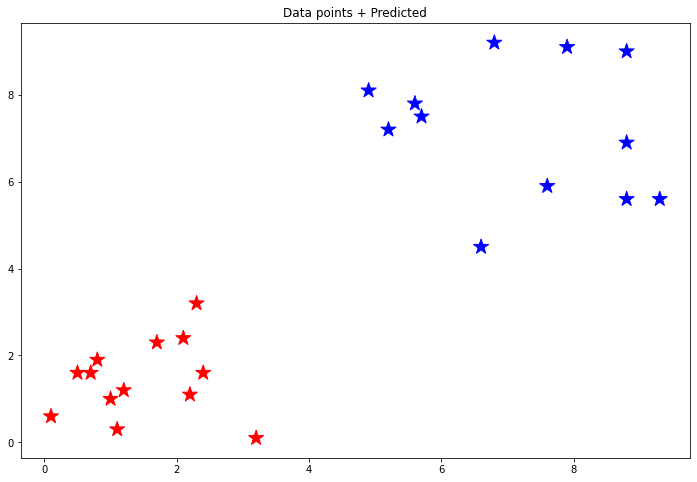

In [13]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()